In [ ]:
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import threading
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

 # **Imports and Basic Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd

df = pd.read_parquet('/content/drive/MyDrive/cmi/series_train.parquet/id=00f332d1/part-0.parquet')

print("Columns:", df.columns)
print("\nData Types:")
print(df.dtypes)
print("\nRow:", df.iloc[0])


Columns: Index(['step', 'X', 'Y', 'Z', 'enmo', 'anglez', 'non-wear_flag', 'light',
       'battery_voltage', 'time_of_day', 'weekday', 'quarter',
       'relative_date_PCIAT'],
      dtype='object')

Data Types:
step                    uint32
X                      float32
Y                      float32
Z                      float32
enmo                   float32
anglez                 float32
non-wear_flag          float32
light                  float32
battery_voltage        float32
time_of_day              int64
weekday                   int8
quarter                   int8
relative_date_PCIAT    float32
dtype: object

Row: step                   0.000000e+00
X                     -5.199710e-02
Y                      1.132523e-02
Z                     -9.914204e-01
enmo                   2.664346e-02
anglez                -8.615295e+01
non-wear_flag          0.000000e+00
light                  3.000000e+01
battery_voltage        4.185000e+03
time_of_day            5.724000e+13
weekd

In [ ]:
def process_file(filename, dirname):


    data = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))

    data.drop('step', axis=1, inplace=True)

    stats = data.describe().values.reshape(-1)

    file_id = filename.split('=')[1]

    return stats, file_id


Parallel processing

In [ ]:
def load_time_series(dirname) -> pd.DataFrame:
    ids = os.listdir(dirname)

    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_file(fname, dirname), ids), total=len(ids)))

    stats, id = zip(*results)
    data = pd.DataFrame(stats, columns=[f"Stat_{i}" for i in range(len(stats[0]))])
    data['id'] = id

    return data


In [ ]:
series_train_dir = "/content/drive/MyDrive/cmi/series_train.parquet"
series_test_dir = "/content/drive/MyDrive/cmi/series_test.parquet"

train_ts = load_time_series(series_train_dir)
test_ts = load_time_series(series_test_dir)

#print(train_ts.head())
#print(test_ts.head())


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


In [ ]:
import os

cpu_cores = os.cpu_count()
print(f"Number of CPU cores: {cpu_cores}")


Number of CPU cores: 2


In [ ]:
import multiprocessing

cpu_cores = multiprocessing.cpu_count()
print(f"Number of CPU cores: {cpu_cores}")


Number of CPU cores: 2


Load the main datasets and merging with ts file

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train = pd.read_csv('/content/drive/MyDrive/cmi/train.csv')
test = pd.read_csv('/content/drive/MyDrive/cmi/test.csv')

train = pd.merge(train, train_ts, how="left", on="id")
test = pd.merge(test, test_ts, how="left", on="id")

train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

li=train.columns

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")


Train shape: (3960, 177)
Test shape: (20, 154)


In [ ]:
train.shape


(3960, 177)

In [ ]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Columns: 177 entries, Basic_Demos-Enroll_Season to Stat_95
dtypes: float64(164), int64(2), object(11)
memory usage: 5.3+ MB


In [ ]:
train.isnull().sum()

Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                           1678
FGC-FGC_GSND                              2886
FGC-FGC_GSND_Zone                         2898
FGC-FGC_GSD                               2886
FGC-FGC_GSD_Zone                          2897
FGC-FGC_PU                                1650
FGC-FGC_PU_Zone                           1689
FGC-FGC_SRL                               1655
FGC-FGC_SRL_Zone                          1693
FGC-FGC_SRR                               1653
FGC-FGC_SRR_Zone                          1691
FGC-FGC_TL                                1636
FGC-FGC_TL_Zone                           1675
BIA-Season                                1815
BIA-BIA_Activity_Level_num                1969
BIA-BIA_BMC                               1969
BIA-BIA_BMI                               1969
BIA-BIA_BMR                               1969
BIA-BIA_DEE                               1969
BIA-BIA_ECW                               1969
BIA-BIA_FFM                               1969
BIA-BIA_FFMI                              1969
BIA-BIA_FMI                               1969
BIA-BIA_Fat                               1969
BIA-BIA_Frame_num                         1969
BIA-BIA_ICW                               1969
BIA-BIA_LDM                               1969
BIA-BIA_LST                               1969
BIA-BIA_SMM                               1969
BIA-BIA_TBW                               1969
PAQ_A-Season                              3485
PAQ_A-PAQ_A_Total                         3485
PAQ_C-Season                              2239
PAQ_C-PAQ_C_Total                         2239
PCIAT-Season                              1224
PCIAT-PCIAT_01                            1227
PCIAT-PCIAT_02                            1226
PCIAT-PCIAT_03                            1229
PCIAT-PCIAT_04                            1229
PCIAT-PCIAT_05                            1231
PCIAT-PCIAT_06                            1228
PCIAT-PCIAT_07                            1231
PCIAT-PCIAT_08                            1230
PCIAT-PCIAT_09                            1230
PCIAT-PCIAT_10                            1227
PCIAT-PCIAT_11                            1226
PCIAT-PCIAT_12                            1229
PCIAT-PCIAT_13                            1231
PCIAT-PCIAT_14                            1228
PCIAT-PCIAT_15                            1230
PCIAT-PCIAT_16                            1232
PCIAT-PCIAT_17                            1235
PCIAT-PCIAT_18                            1232
PCIAT-PCIAT_19                            1230
PCIAT-PCIAT_20                            1227
PCIAT-PCIAT_Total                         1224
SDS-Season                                1342
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Stat_0                                    2970
Stat_1                                    2970
Stat_2                                    2970
Stat_3                                    2970
Stat_

In [ ]:
# train.isnull().sum()/train.shape[0]*100
# columns=train.columns
# print(columns)


In [ ]:
pd.set_option('display.max_columns', None)
print(train.isnull().sum()/train.shape[0]*100)

Basic_Demos-Enroll_Season                  0.000000
Basic_Demos-Age                            0.000000
Basic_Demos-Sex                            0.000000
CGAS-Season                               35.479798
CGAS-CGAS_Score                           38.863636
Physical-Season                           16.414141
Physical-BMI                              23.686869
Physical-Height                           23.560606
Physical-Weight                           22.323232
Physical-Waist_Circumference              77.323232
Physical-Diastolic_BP                     25.404040
Physical-HeartRate                        25.075758
Physical-Systolic_BP                      25.404040
Fitness_Endurance-Season                  66.969697
Fitness_Endurance-Max_Stage               81.237374
Fitness_Endurance-Time_Mins               81.313131
Fitness_Endurance-Time_Sec                81.313131
FGC-Season                                15.505051
FGC-FGC_CU                                41.363636
FGC-FGC_CU_Z

In [ ]:
for i in train.select_dtypes(include=['object']).columns:
    print(train[i].value_counts())
    print(f"These are the dup values {train[i].duplicated().sum()}")
    print('*'*100)

Basic_Demos-Enroll_Season
Spring    1127
Winter     997
Summer     970
Fall       866
Name: count, dtype: int64
These are the dup values 3956
****************************************************************************************************
CGAS-Season
Spring    697
Summer    656
Fall      635
Winter    567
Name: count, dtype: int64
These are the dup values 3955
****************************************************************************************************
Physical-Season
Spring    929
Winter    804
Summer    791
Fall      786
Name: count, dtype: int64
These are the dup values 3955
****************************************************************************************************
Fitness_Endurance-Season
Spring    385
Winter    338
Fall      332
Summer    253
Name: count, dtype: int64
These are the dup values 3955
****************************************************************************************************
FGC-Season
Spring    993
Summer    844
Fall      763
Winter    74

In [ ]:
train.describe().T

count          mean           std  \
Basic_Demos-Age                         3960.0  1.043359e+01  3.574648e+00   
Basic_Demos-Sex                         3960.0  3.727273e-01  4.835915e-01   
CGAS-CGAS_Score                         2421.0  6.545477e+01  2.234186e+01   
Physical-BMI                            3022.0  1.933193e+01  5.113934e+00   
Physical-Height                         3027.0  5.594671e+01  7.473764e+00   
Physical-Weight                         3076.0  8.903862e+01  4.456904e+01   
Physical-Waist_Circumference             898.0  2.727851e+01  5.567287e+00   
Physical-Diastolic_BP                   2954.0  6.964895e+01  1.361123e+01   
Physical-HeartRate                      2967.0  8.159724e+01  1.366520e+01   
Physical-Systolic_BP                    2954.0  1.169831e+02  1.706122e+01   
Fitness_Endurance-Max_Stage              743.0  4.989233e+00  2.014072e+00   
Fitness_Endurance-Time_Mins              740.0  7.370270e+00  3.189662e+00   
Fitness_Endurance-Time_Sec               740.0  2.758108e+01  1.770775e+01   
FGC-FGC_CU                              2322.0  1.125969e+01  1.180778e+01   
FGC-FGC_CU_Zone                         2282.0  4.763365e-01  4.995492e-01   
FGC-FGC_GSND                            1074.0  2.242044e+01  1.083400e+01   
FGC-FGC_GSND_Zone                       1062.0  1.829567e+00  6.125853e-01   
FGC-FGC_GSD                             1074.0  2.351862e+01  1.114895e+01   
FGC-FGC_GSD_Zone                        1063.0  1.904045e+00  6.123437e-01   
FGC-FGC_PU                              2310.0  5.579654e+00  7.390161e+00   
FGC-FGC_PU_Zone                         2271.0  3.302510e-01  4.704070e-01   
FGC-FGC_SRL                             2305.0  8.694924e+00  3.429301e+00   
FGC-FGC_SRL_Zone                        2267.0  6.188796e-01  4.857692e-01   
FGC-FGC_SRR                             2307.0  8.805635e+00  3.422167e+00   
FGC-FGC_SRR_Zone                        2269.0  6.200970e-01  4.854695e-01   
FGC-FGC_TL                              2324.0  9.252775e+00  2.988863e+00   
FGC-FGC_TL_Zone                         2285.0  7.855580e-01  4.105245e-01   
BIA-BIA_Activity_Level_num              1991.0  2.651431e+00  1.028267e+00   
BIA-BIA_BMC                             1991.0  6.719826e+00  9.258633e+01   
BIA-BIA_BMI                             1991.0  1.936705e+01  5.047848e+00   
BIA-BIA_BMR                             1991.0  1.237018e+03  1.872383e+03   
BIA-BIA_DEE                             1991.0  2.064694e+03  2.836246e+03   
BIA-BIA_ECW                             1991.0  2.082535e+01  7.326629e+01   
BIA-BIA_FFM                             1991.0  7.402171e+01  1.994338e+02   
BIA-BIA_FFMI                            1991.0  1.503055e+01  5.792505e+00   
BIA-BIA_FMI                             1991.0  4.336495e+00  6.356402e+00   
BIA-BIA_Fat                             1991.0  1.685502e+01  1.993721e+02   
BIA-BIA_Frame_num                       1991.0  1.745354e+00  6.806347e-01   
BIA-BIA_ICW                             1991.0  3.317338e+01  5.627235e+01   
BIA-BIA_LDM                             1991.0  2.002299e+01  7.021561e+01   
BIA-BIA_LST                             1991.0  6.730188e+01  1.087059e+02   
BIA-BIA_SMM                             1991.0  3.438947e+01  8.405061e+01   
BIA-BIA_TBW                             1991.0  5.399873e+01  1.293625e+02   
PAQ_A-PAQ_A_Total                        475.0  2.178853e+00  8.494759e-01   
PAQ_C-PAQ_C_Total                       1721.0  2.589550e+00  7.839367e-01   
PCIAT-PCIAT_01                          2733.0  2.370655e+00  1.673312e+00   
PCIAT-PCIAT_02                          2734.0  2.177762e+00  1.697117e+00   
PCIAT-PCIAT_03                          2731.0  2.399854e+00  1.588807e+00   
PCIAT-PCIAT_04                          2731.0  8.392530e-01  1.195601e+00   
PCIAT-PCIAT_05                          2729.0  2.297545e+00  1.705218e+00   
PCIAT-PCIAT_06                          2732.0  1.063690e+00  1

In [ ]:
train.describe(include='object').T

count unique     top  freq
Basic_Demos-Enroll_Season  3960      4  Spring  1127
CGAS-Season                2555      4  Spring   697
Physical-Season            3310      4  Spring   929
Fitness_Endurance-Season   1308      4  Spring   385
FGC-Season                 3346      4  Spring   993
BIA-Season                 2145      4  Summer   669
PAQ_A-Season                475      4  Winter   137
PAQ_C-Season               1721      4  Spring   506
PCIAT-Season               2736      4  Spring   762
SDS-Season                 2618      4  Spring   712
PreInt_EduHx-Season        3540      4  Spring   985

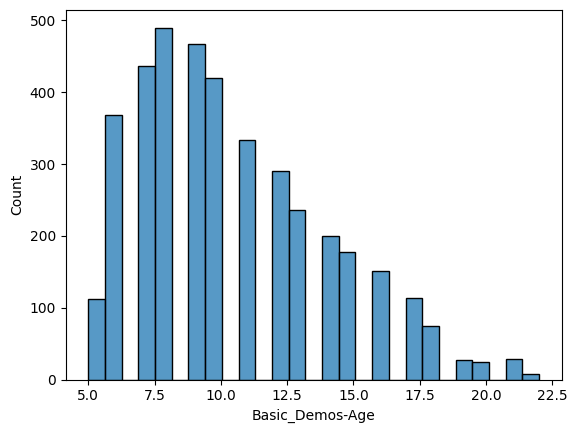

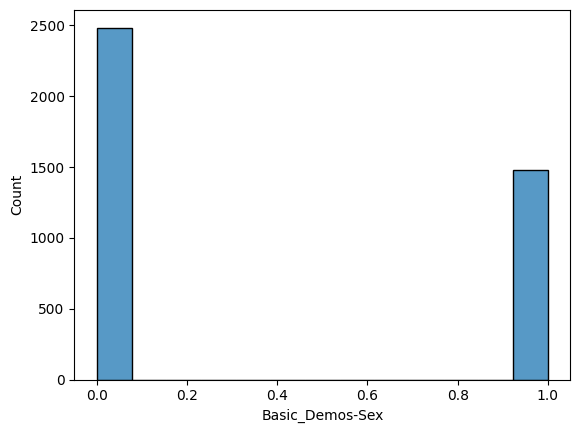

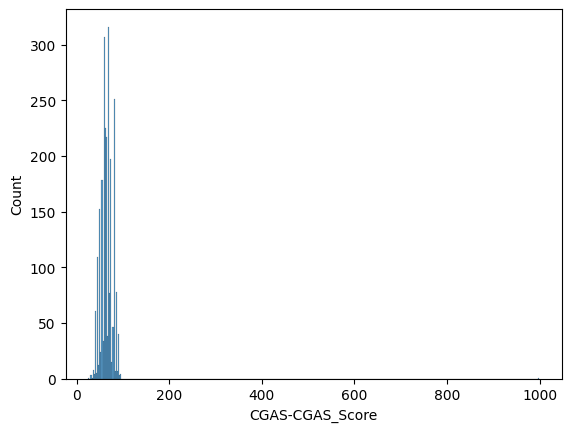

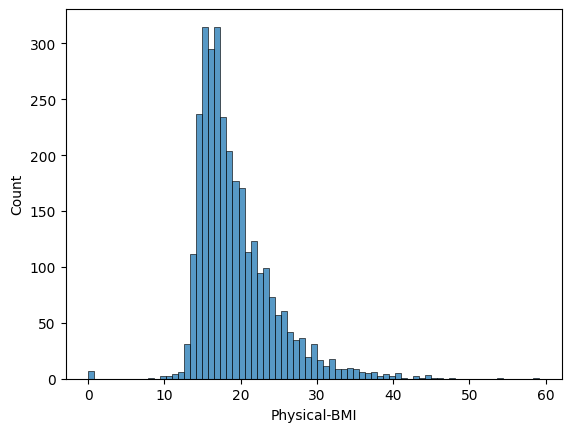

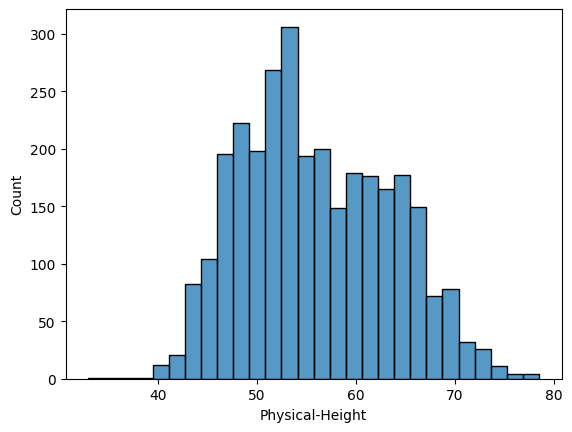

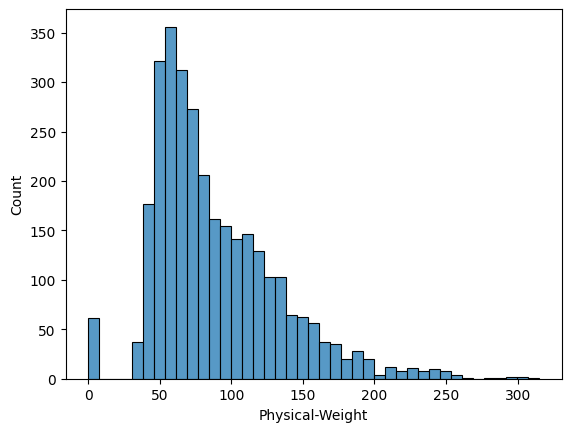

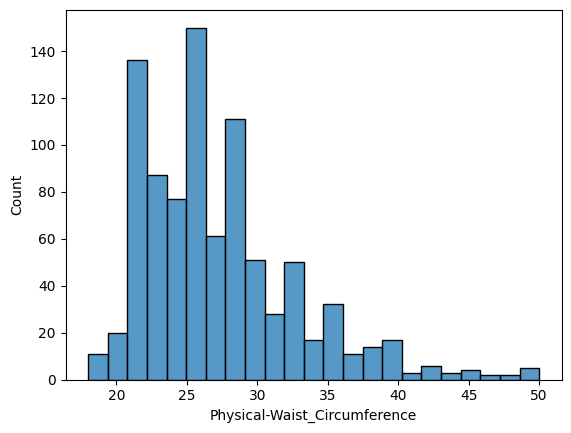

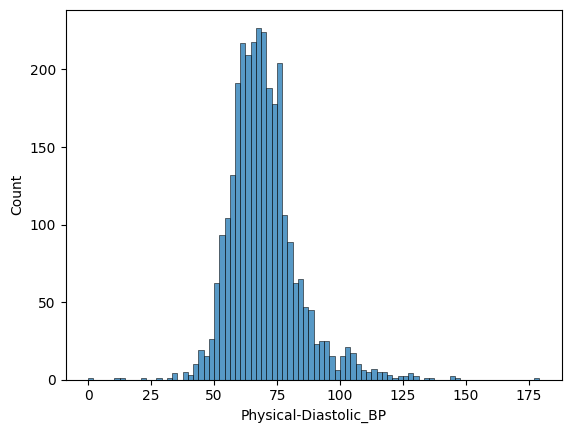

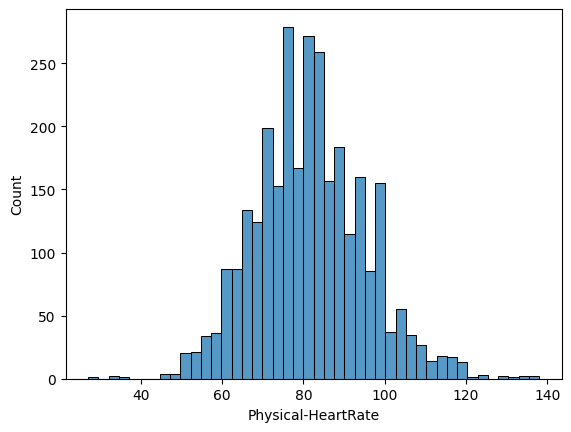

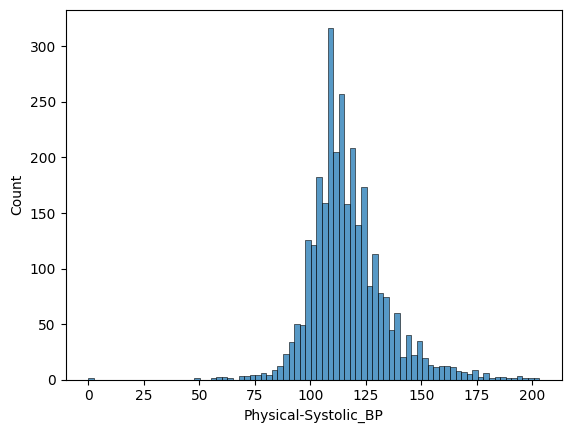

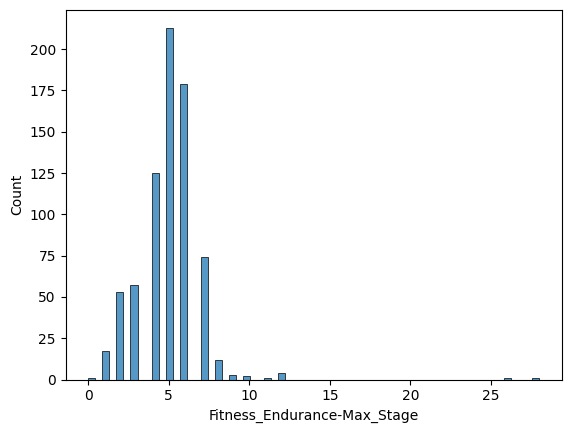

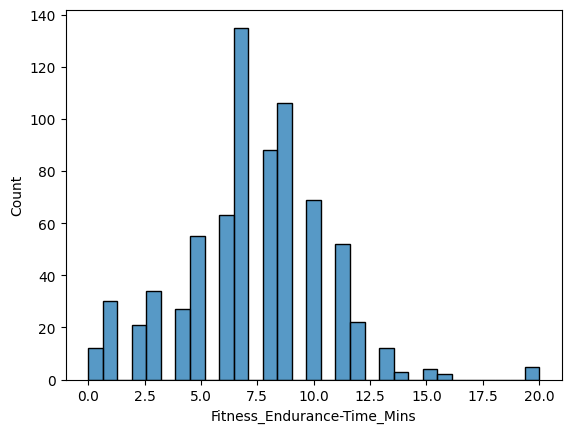

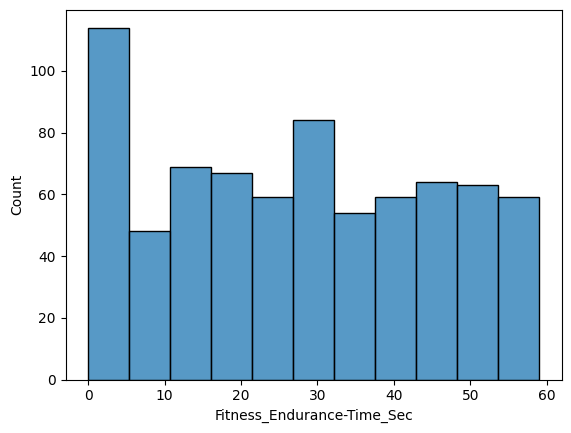

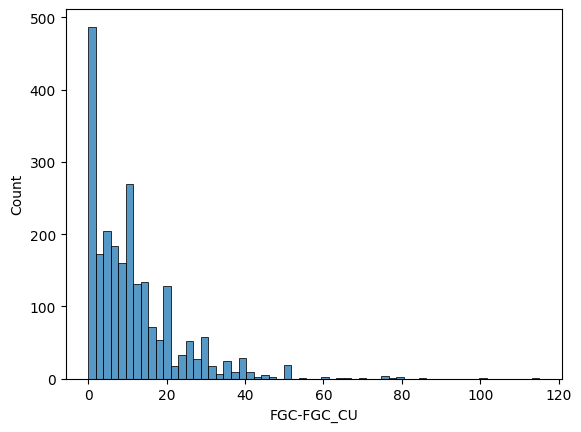

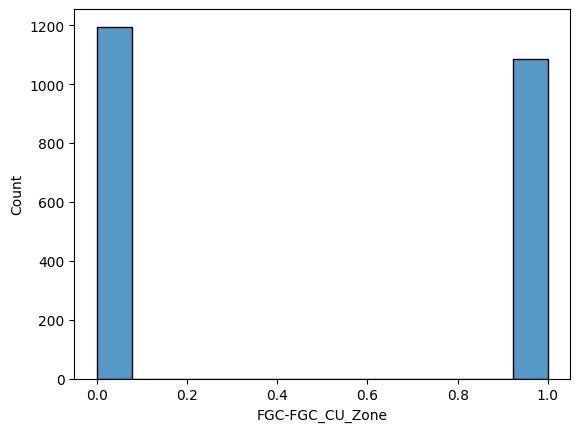

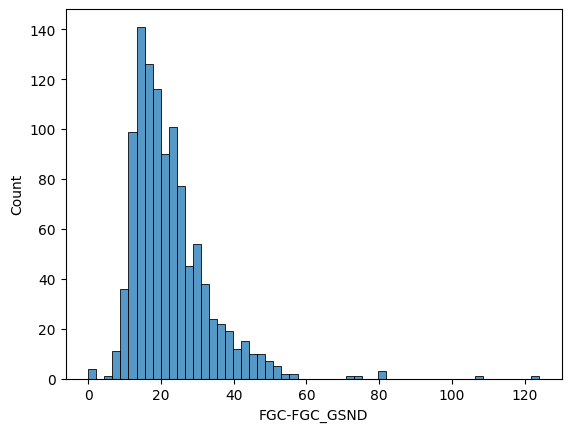

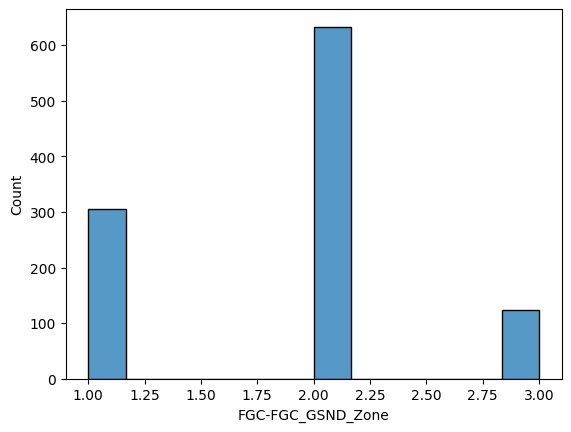

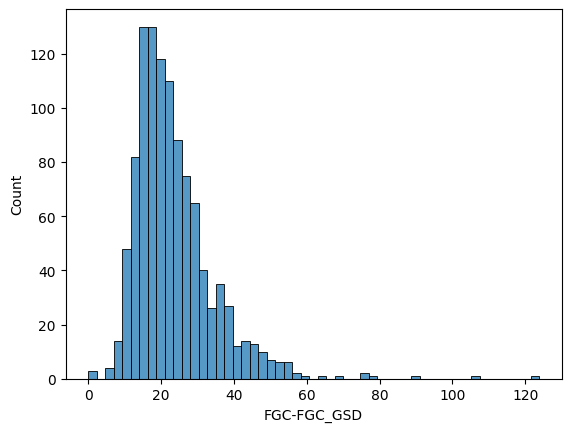

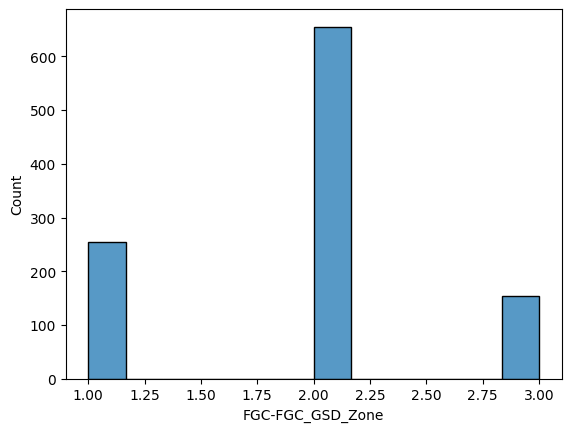

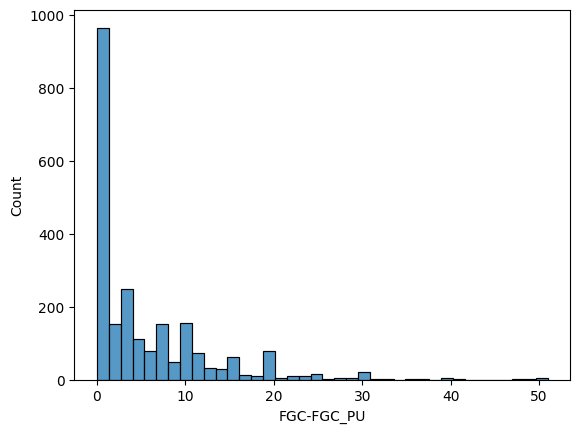

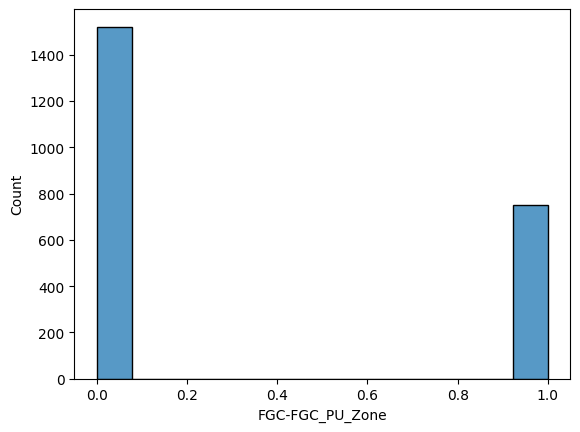

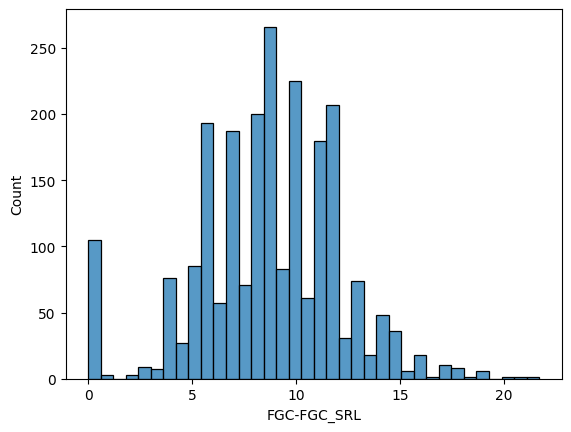

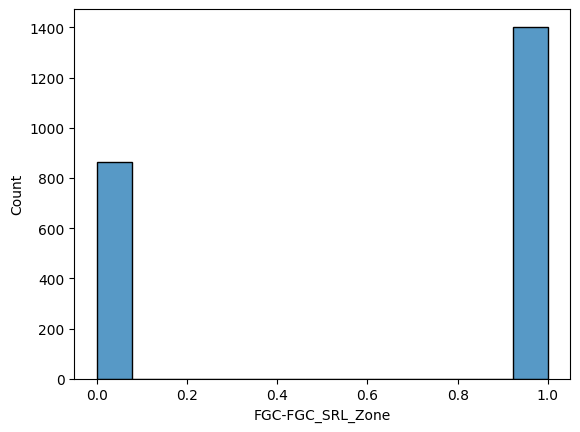

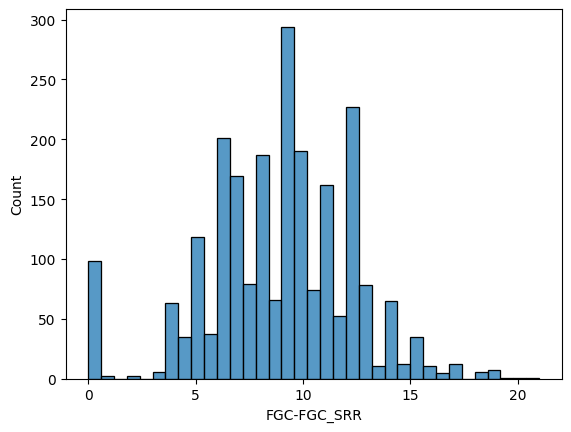

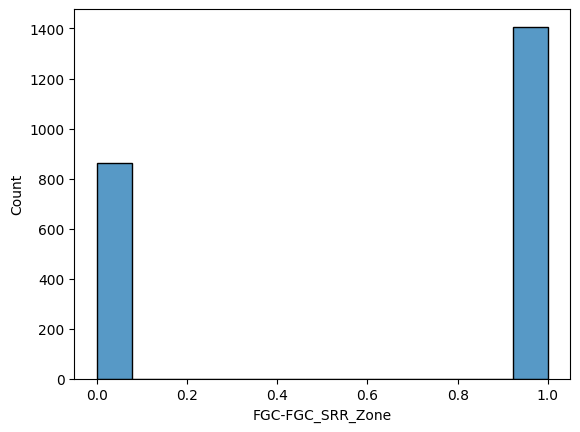

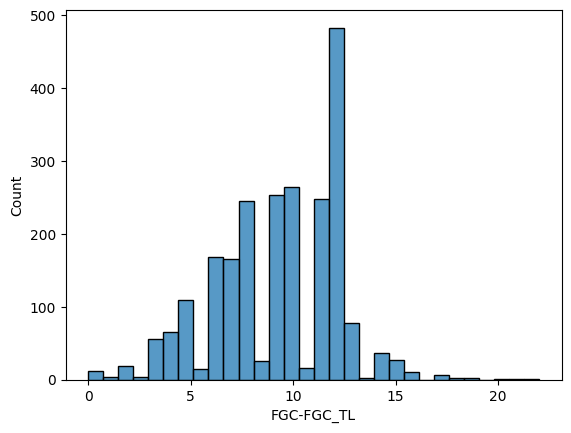

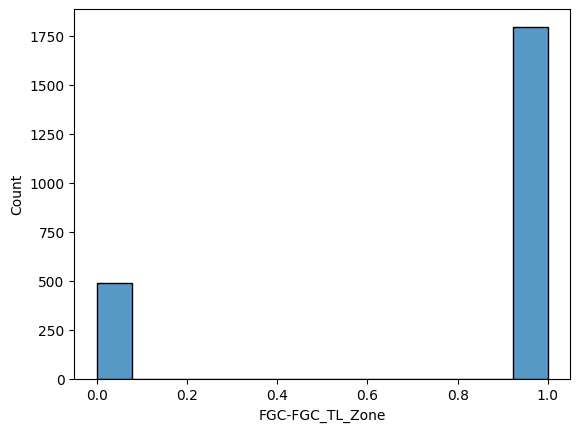

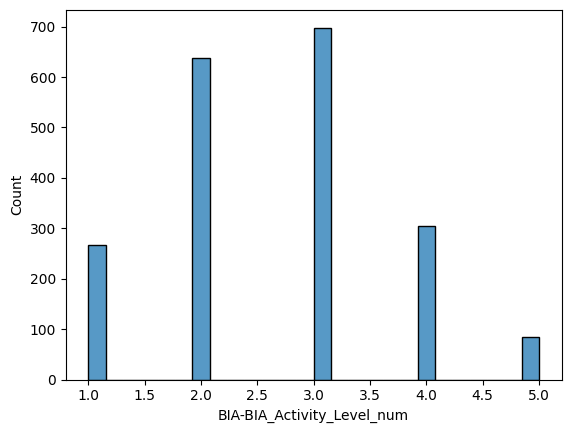

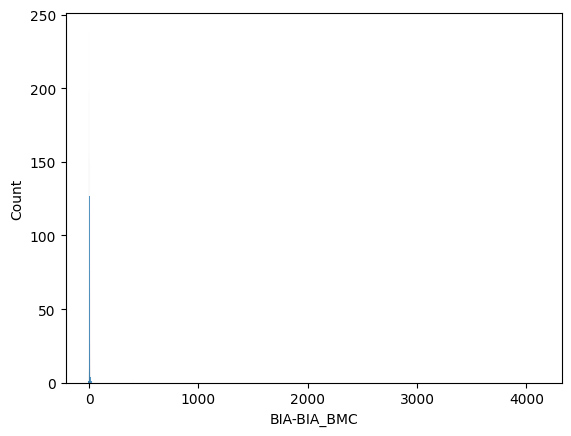

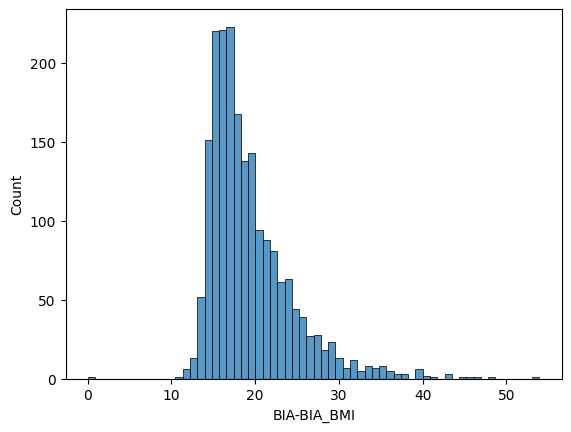

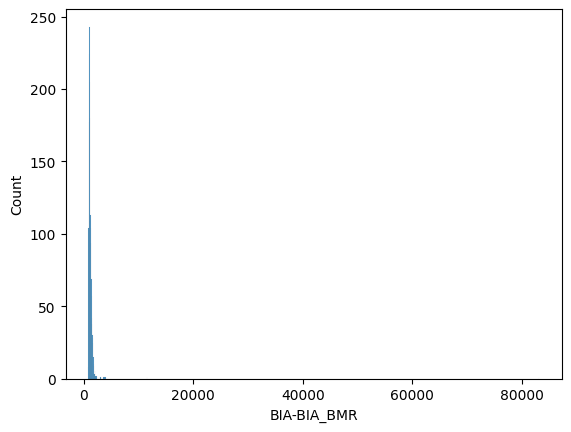

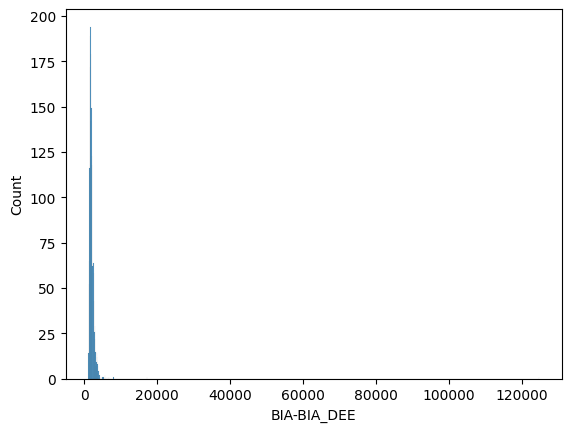

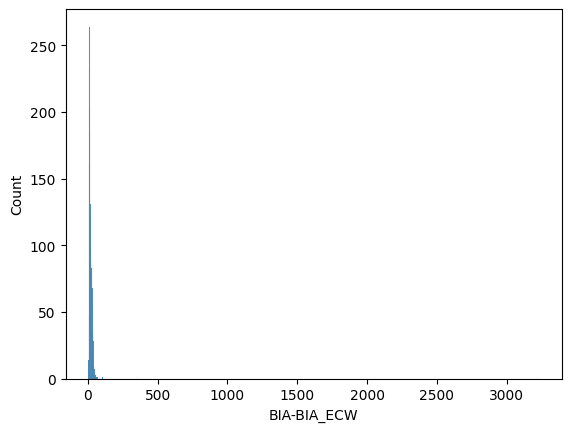

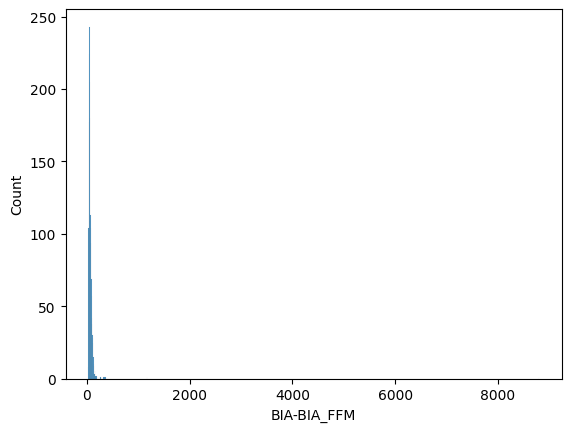

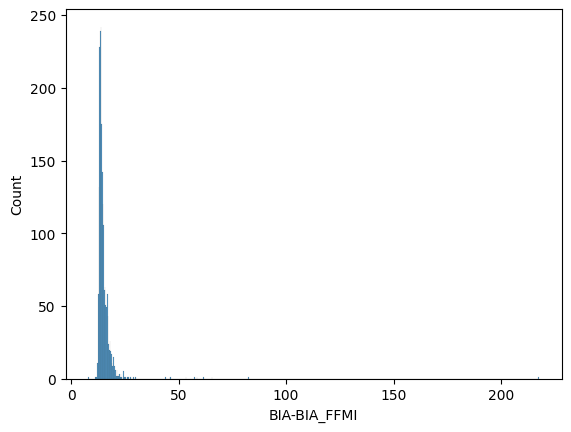

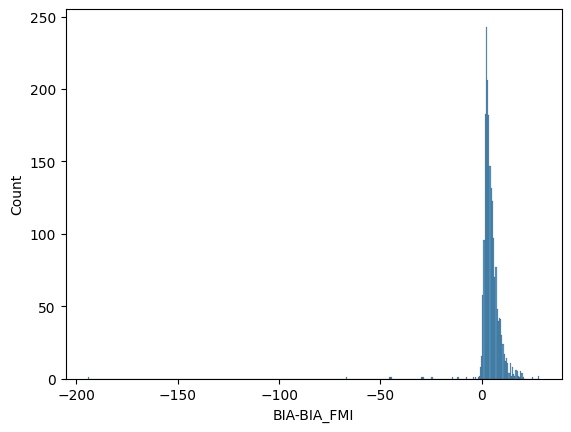

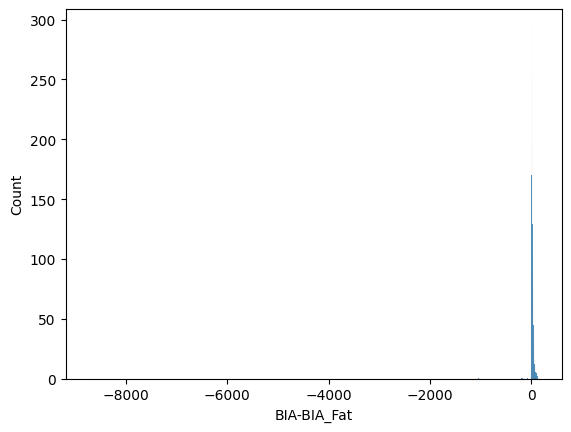

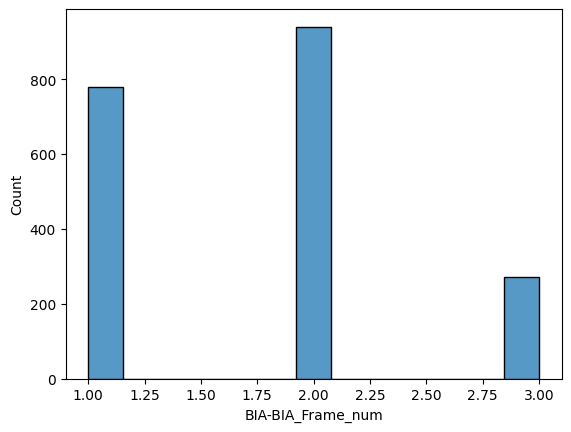

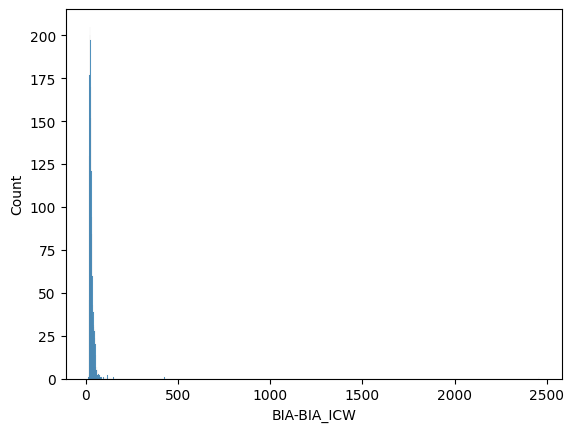

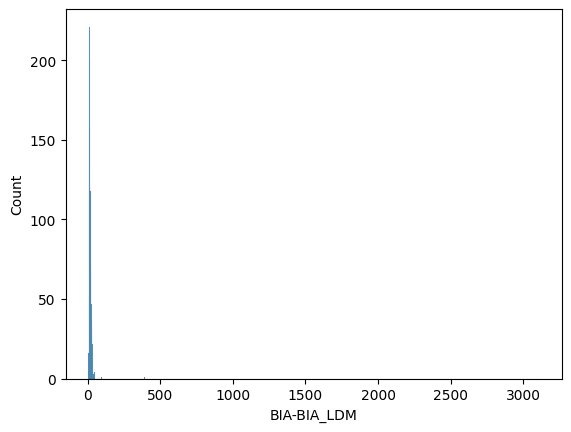

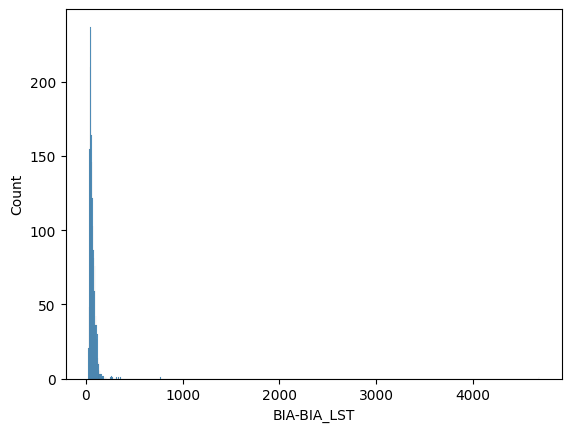

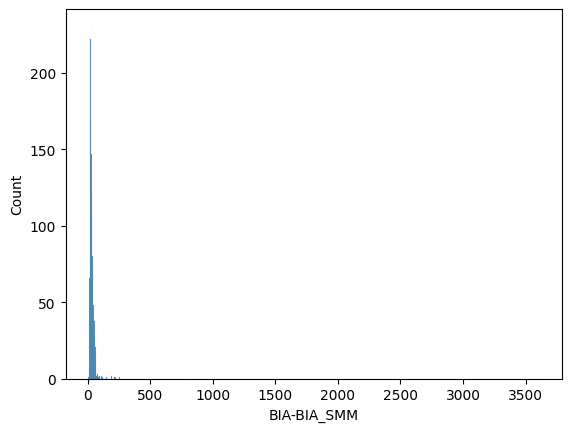

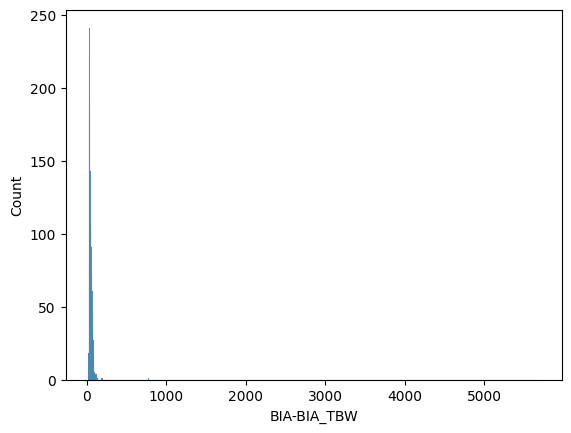

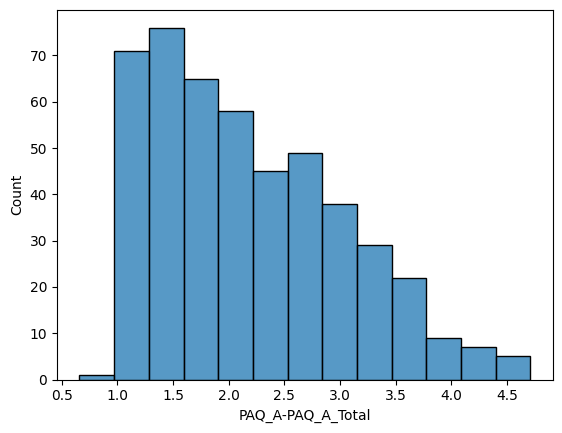

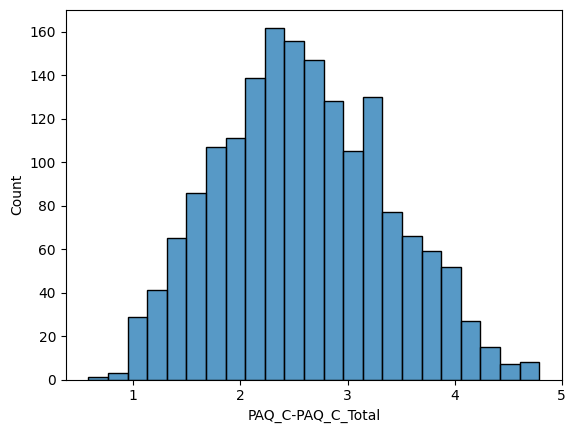

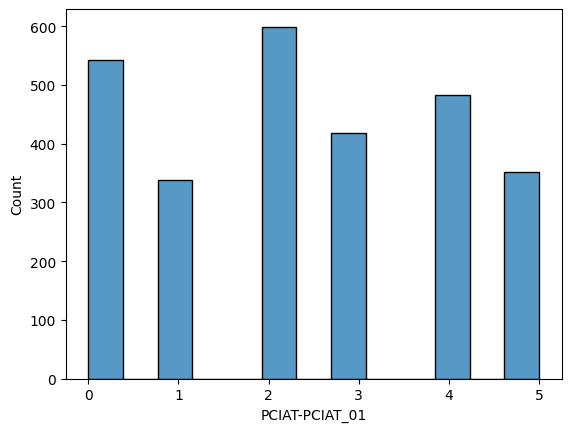

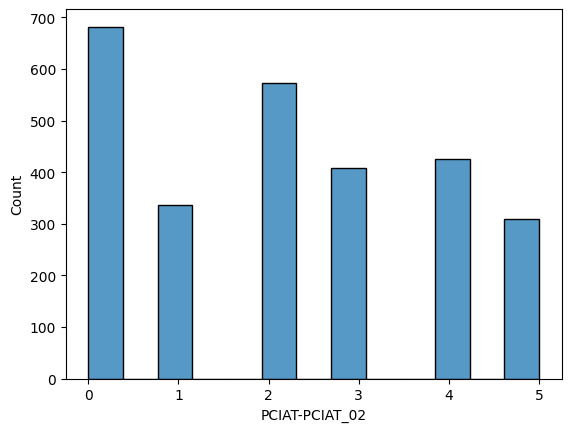

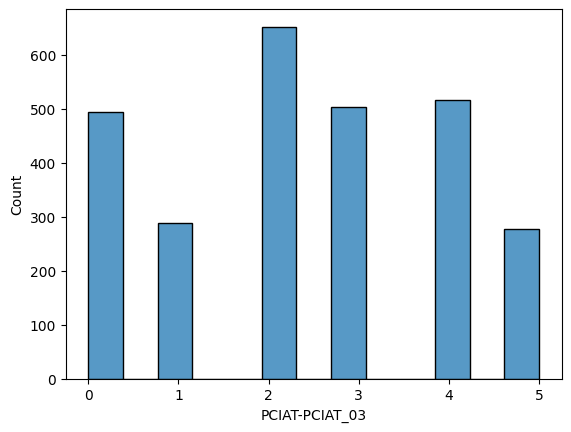

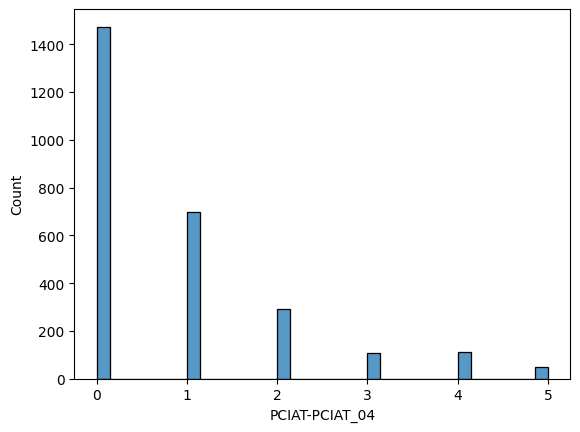

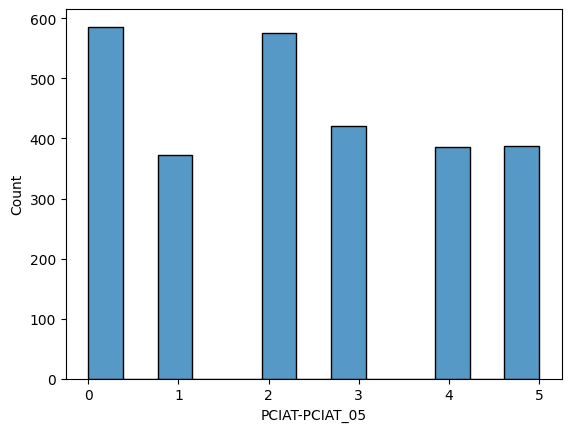

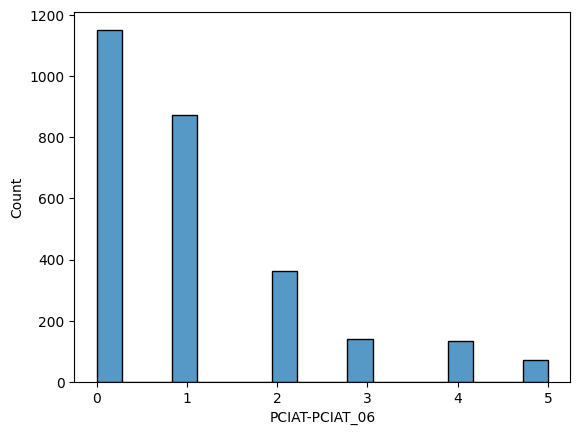

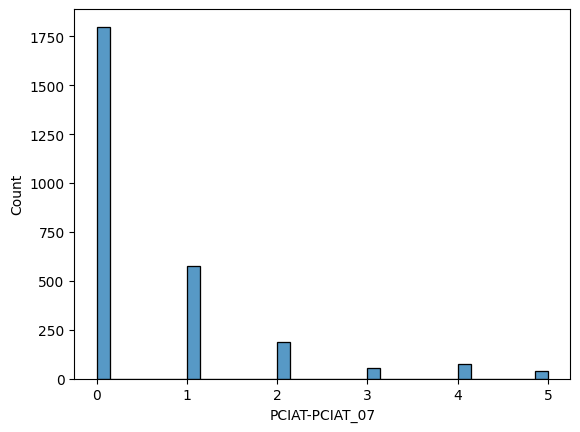

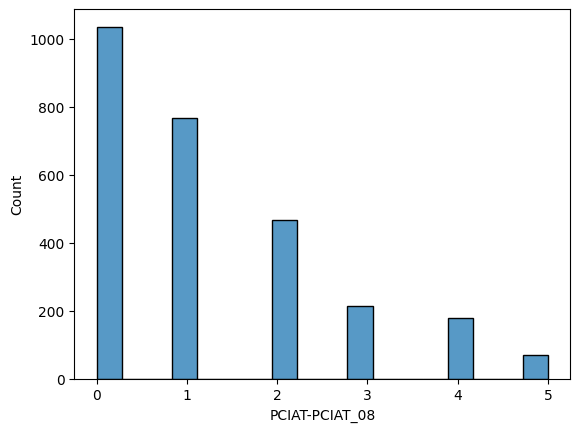

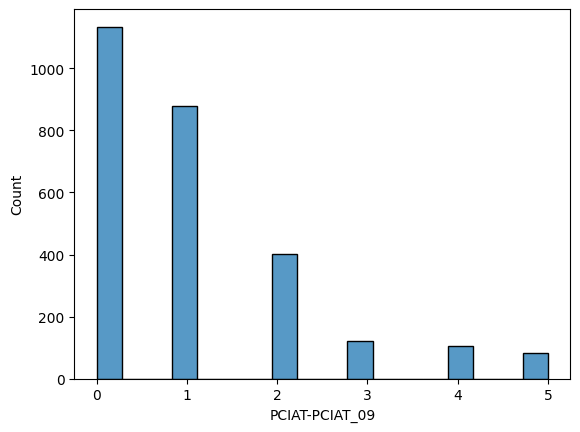

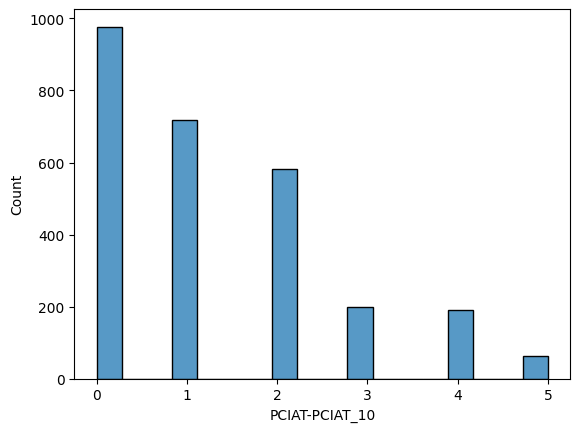

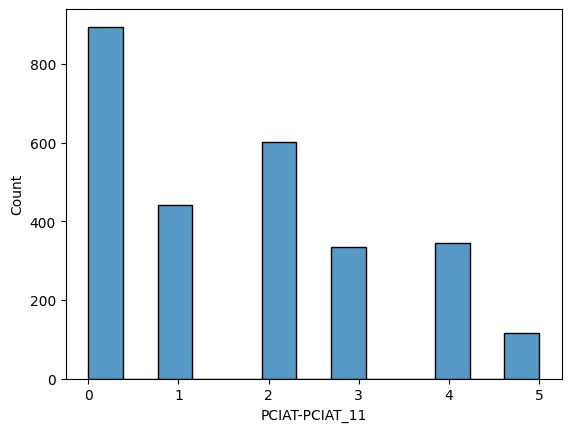

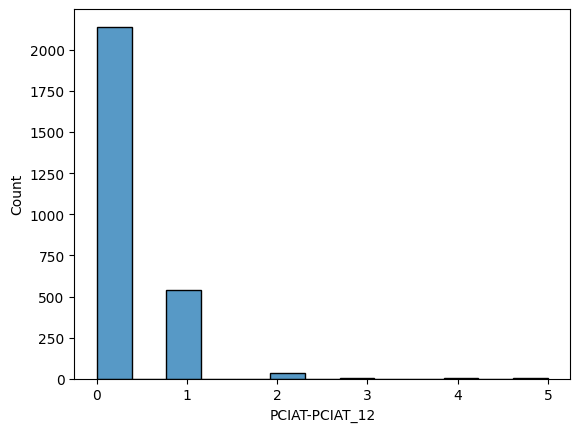

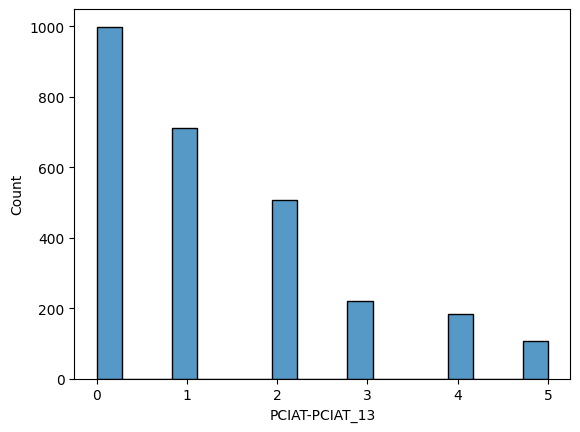

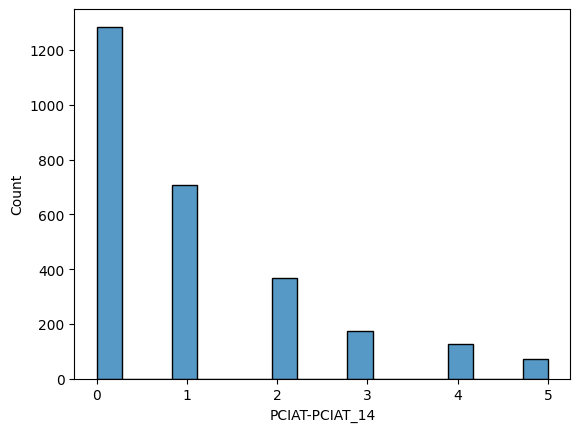

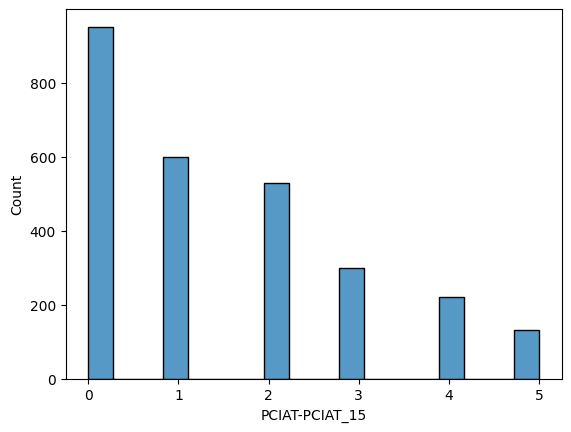

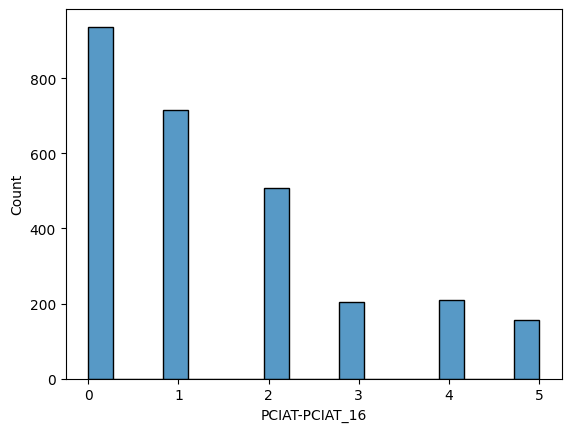

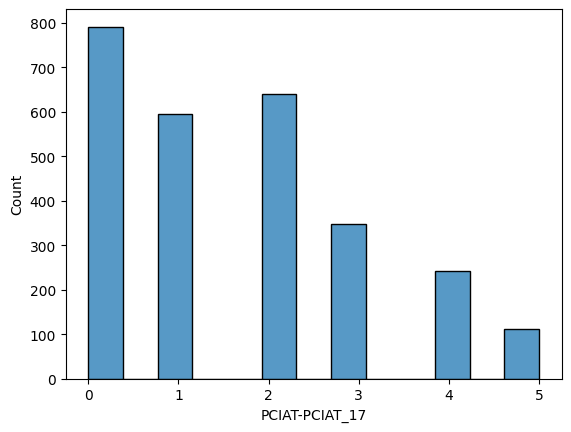

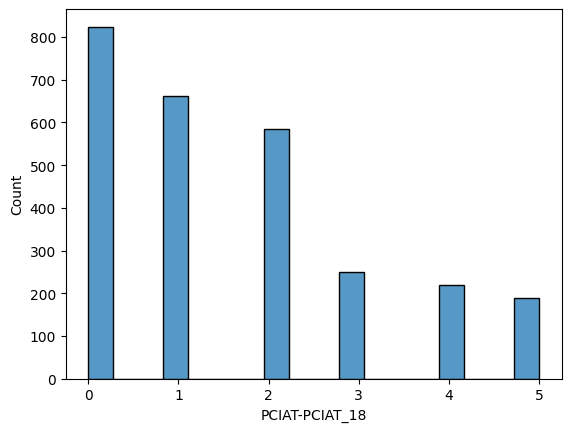

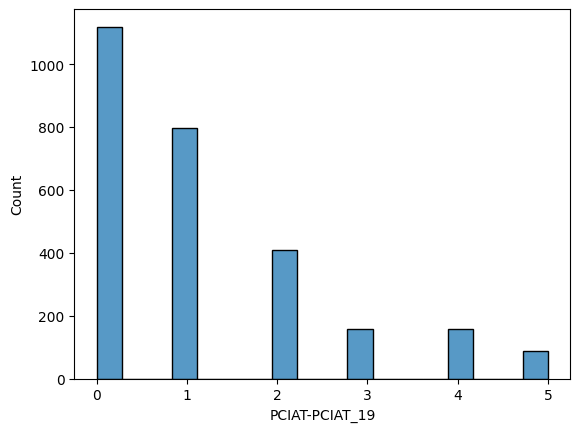

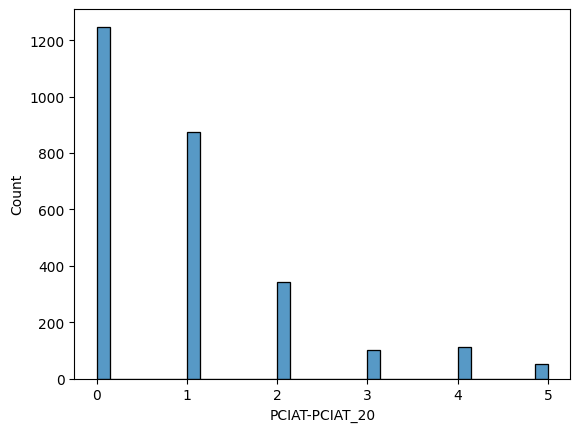

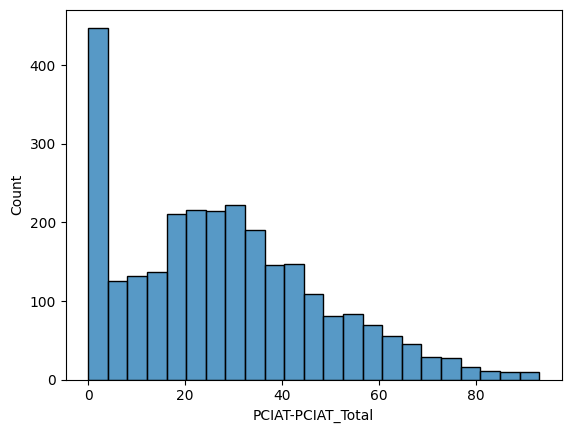

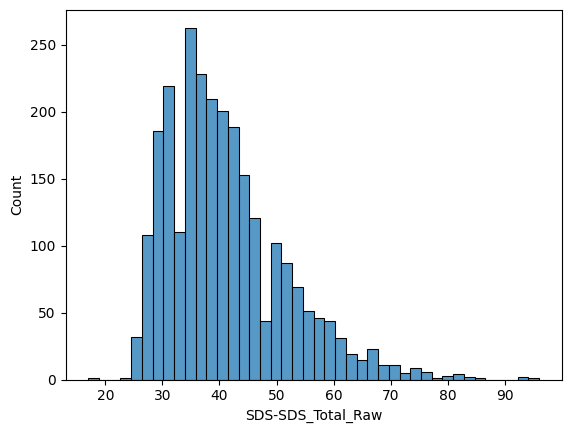

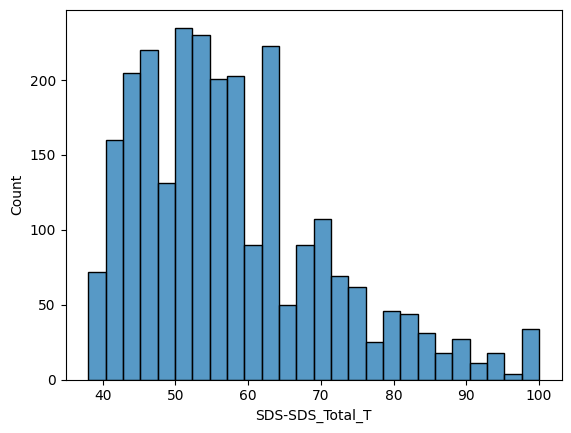

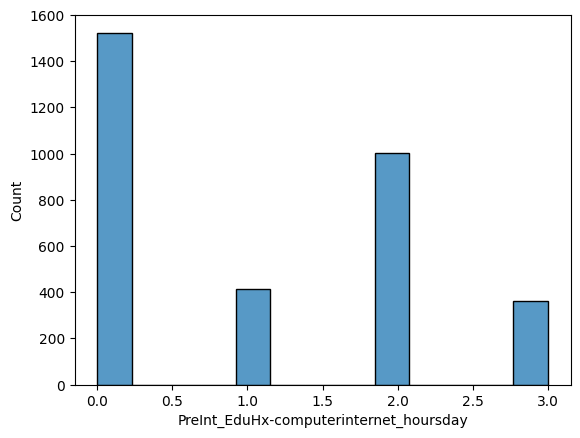

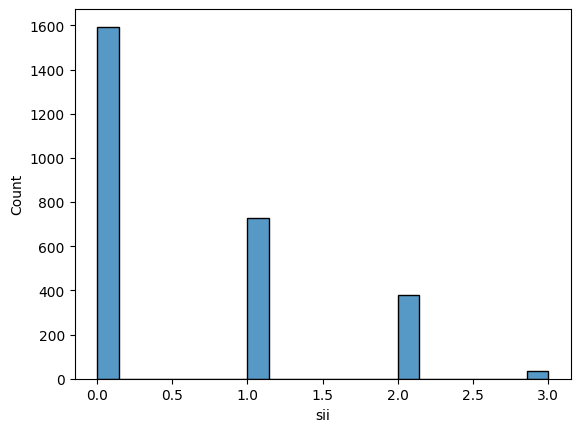

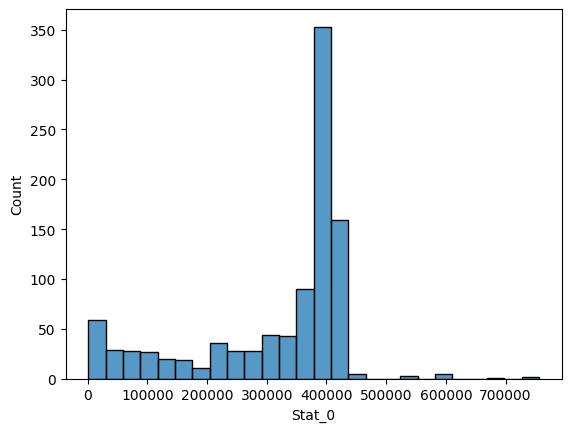

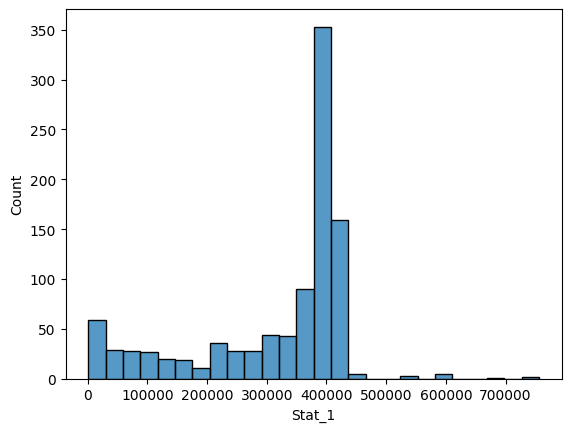

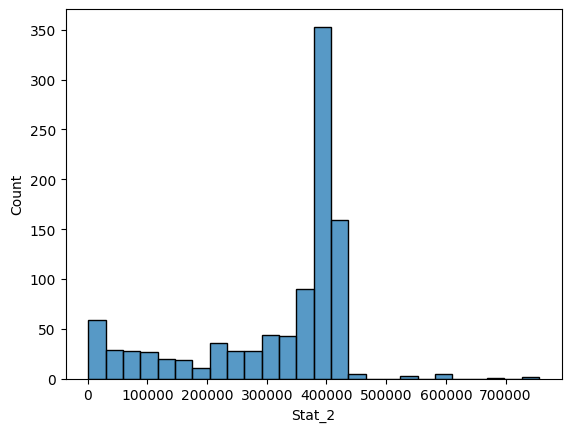

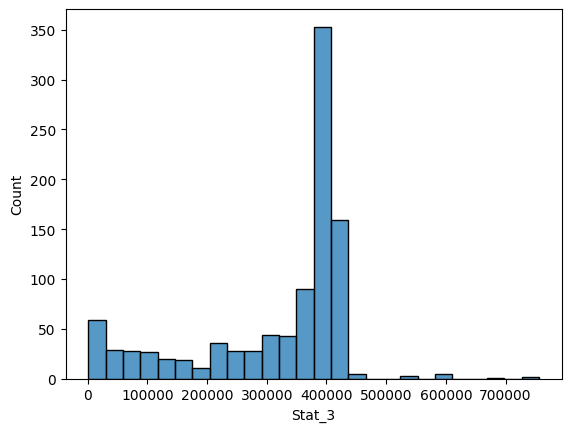

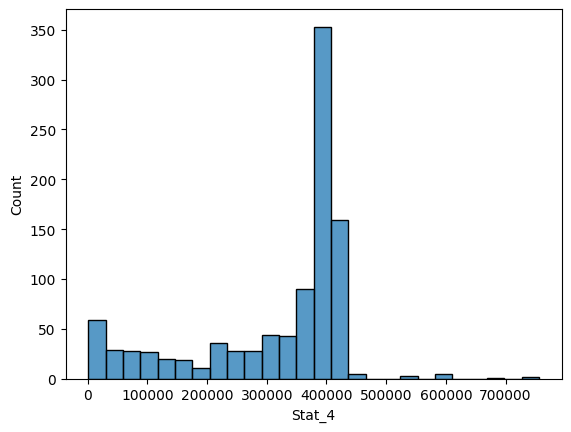

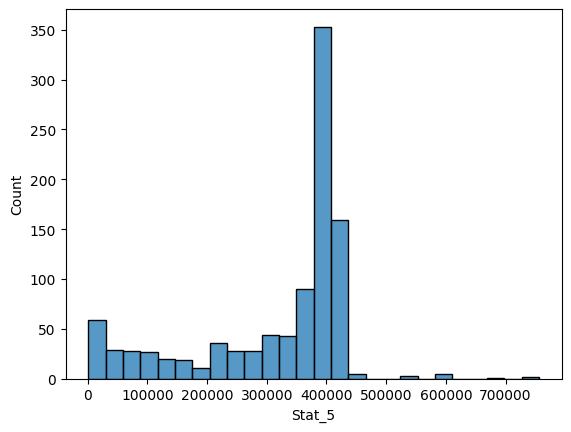

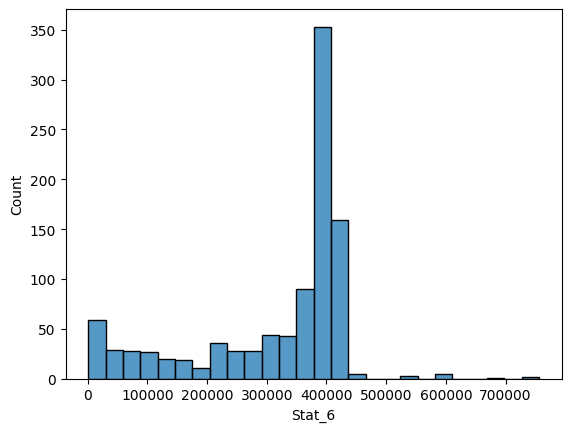

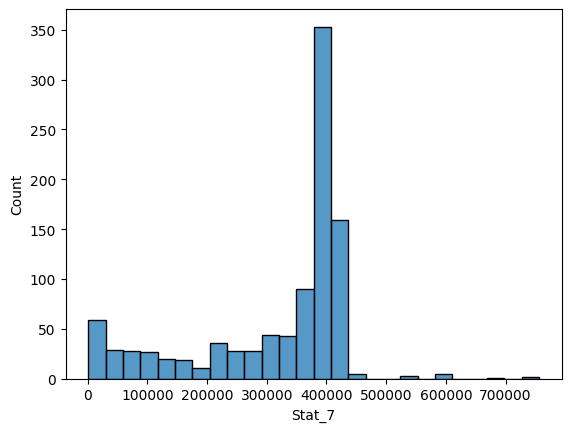

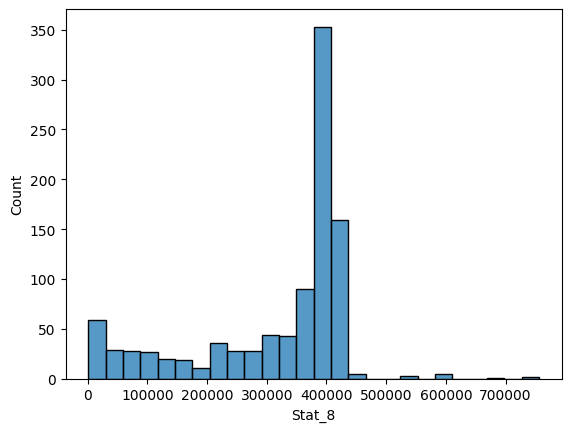

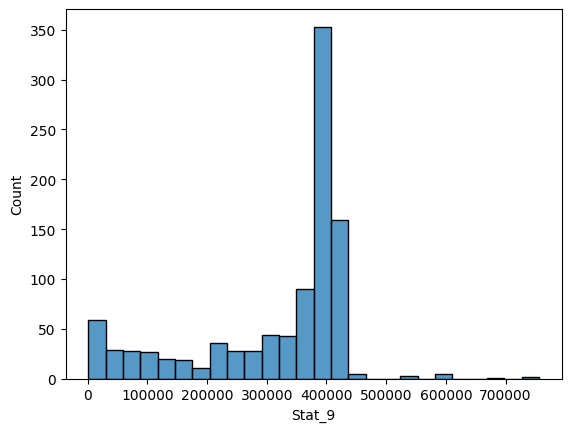

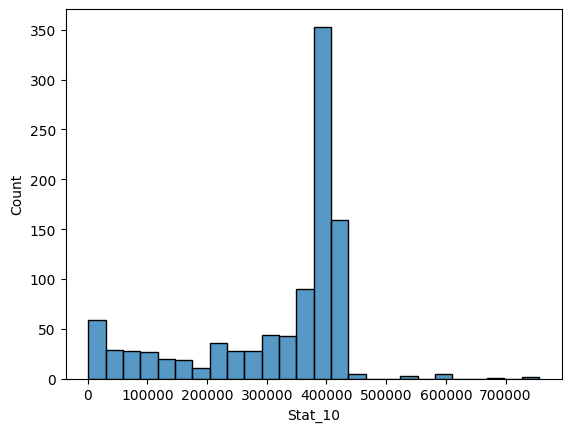

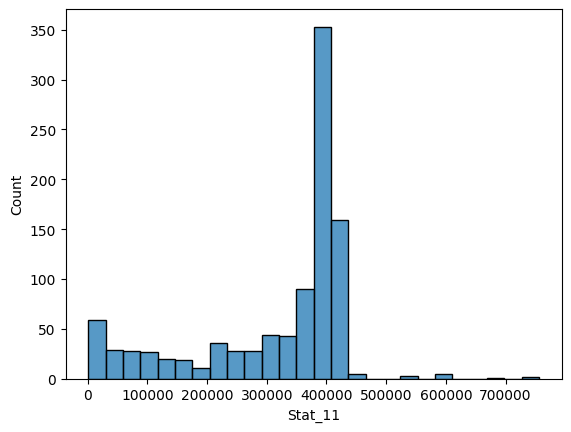

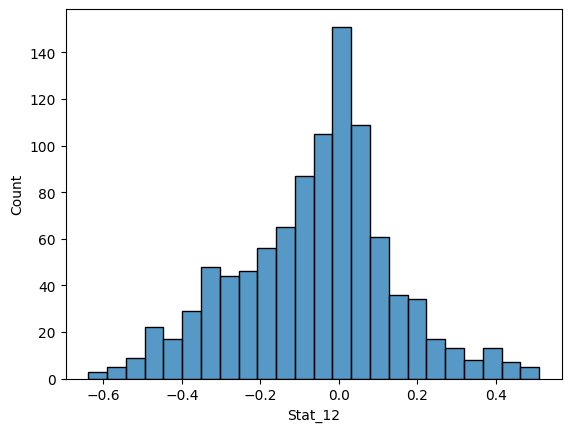

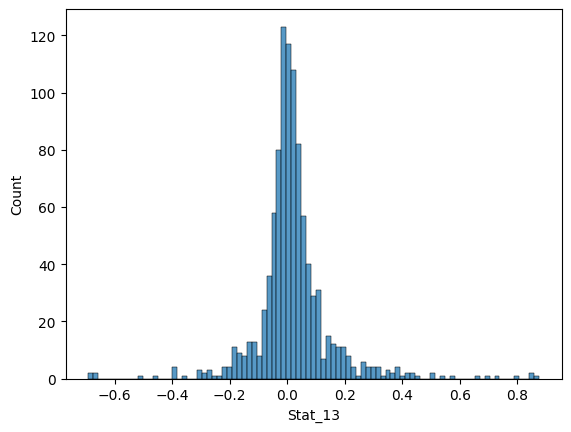

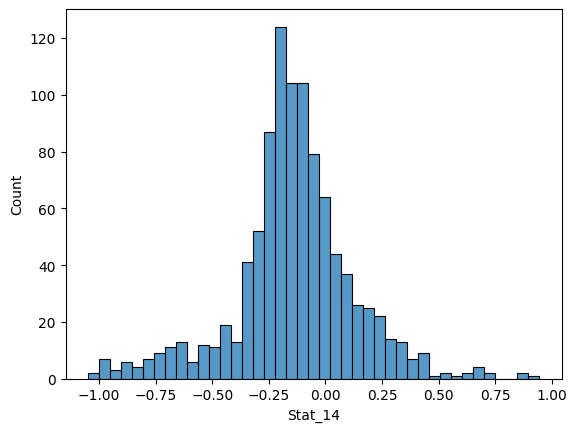

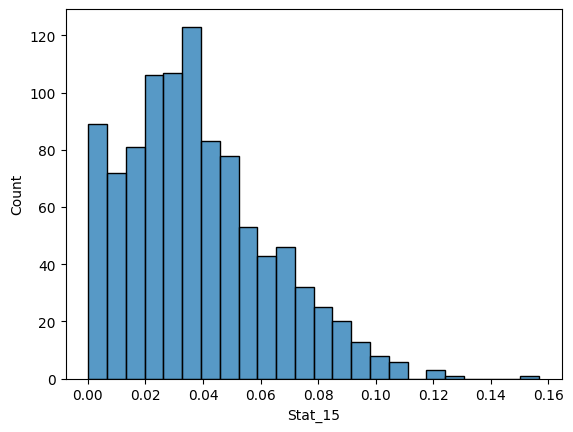

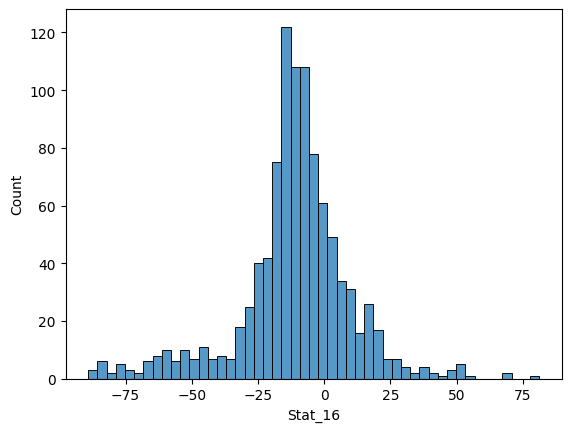

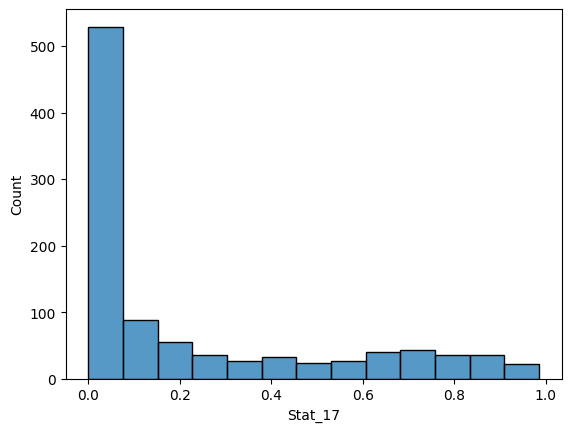

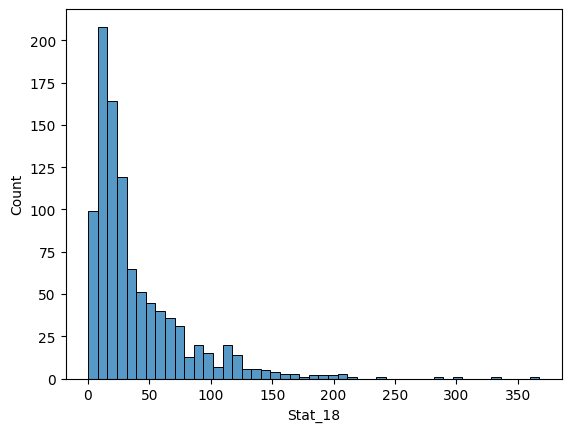

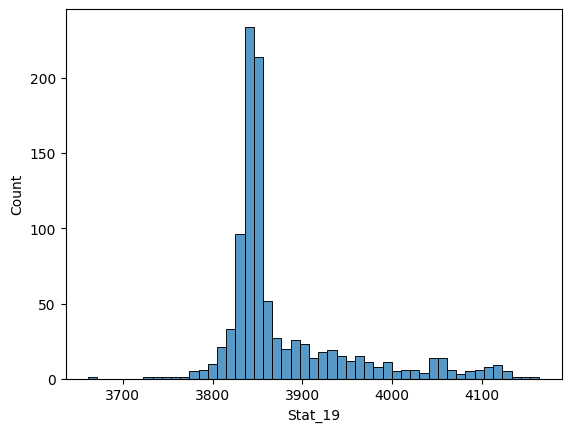

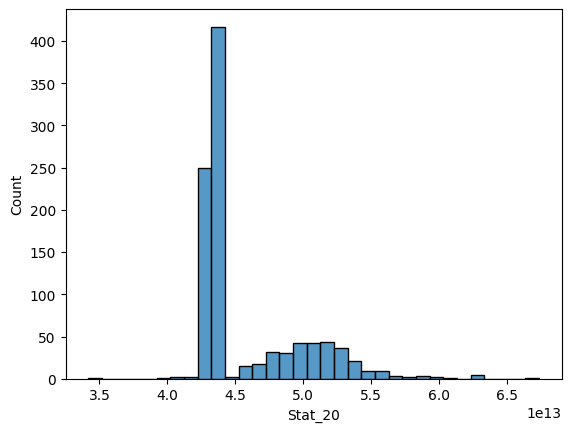

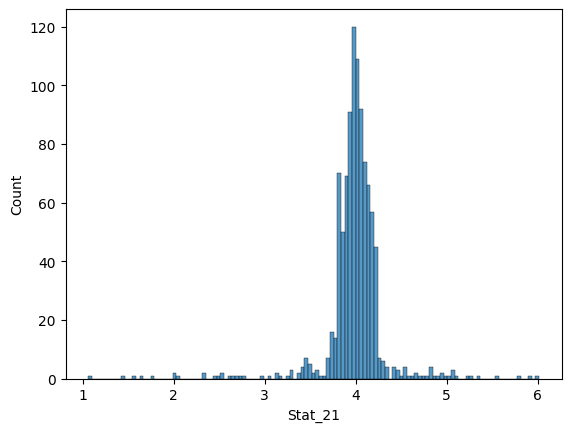

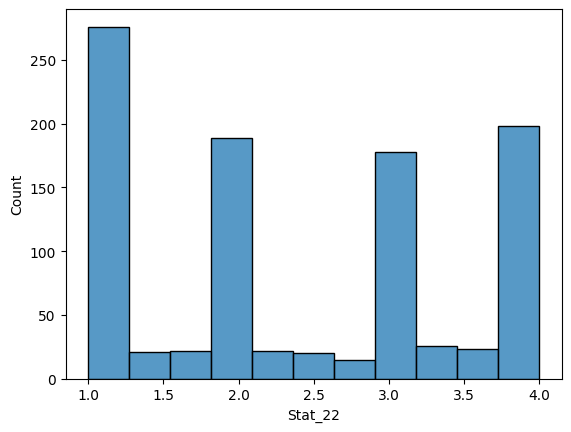

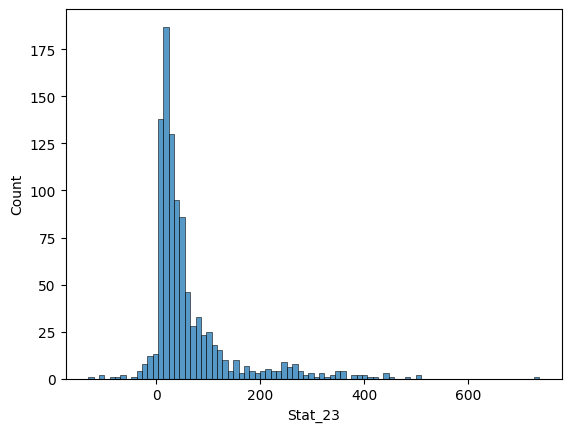

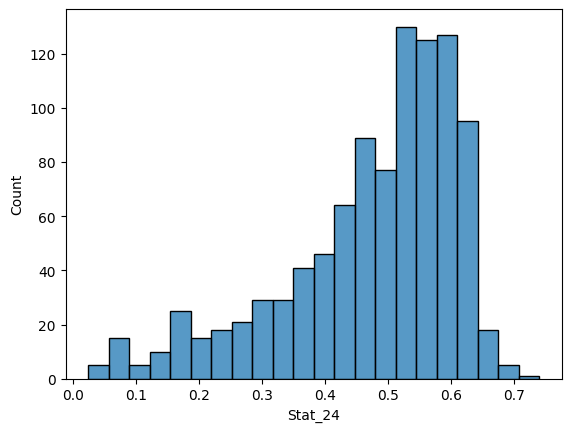

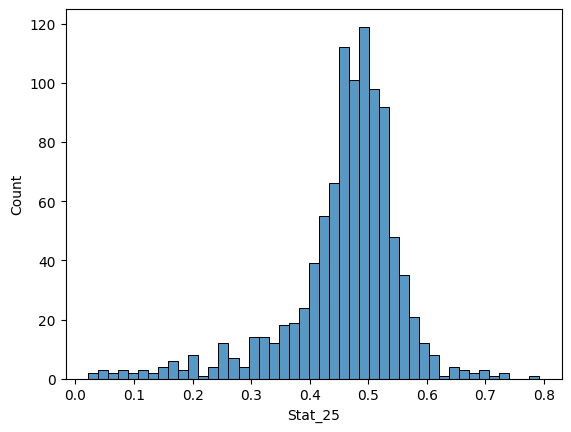

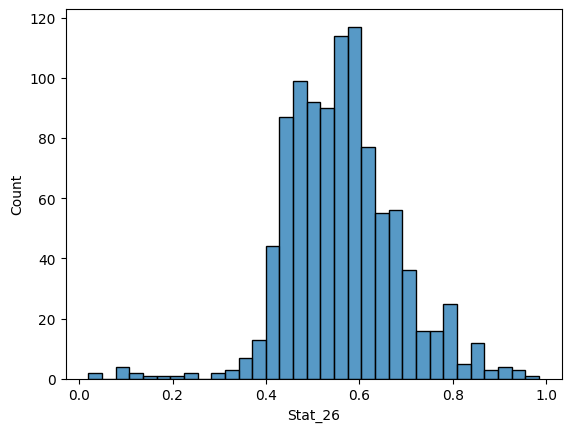

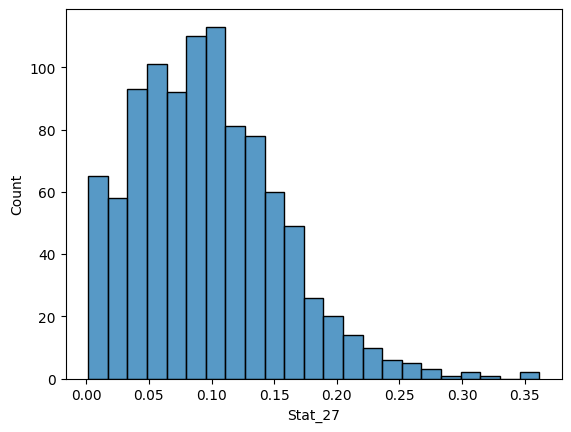

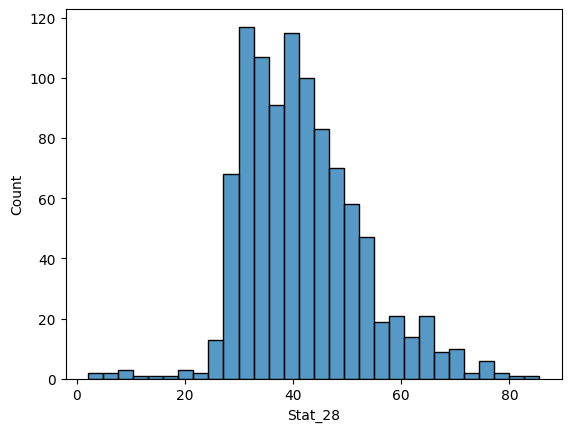

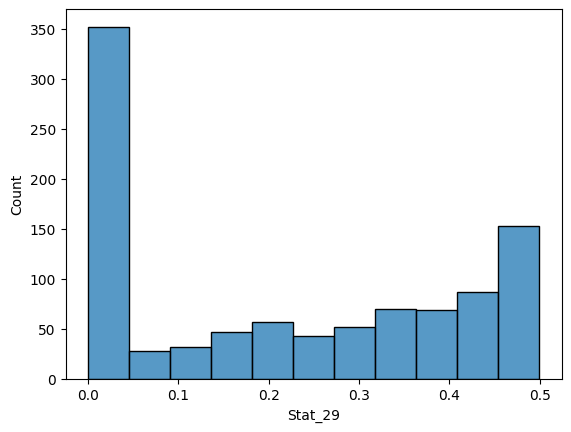

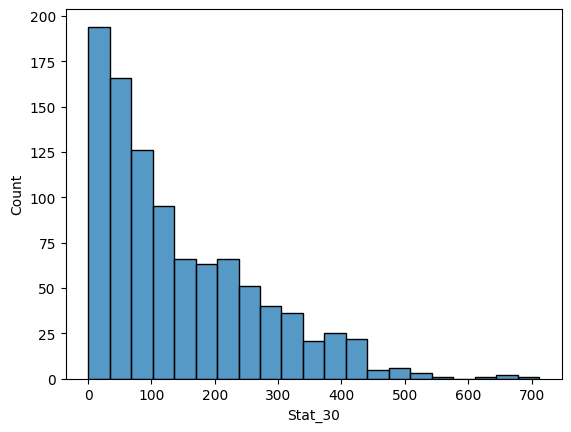

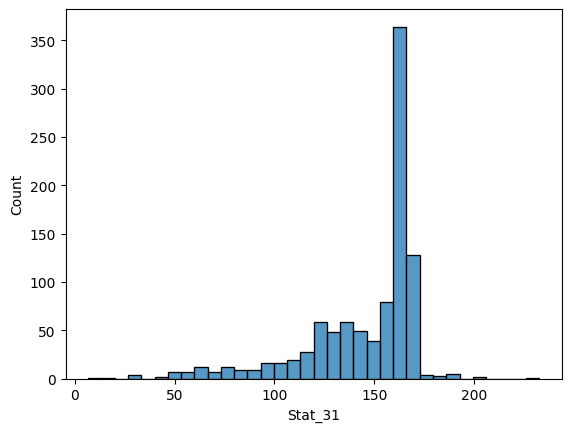

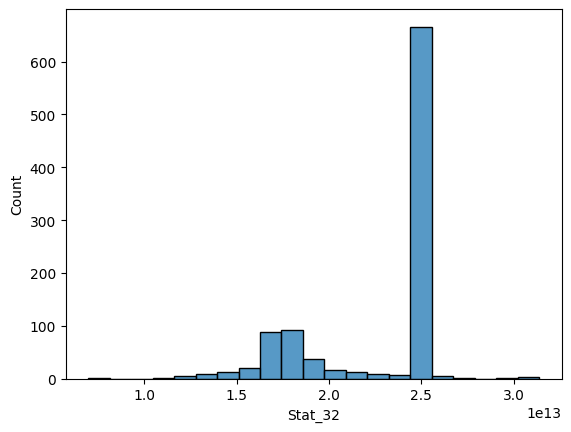

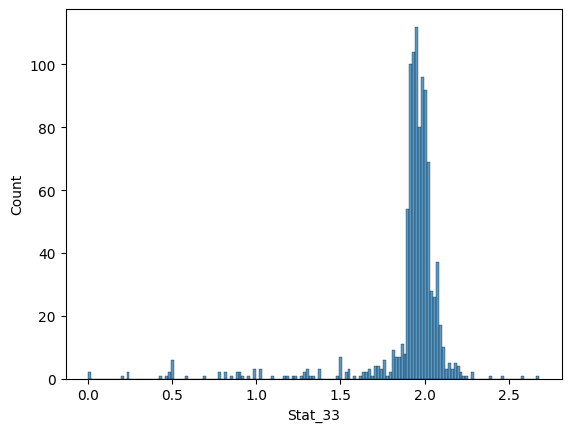

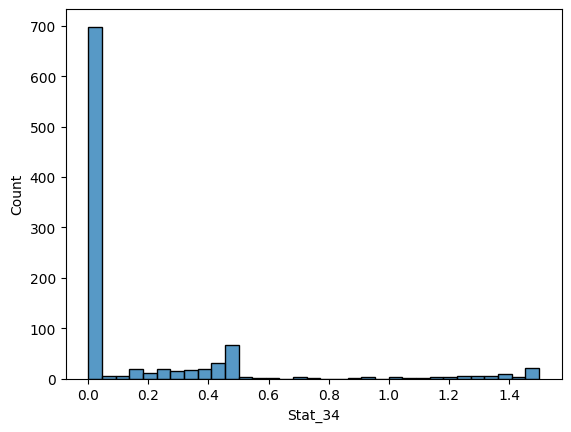

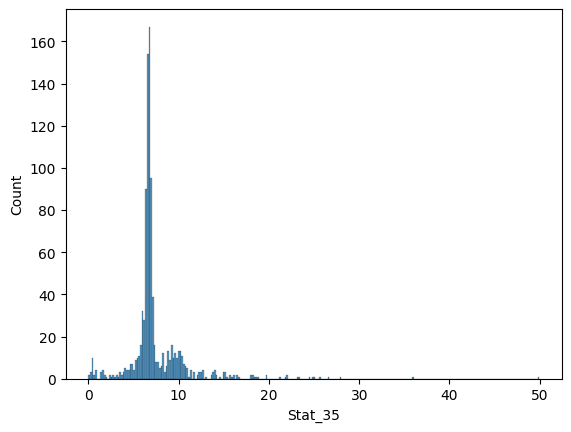

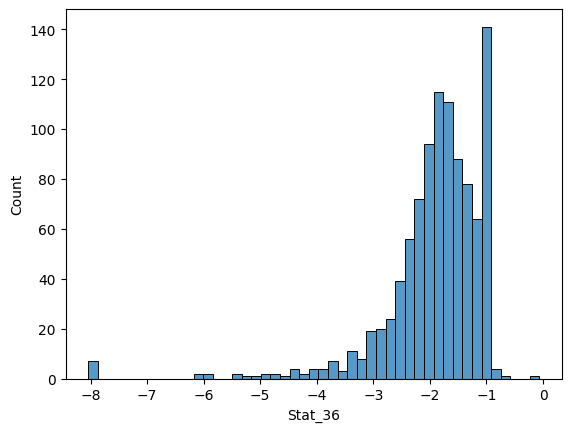

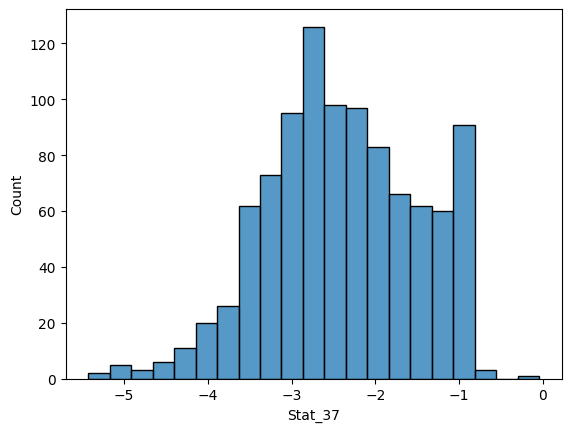

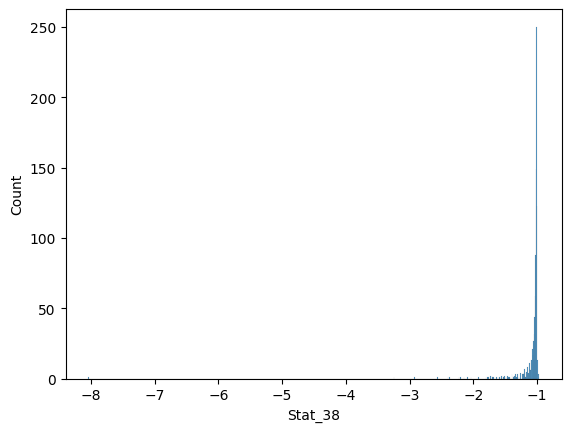

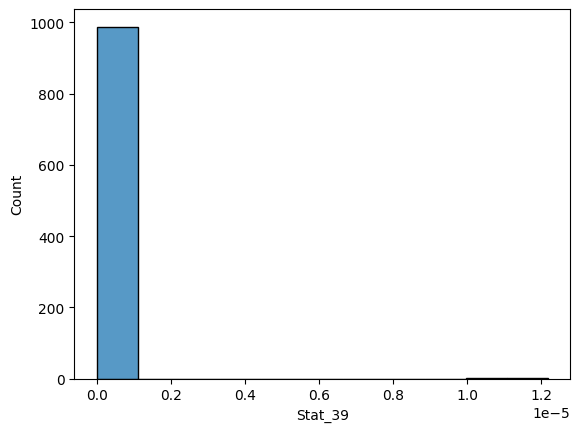

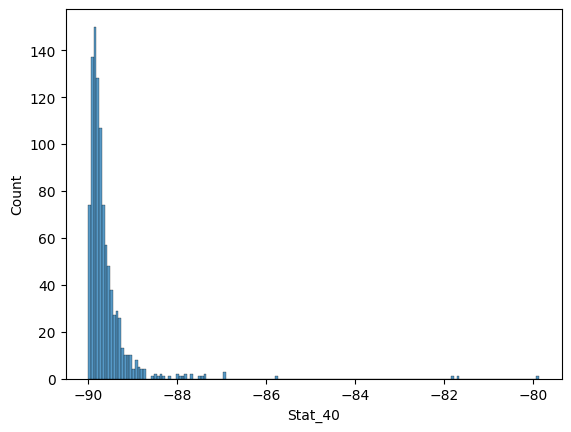

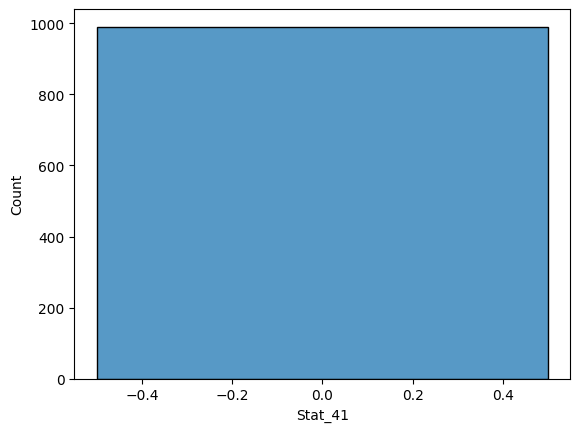

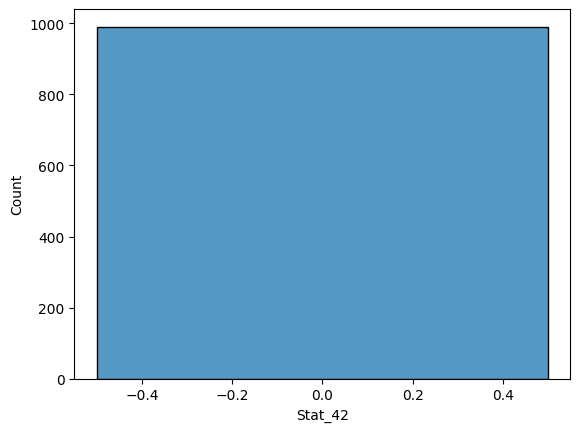

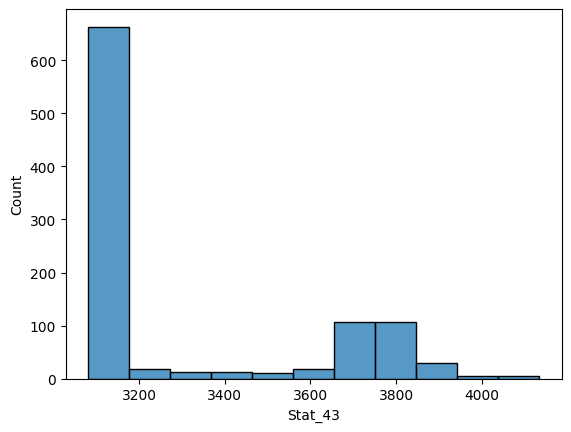

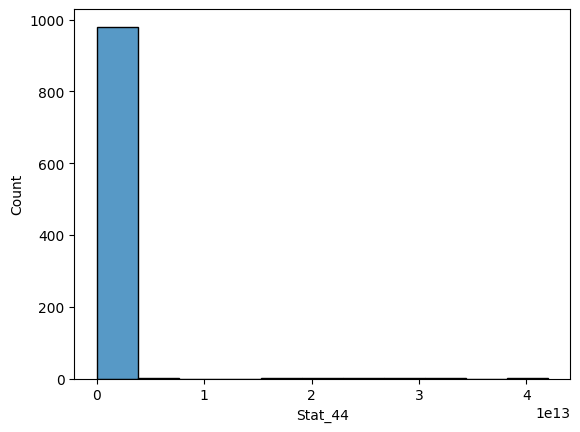

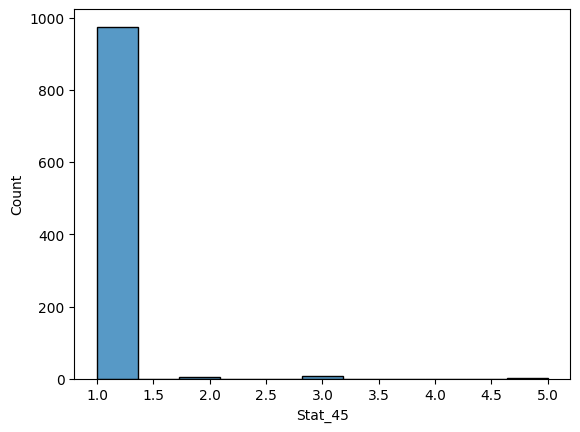

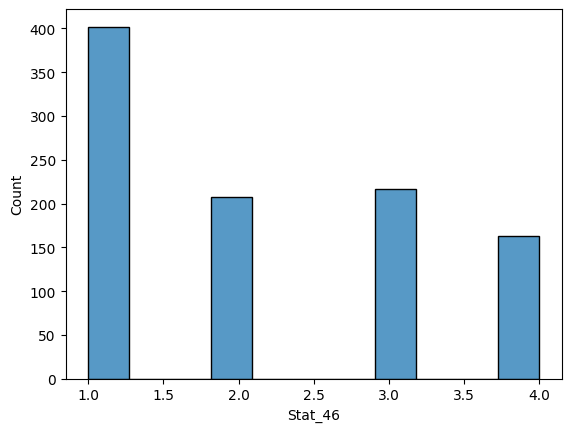

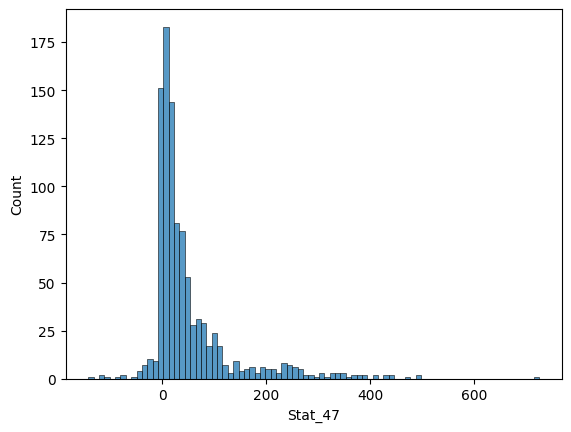

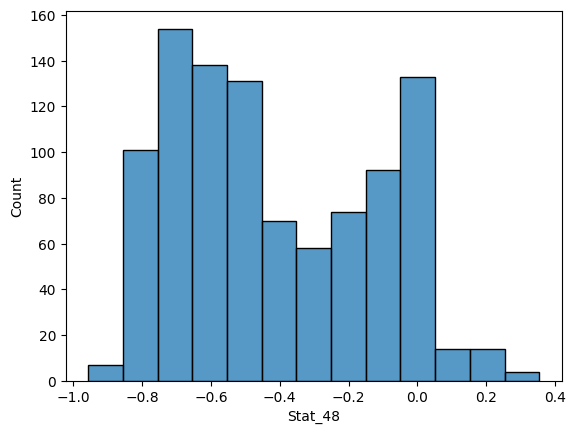

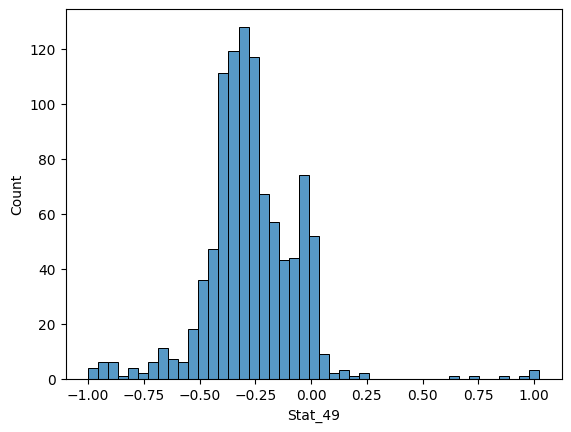

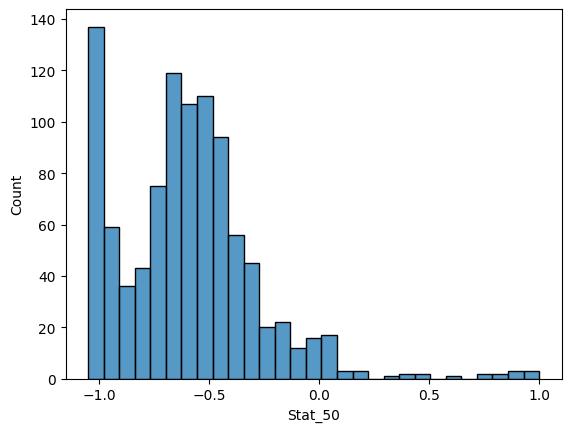

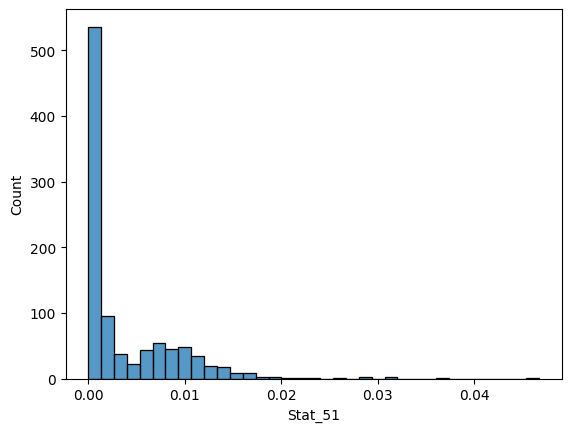

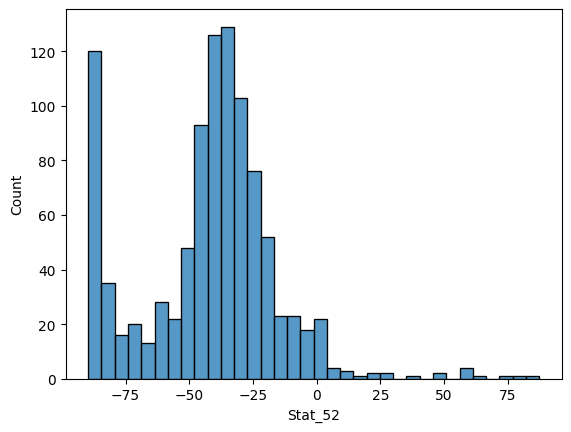

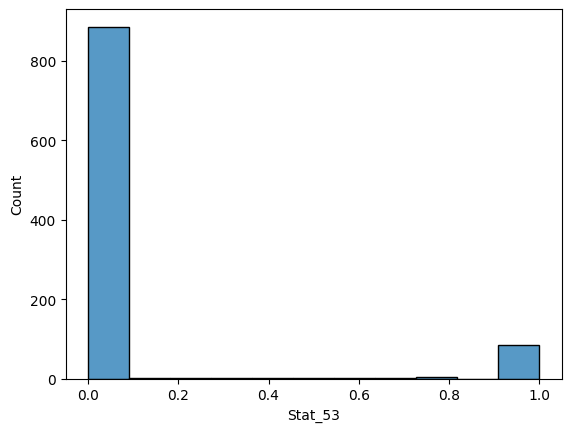

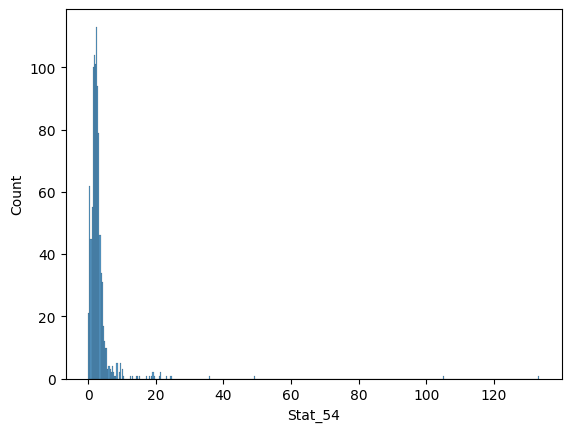

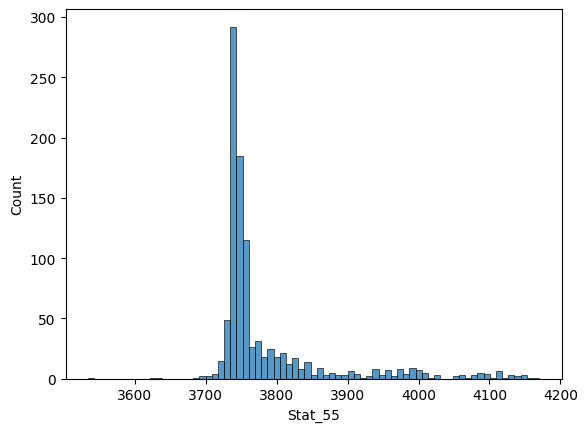

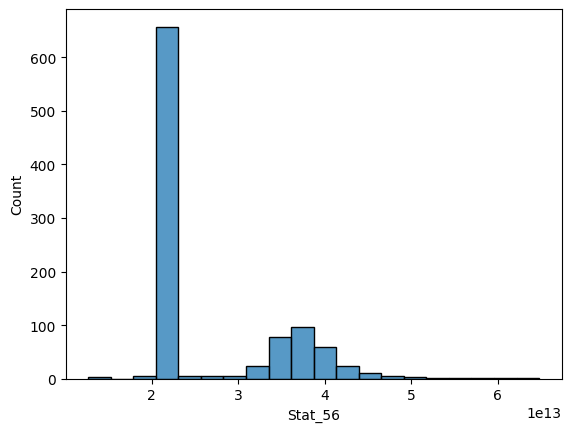

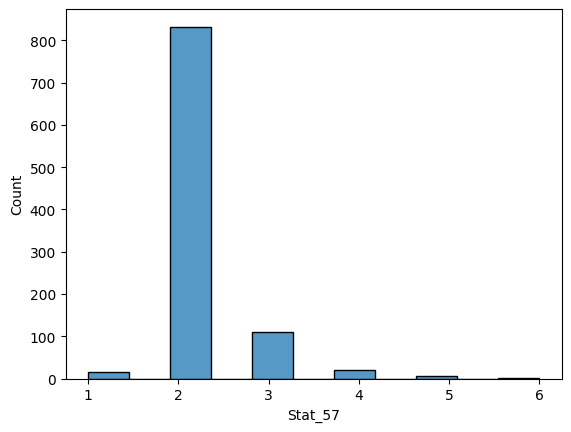

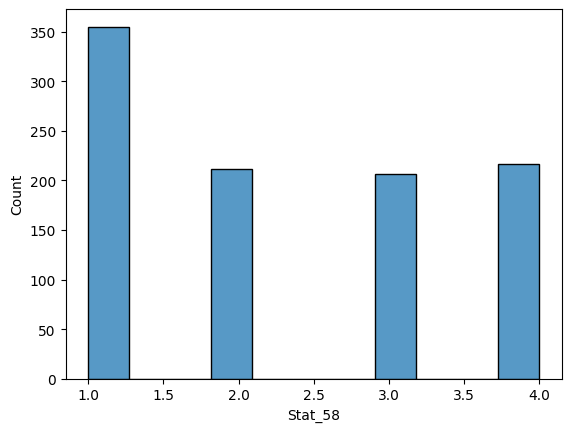

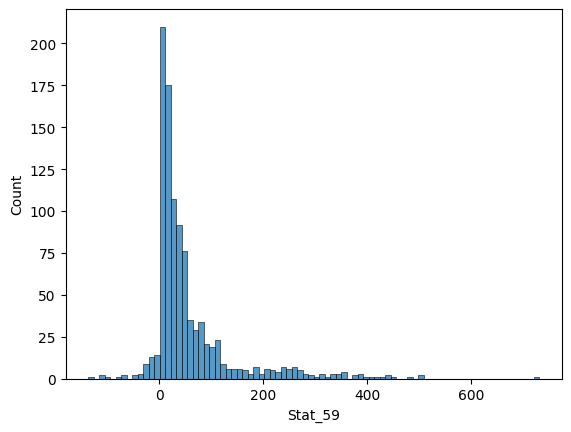

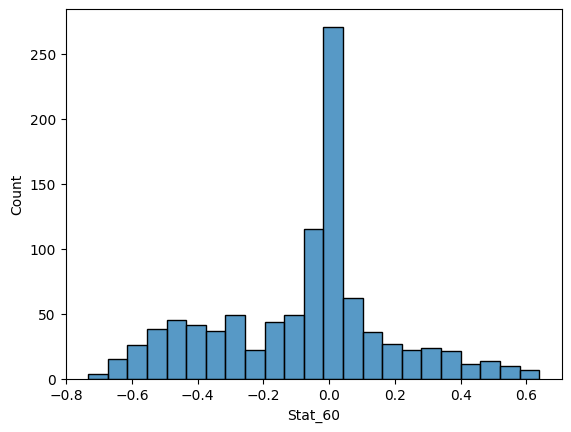

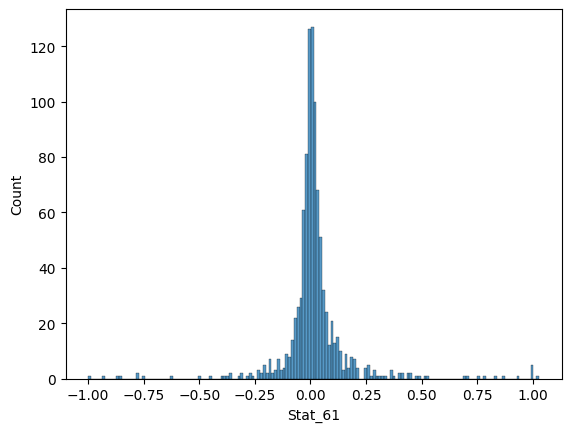

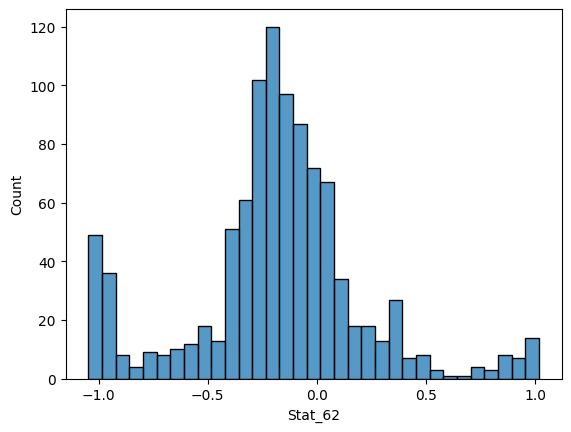

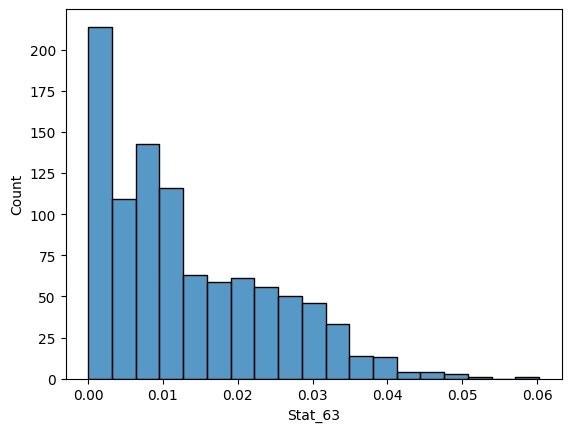

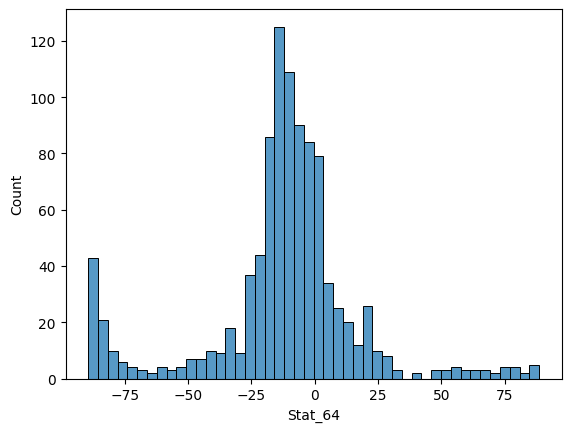

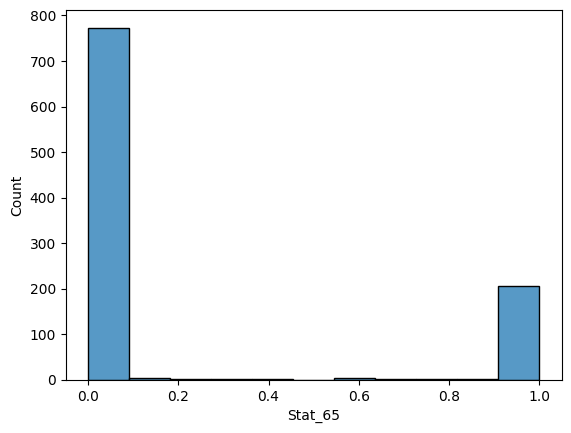

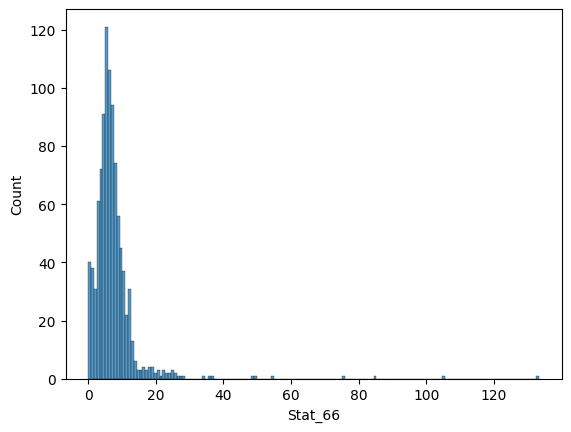

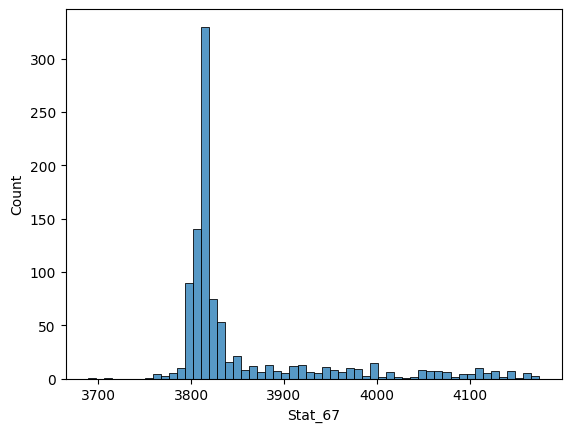

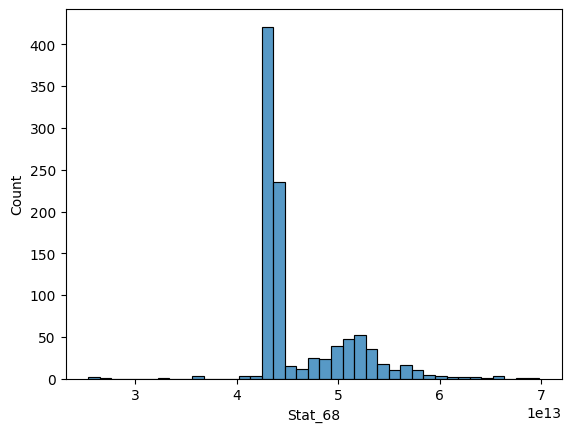

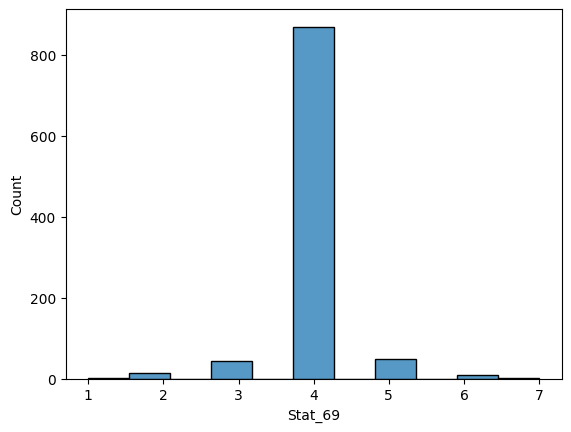

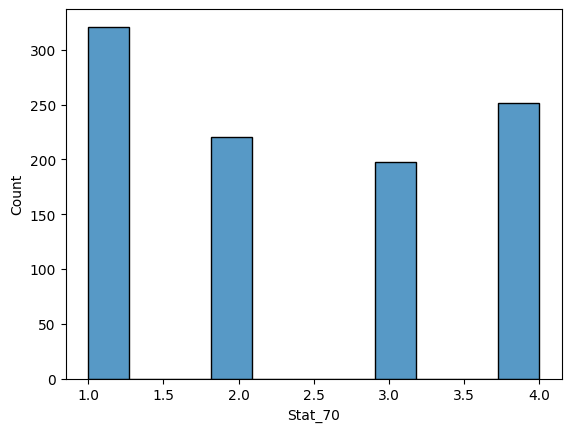

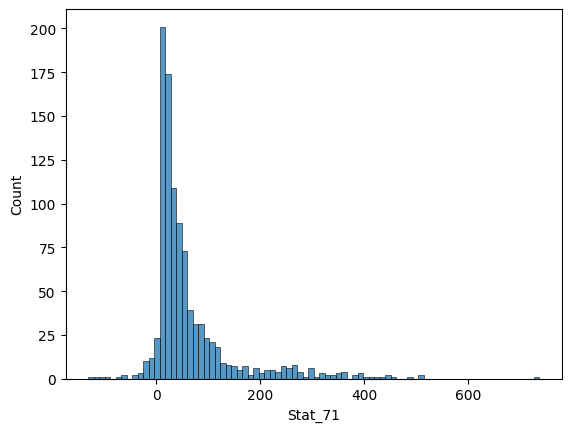

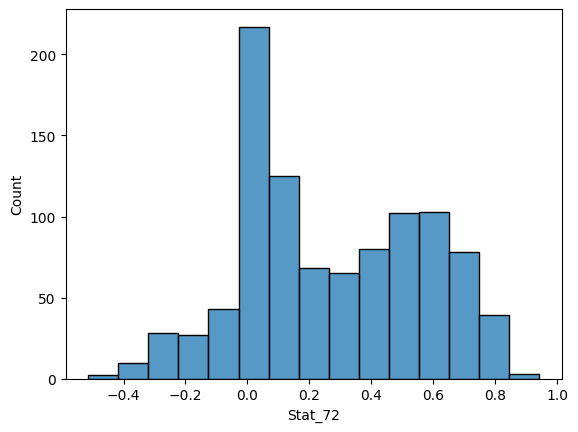

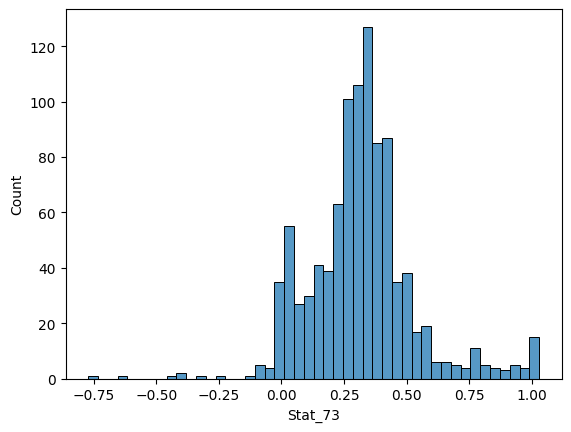

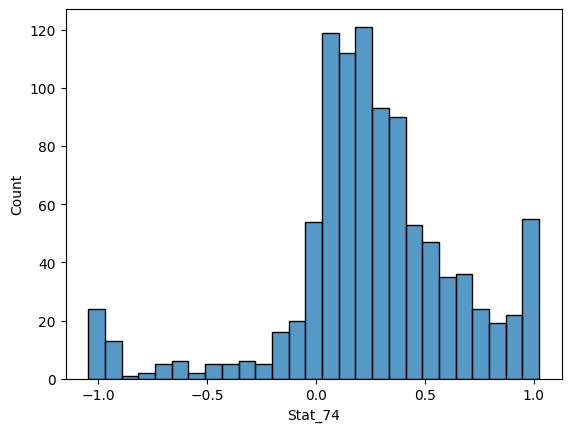

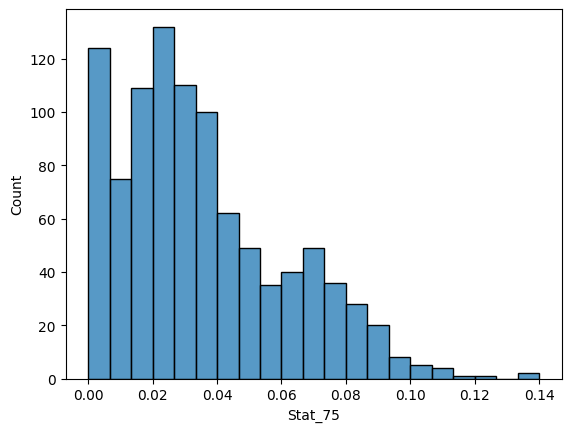

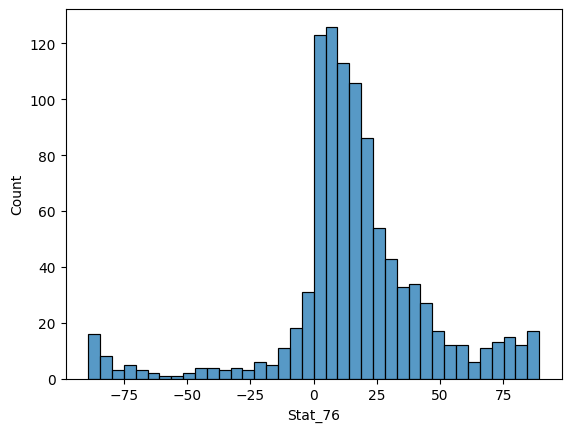

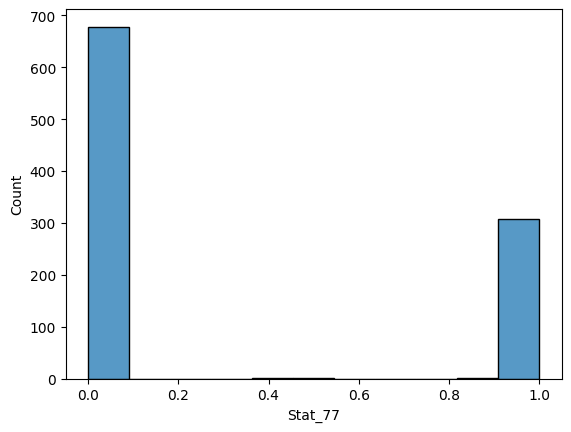

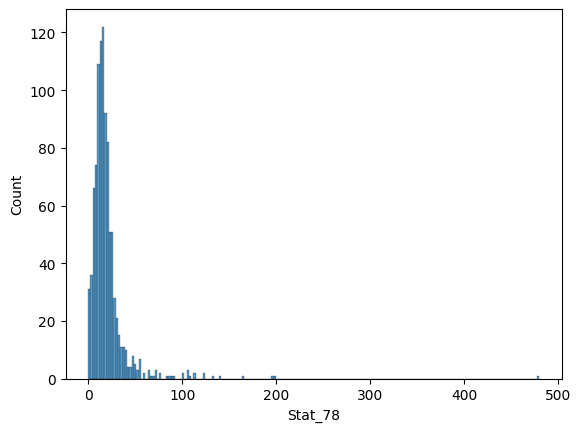

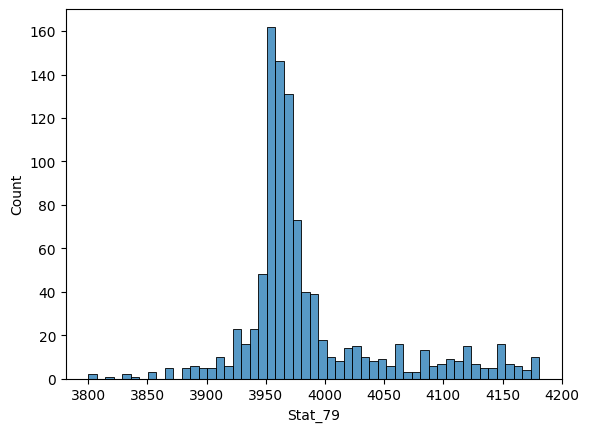

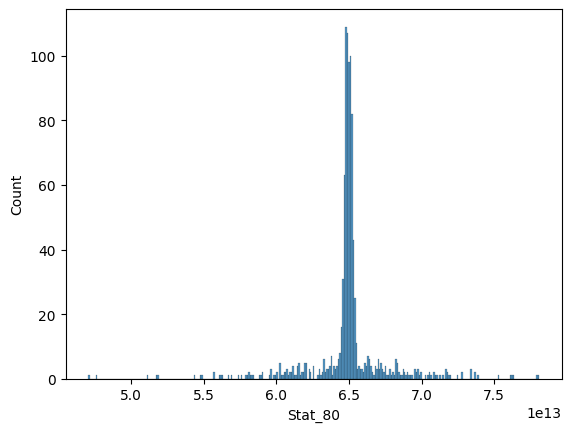

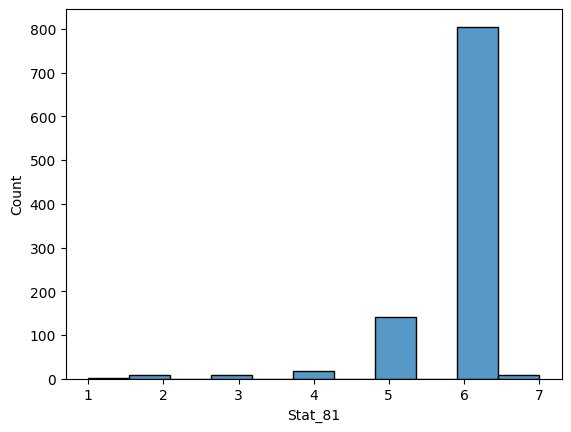

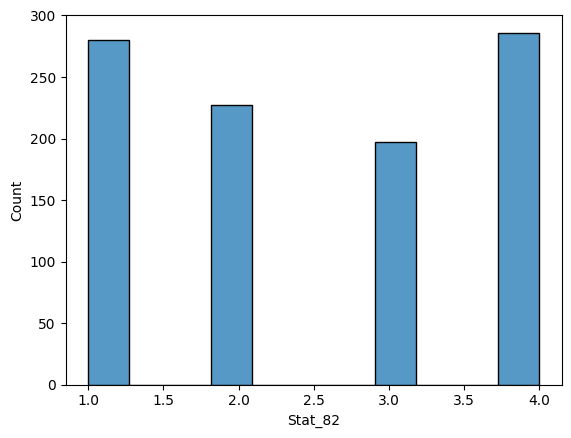

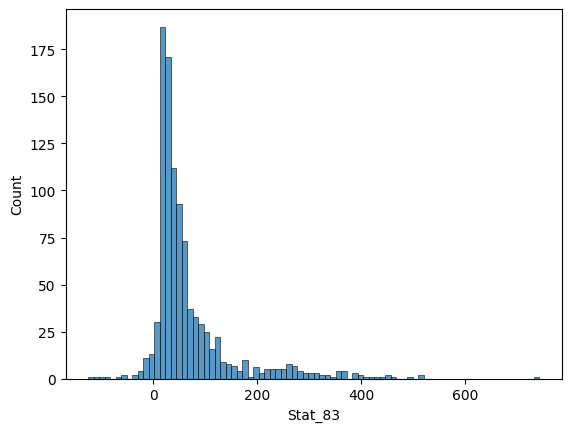

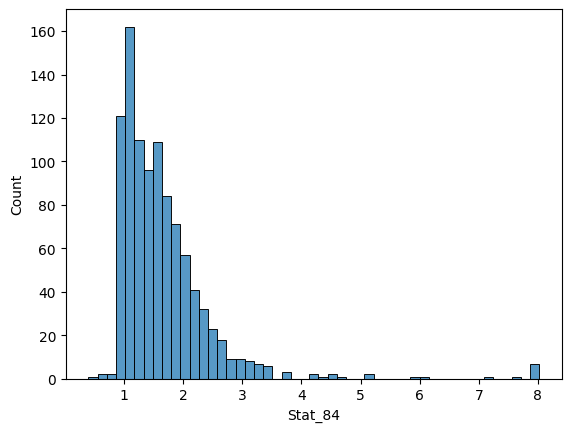

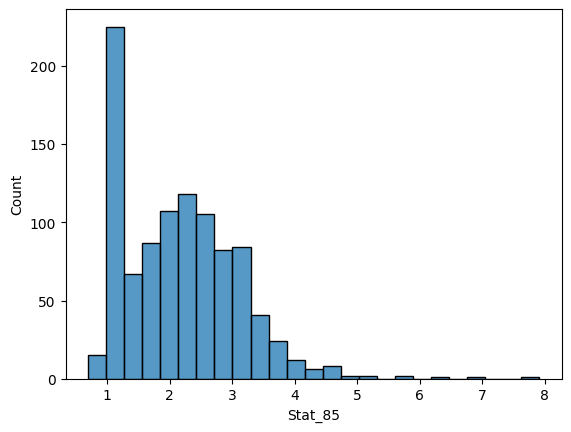

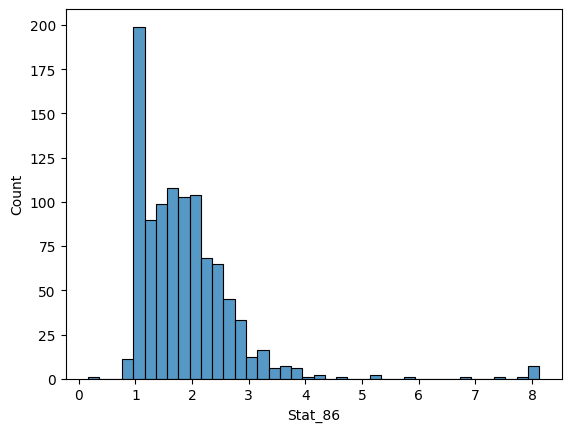

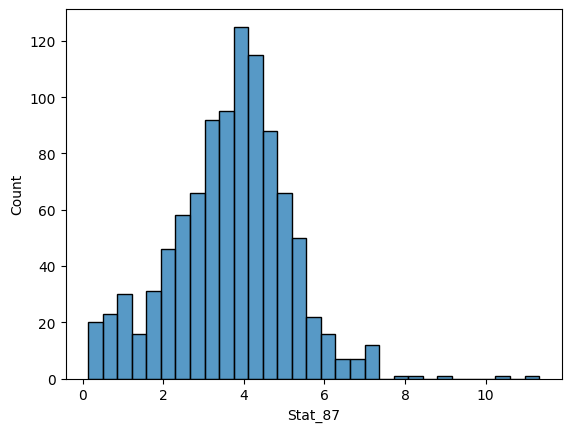

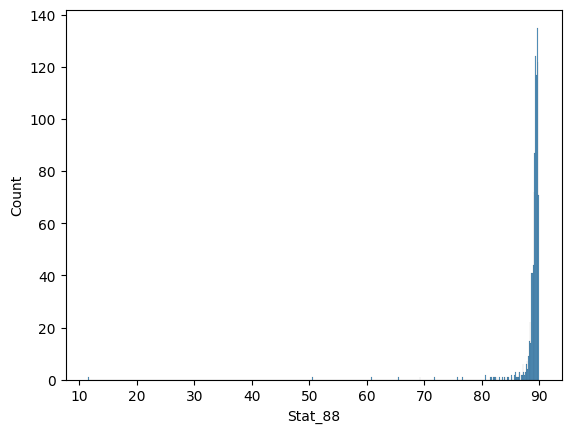

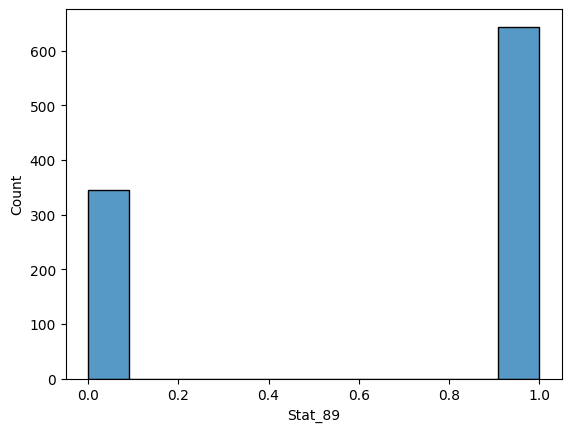

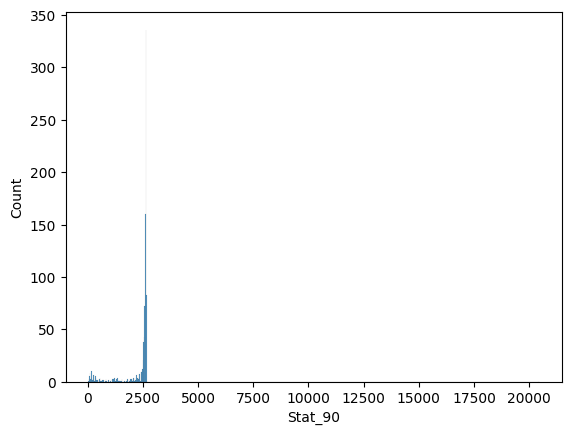

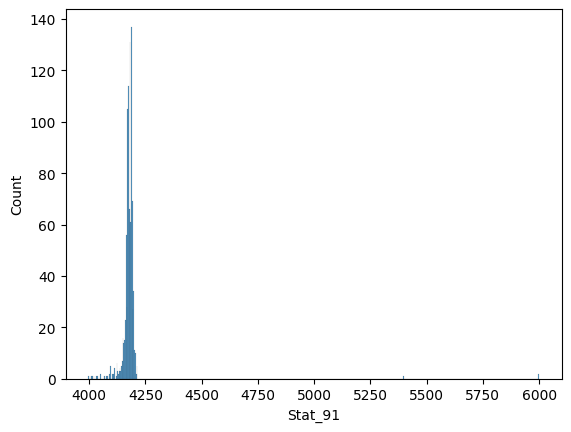

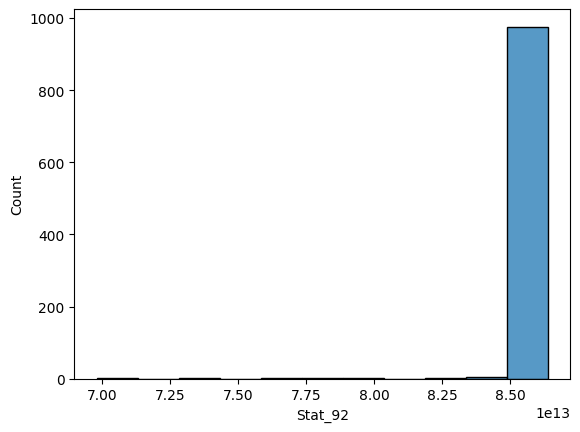

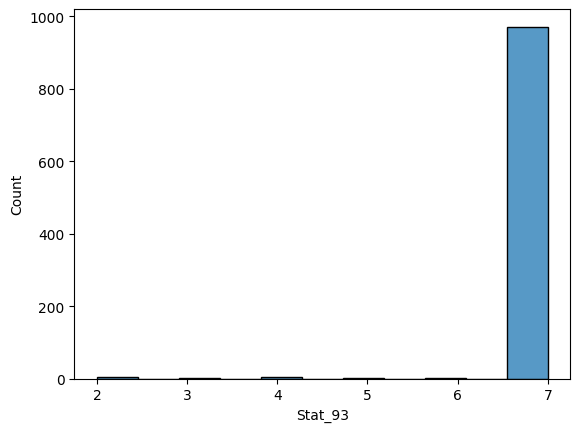

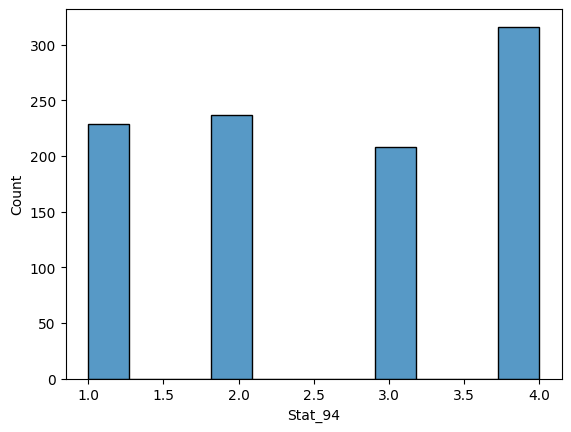

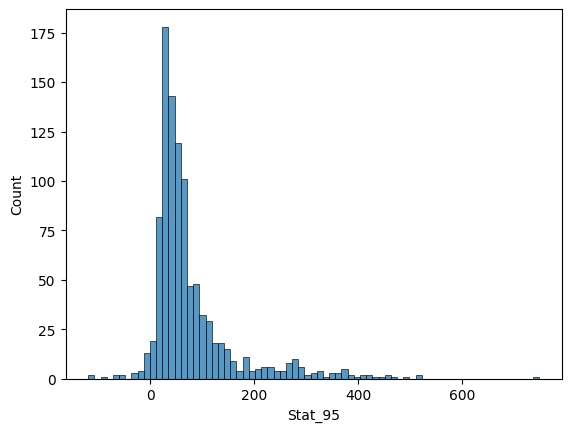

In [ ]:
#Histogram or distribution
for i in train.select_dtypes(include="number").columns:
    sns.histplot(data=train,x=i)
    plt.show()

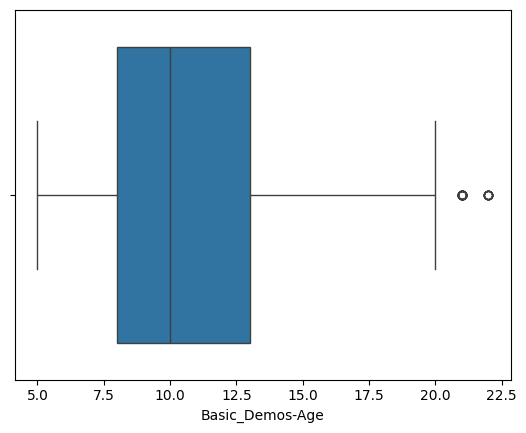

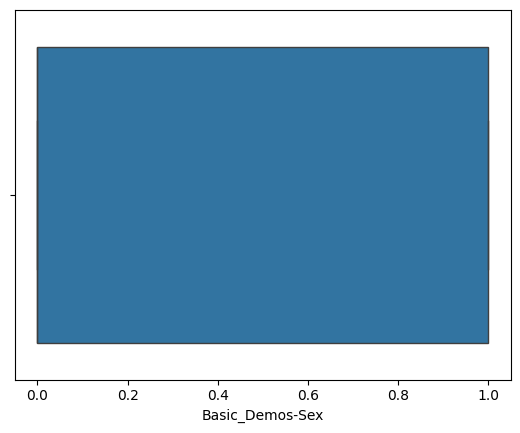

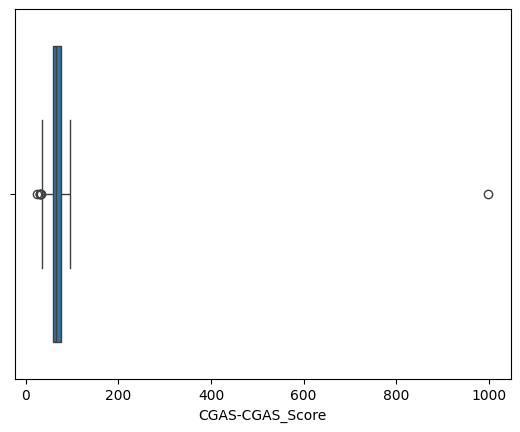

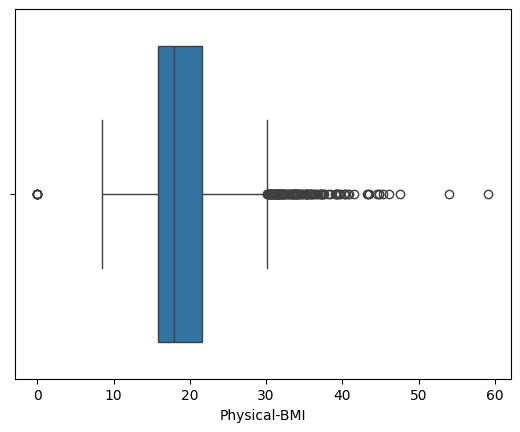

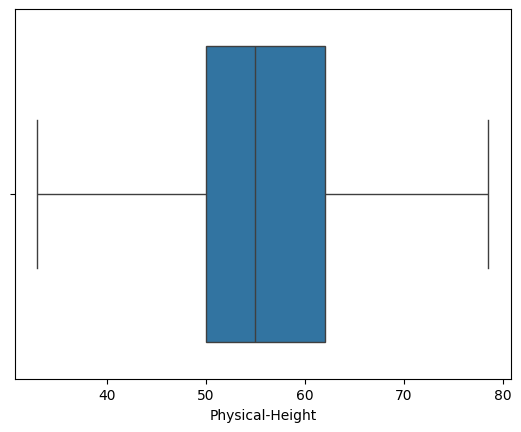

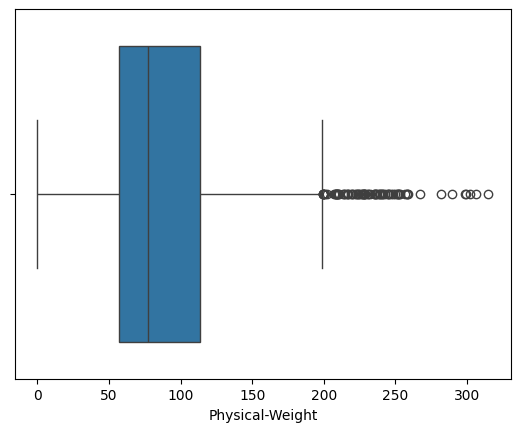

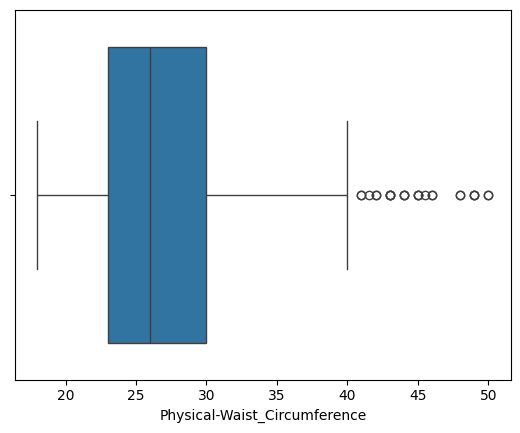

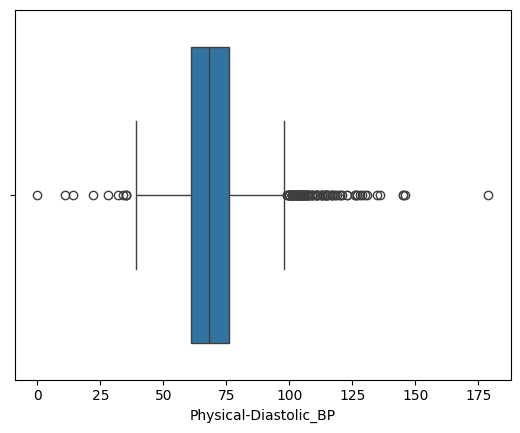

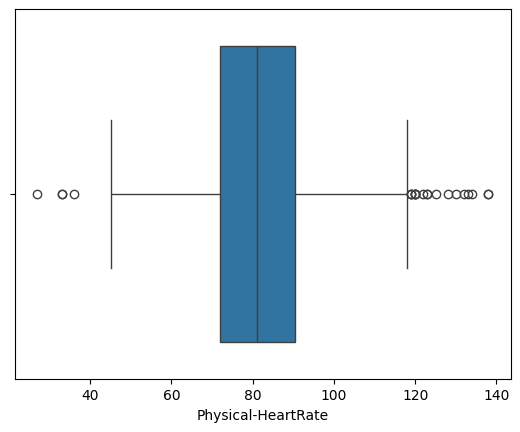

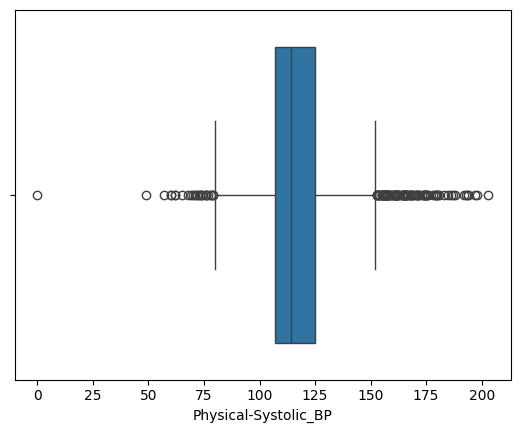

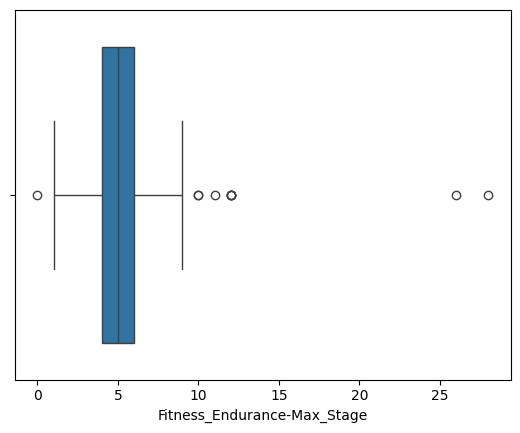

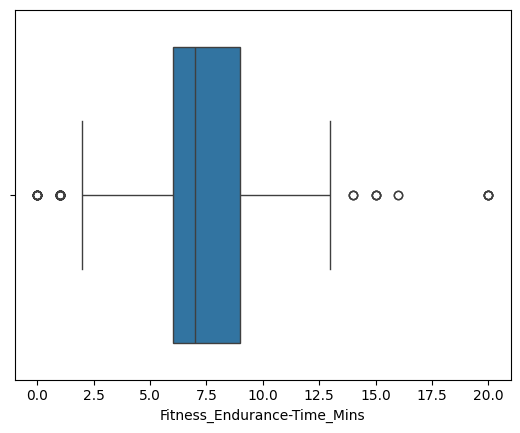

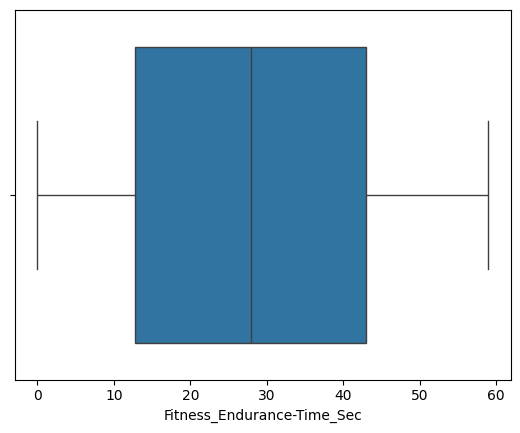

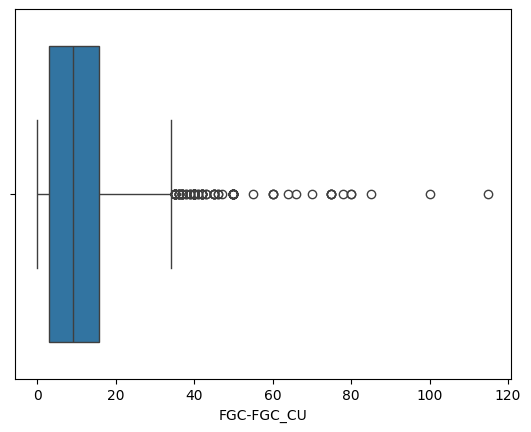

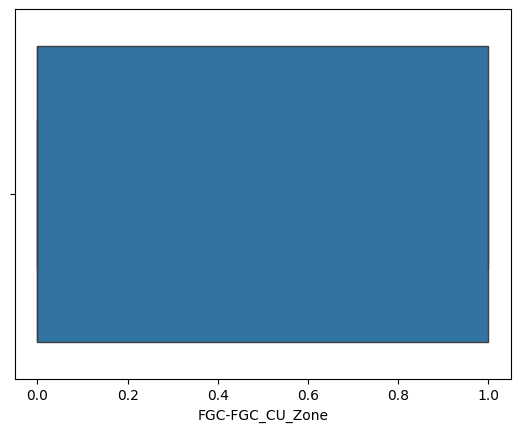

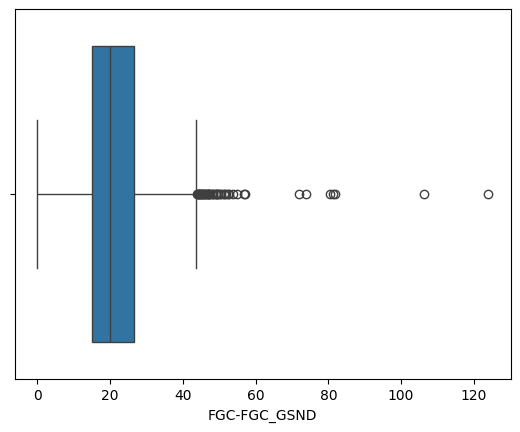

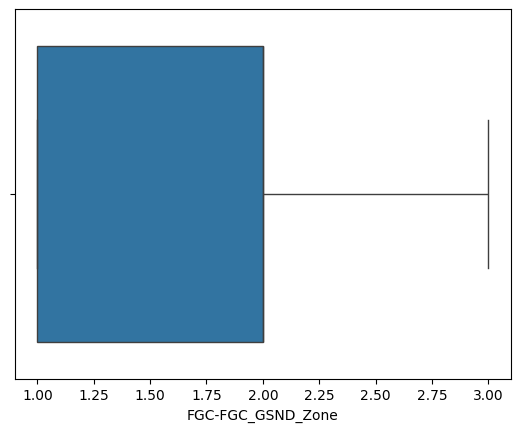

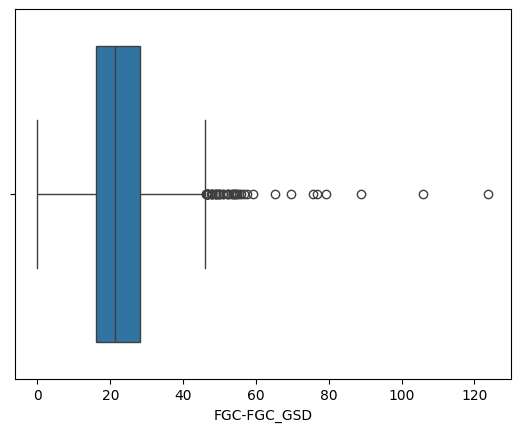

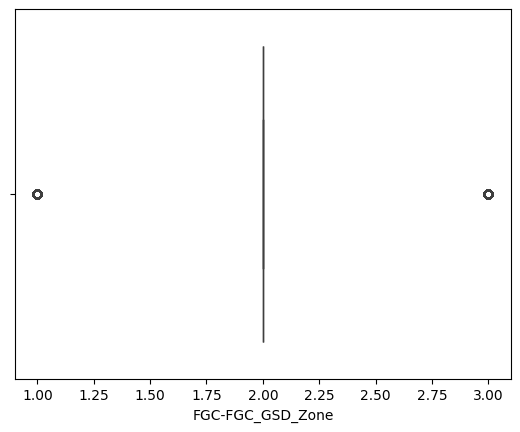

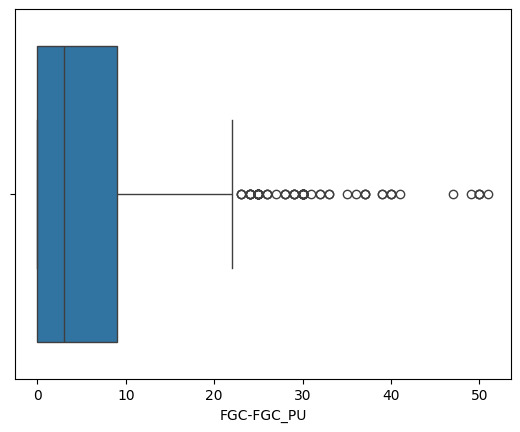

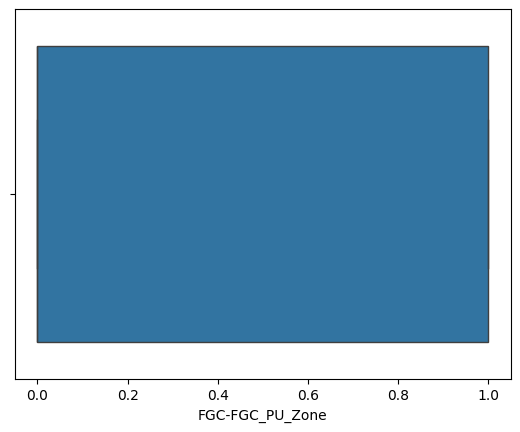

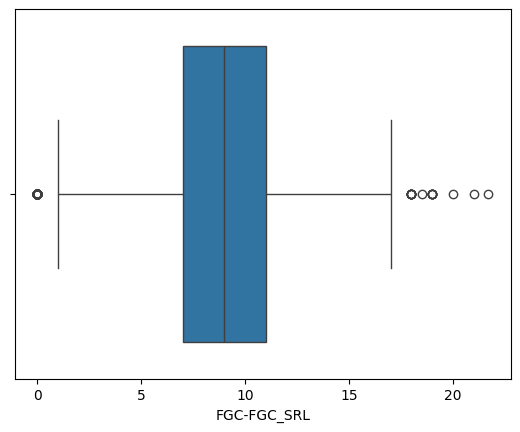

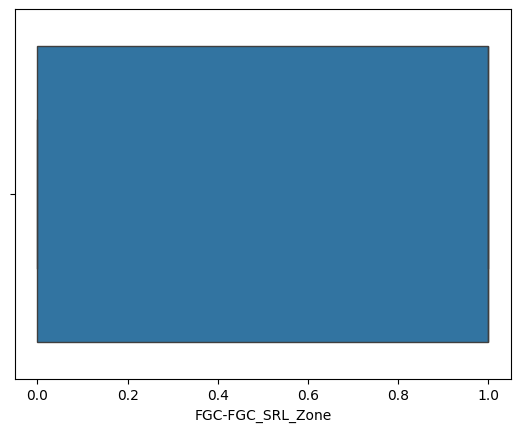

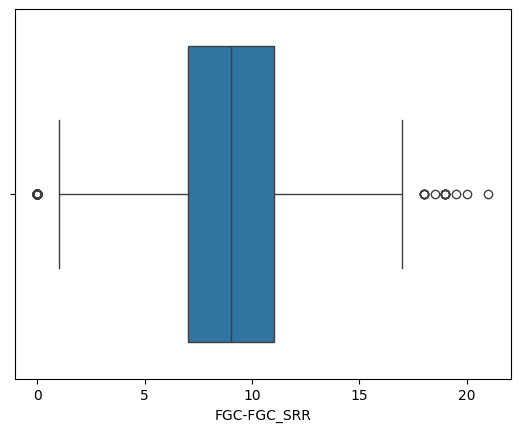

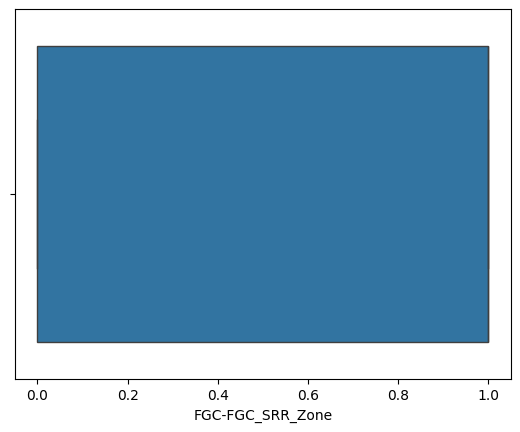

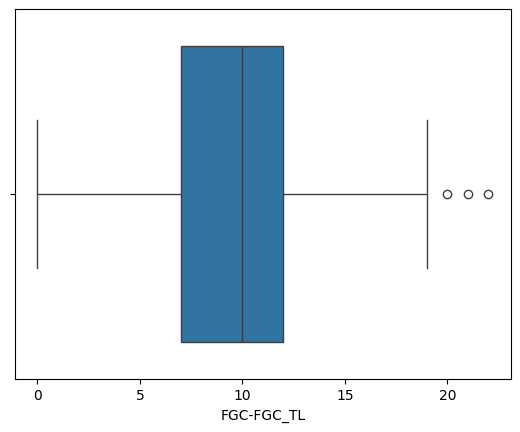

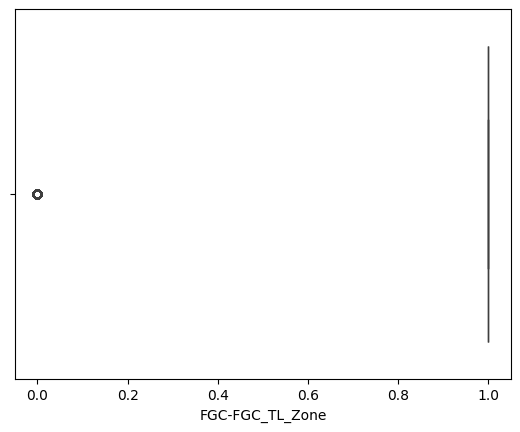

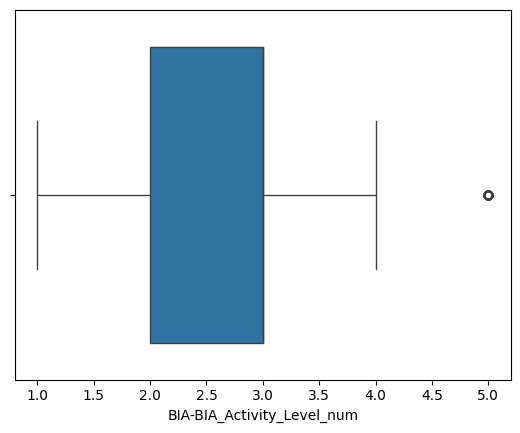

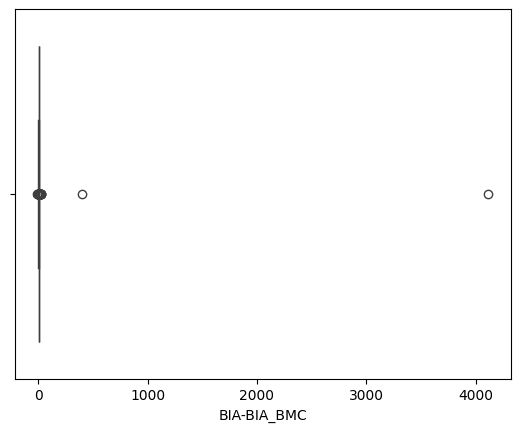

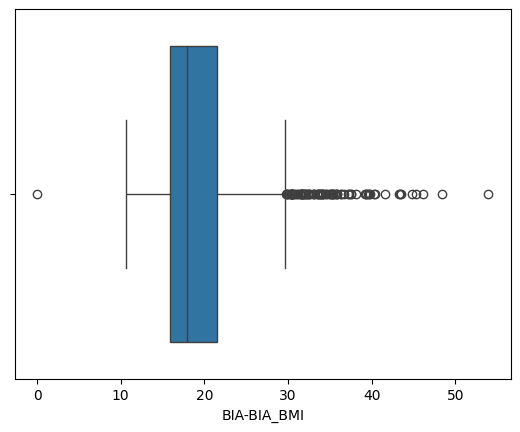

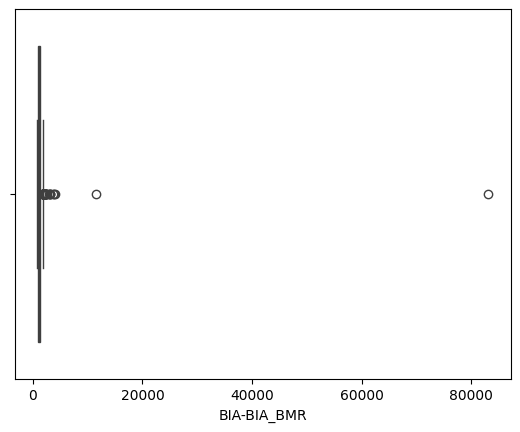

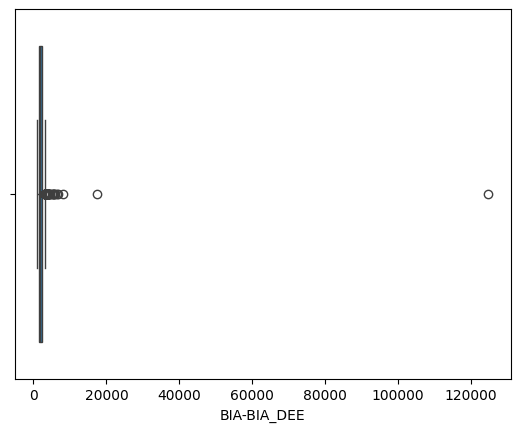

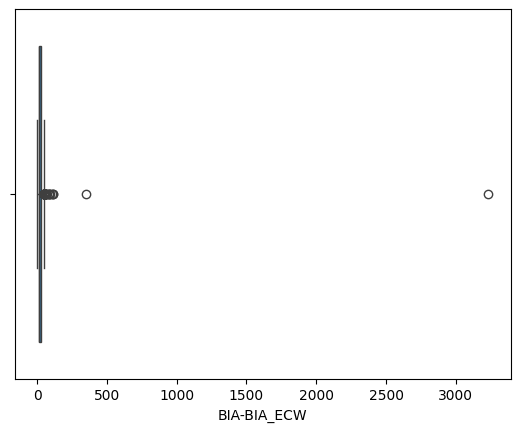

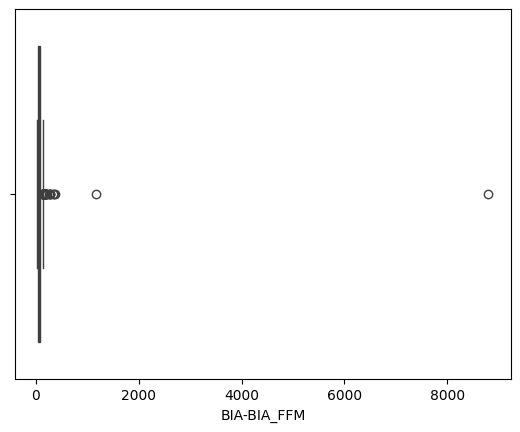

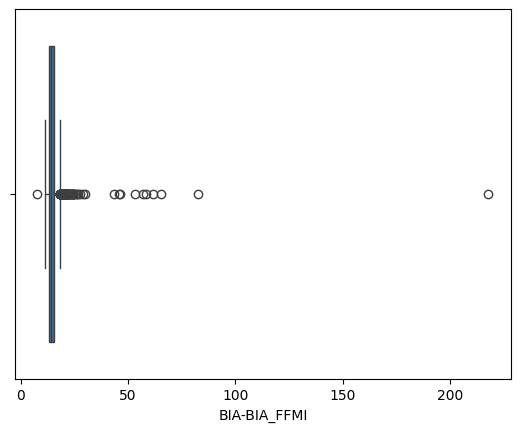

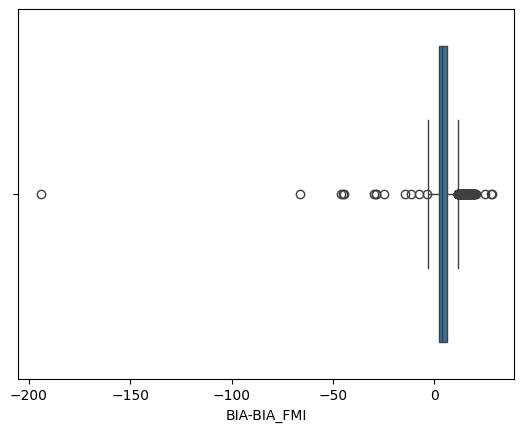

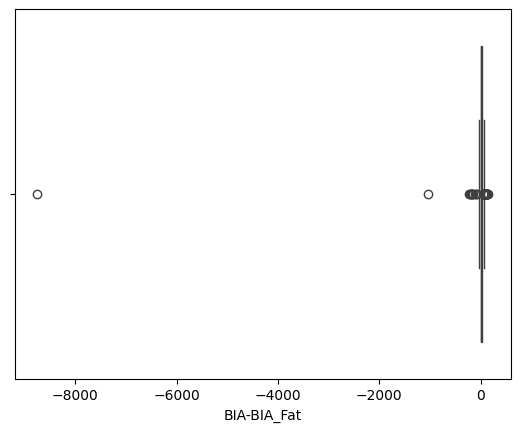

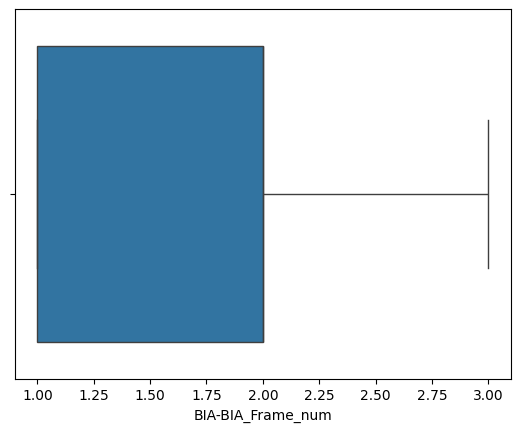

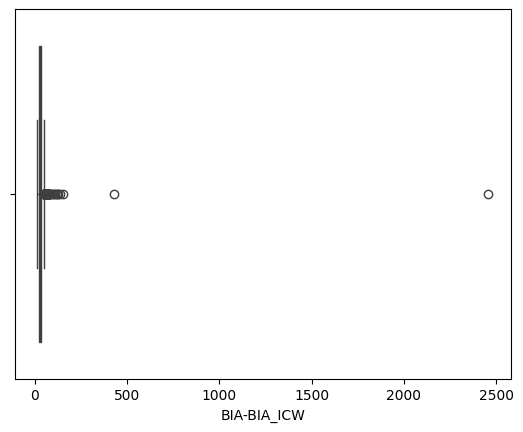

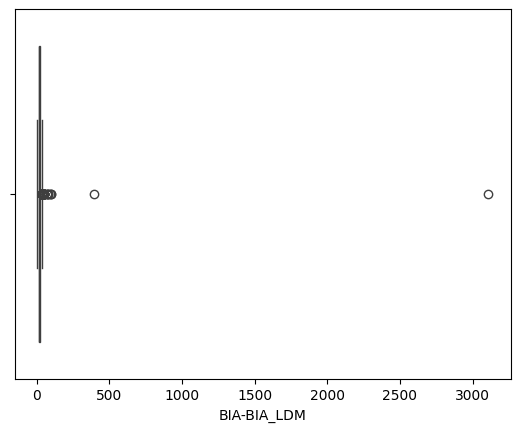

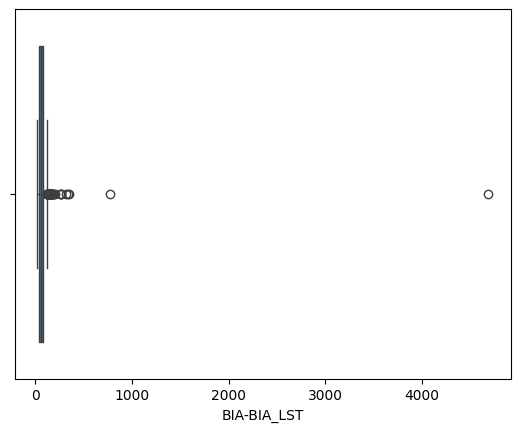

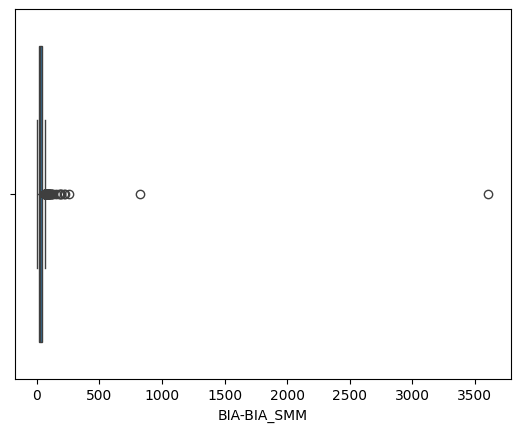

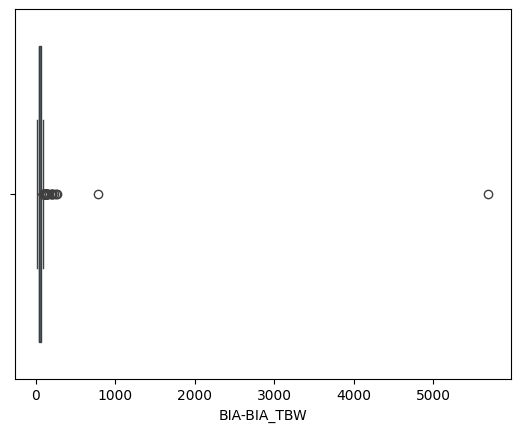

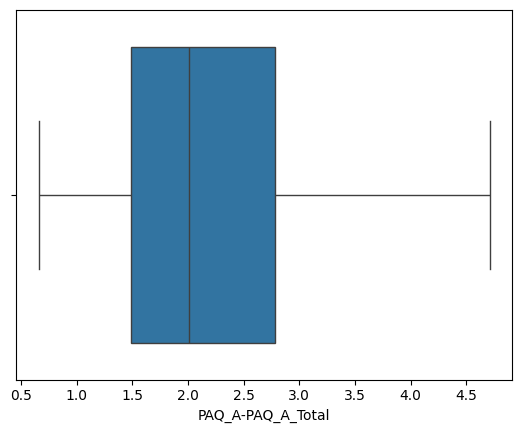

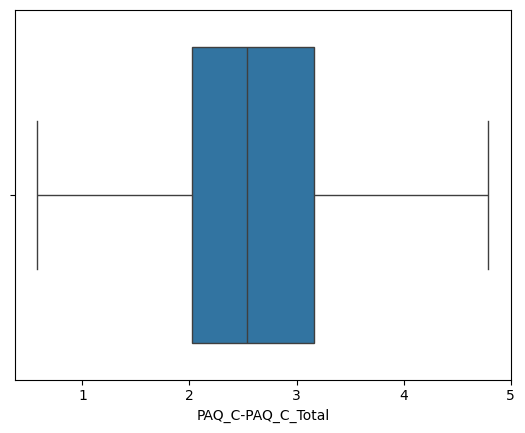

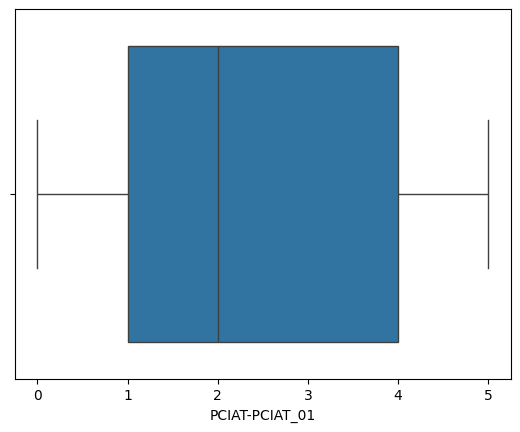

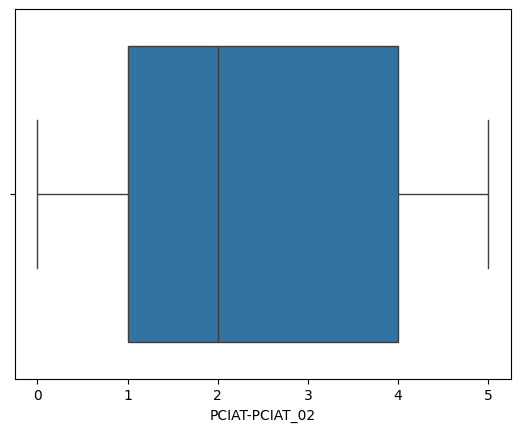

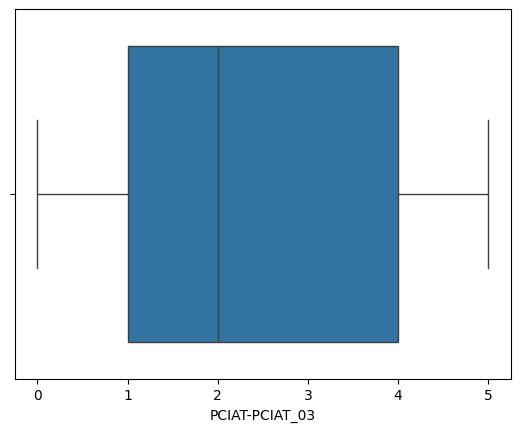

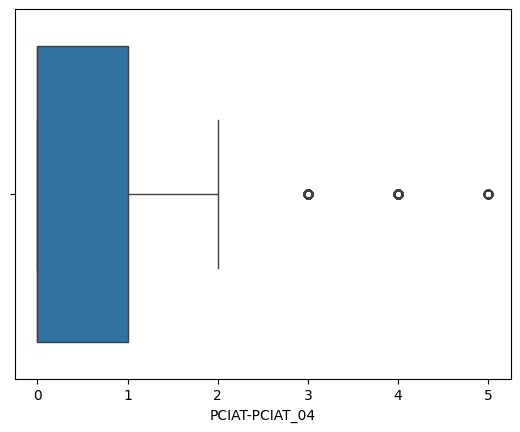

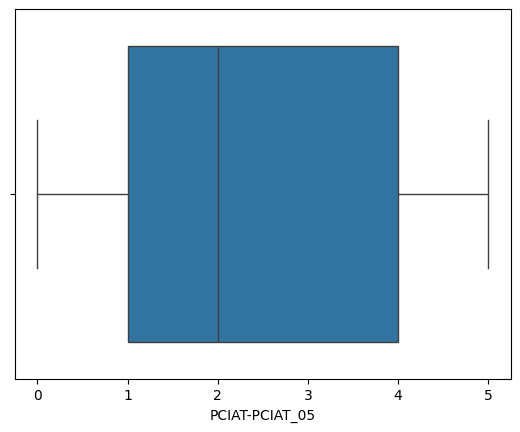

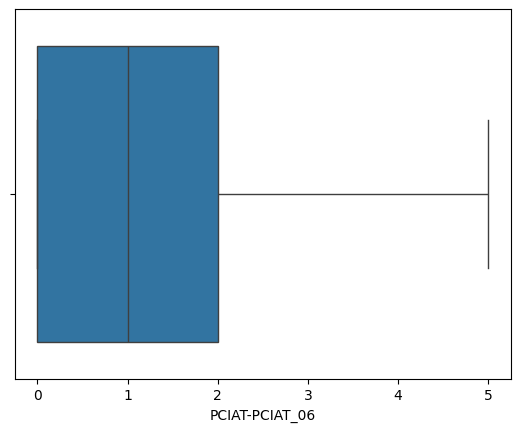

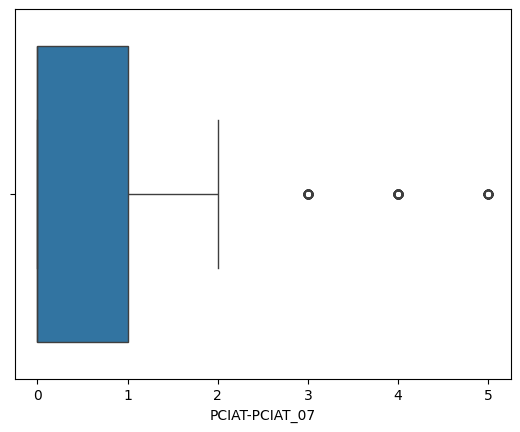

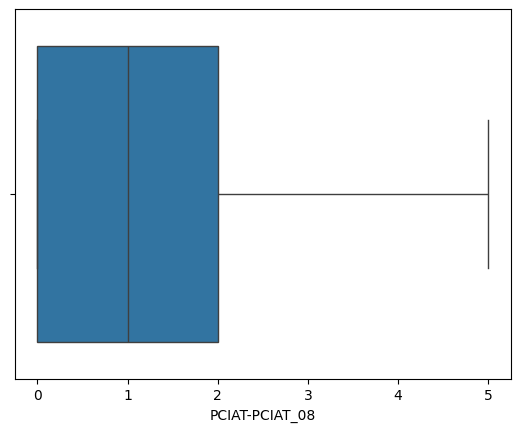

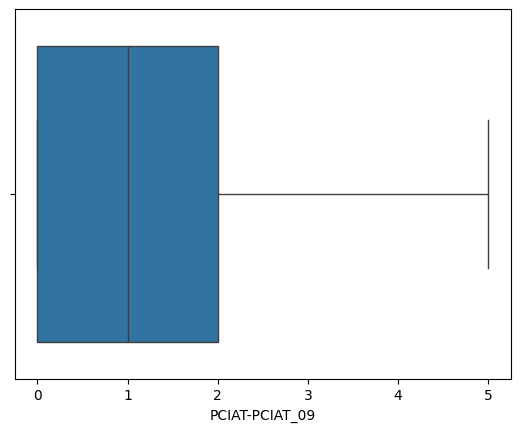

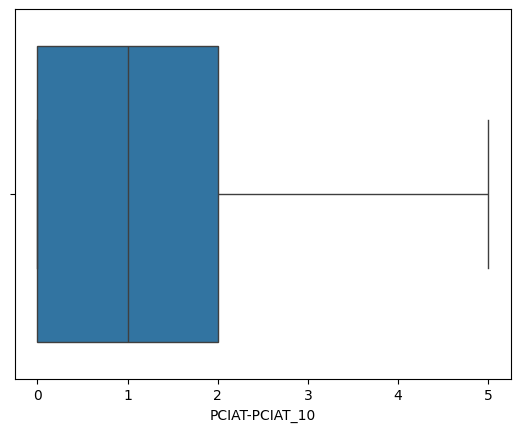

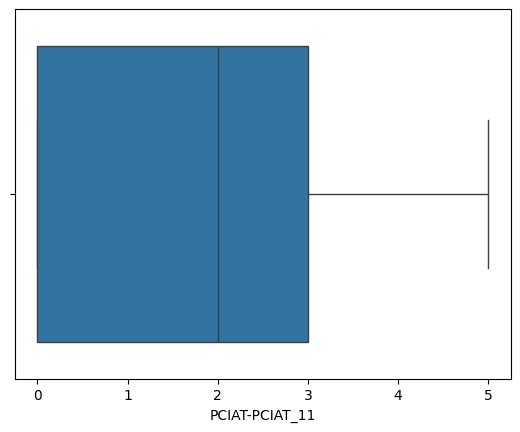

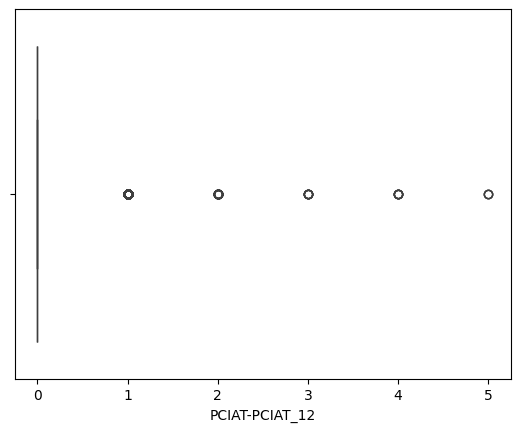

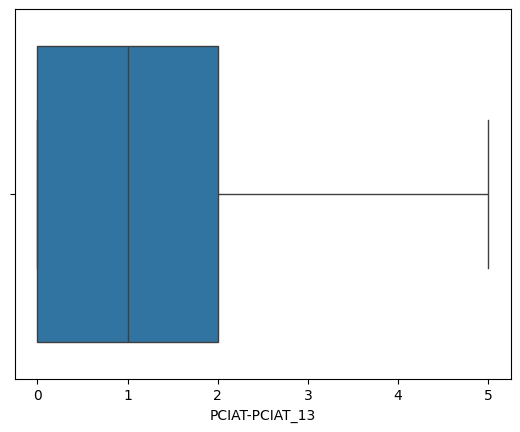

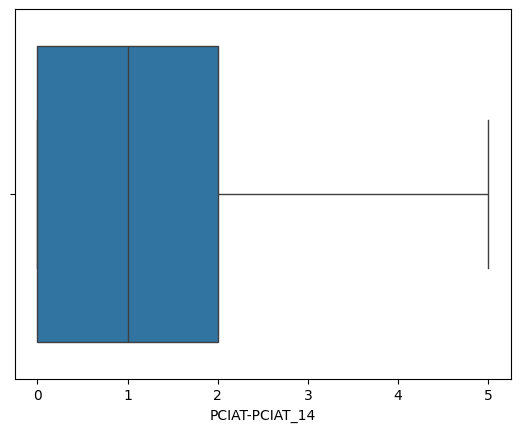

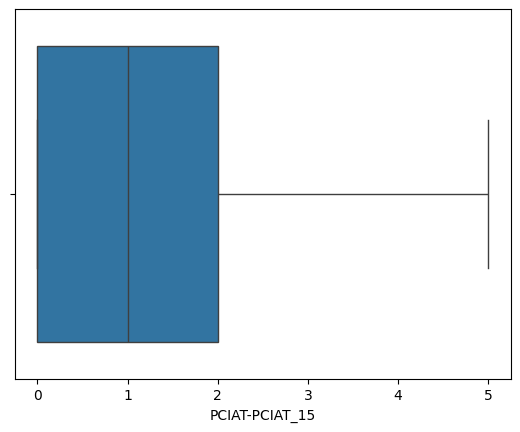

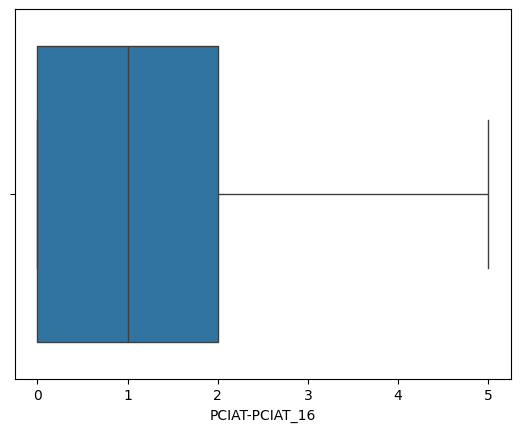

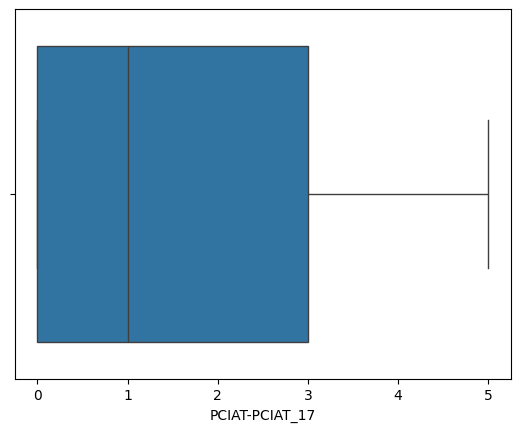

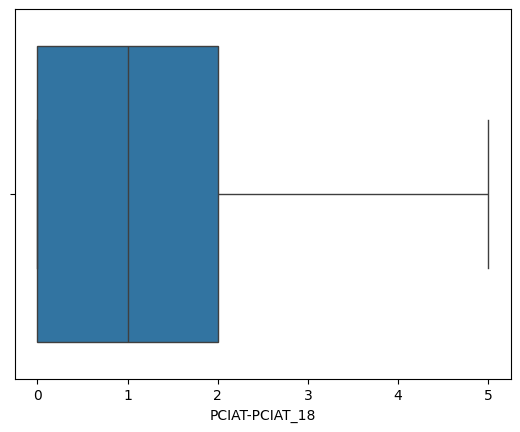

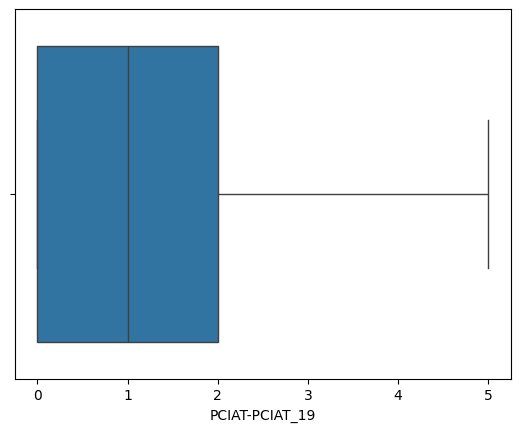

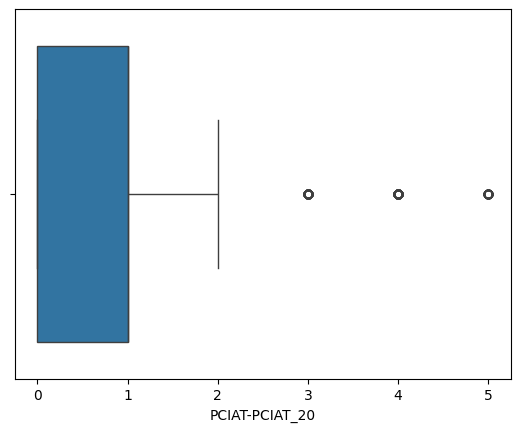

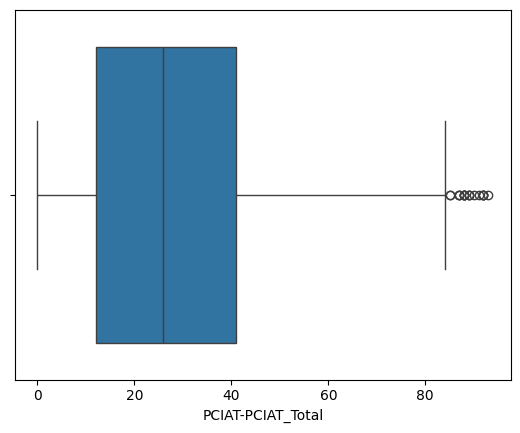

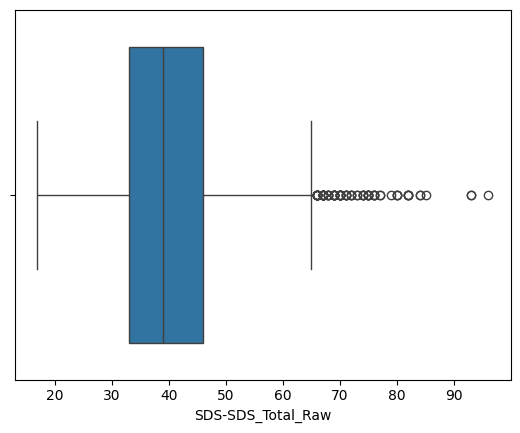

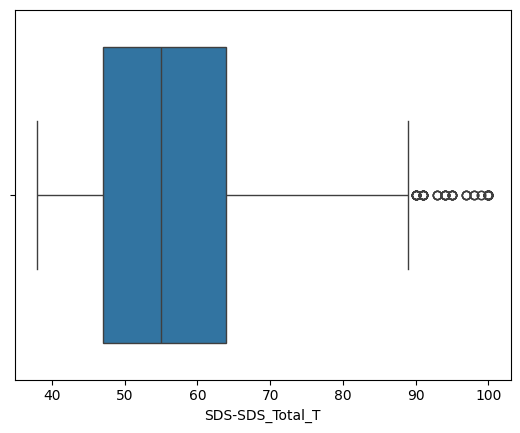

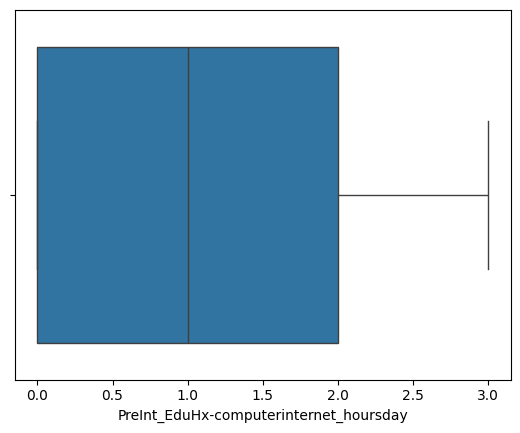

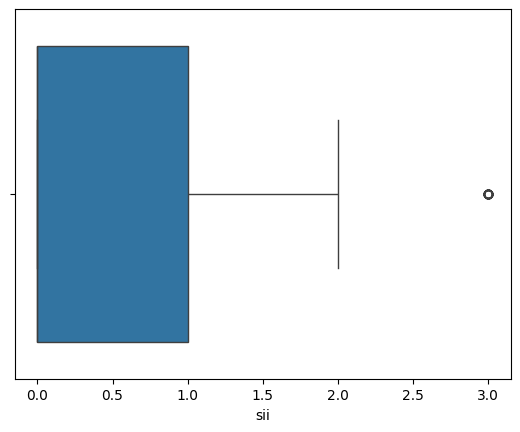

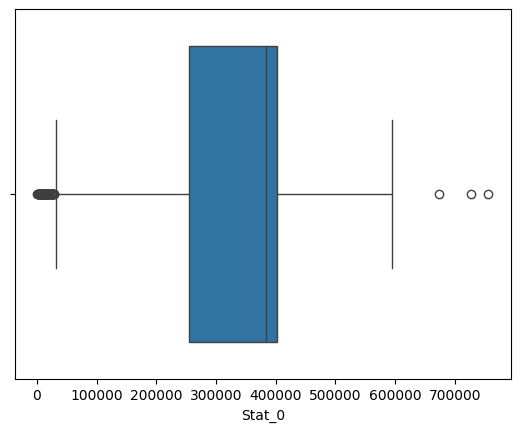

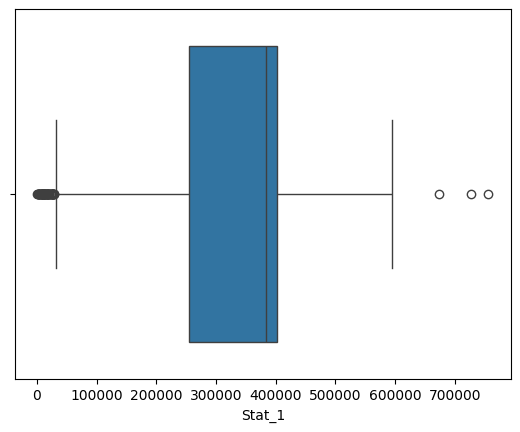

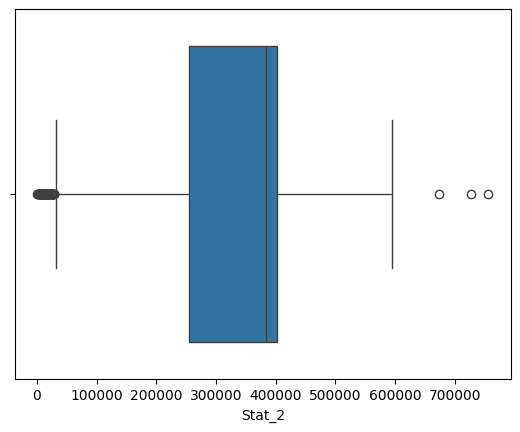

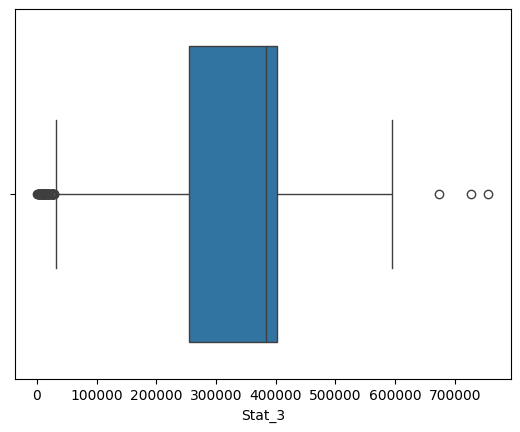

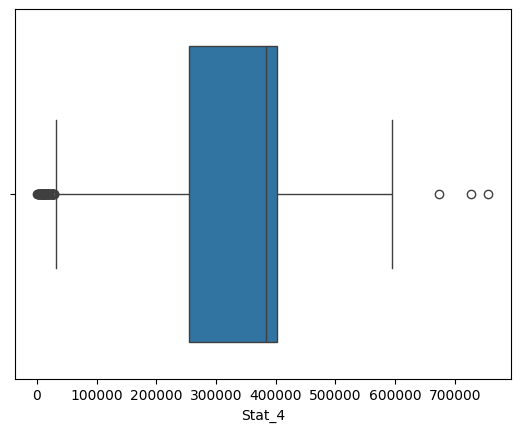

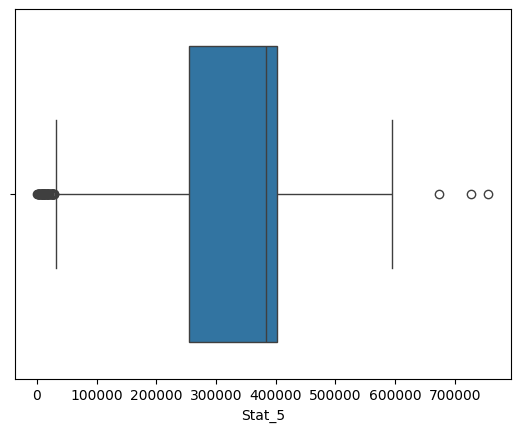

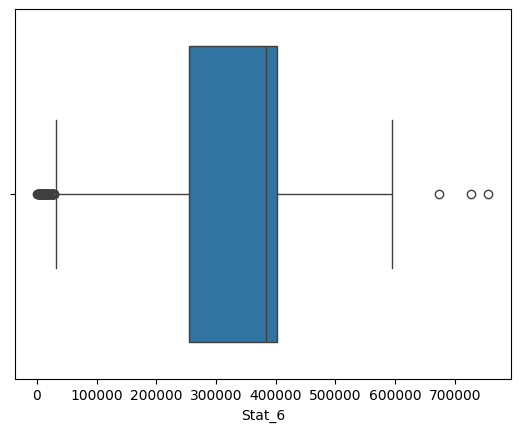

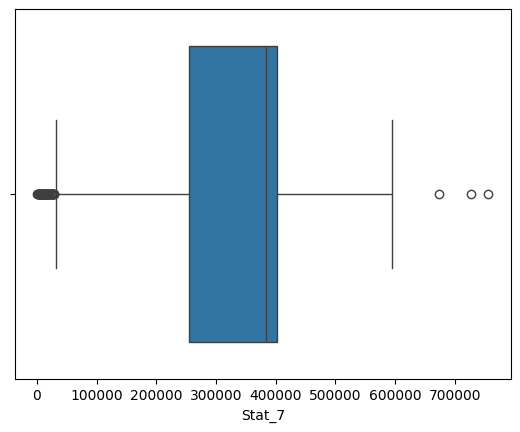

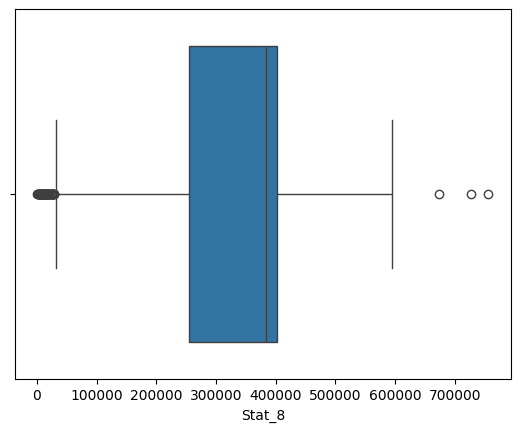

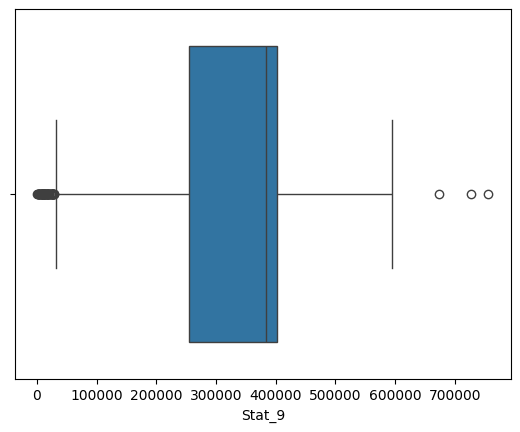

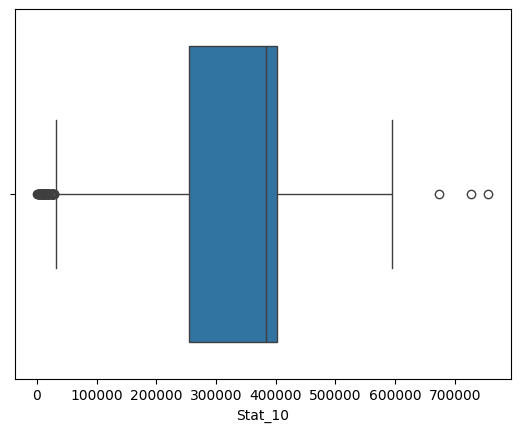

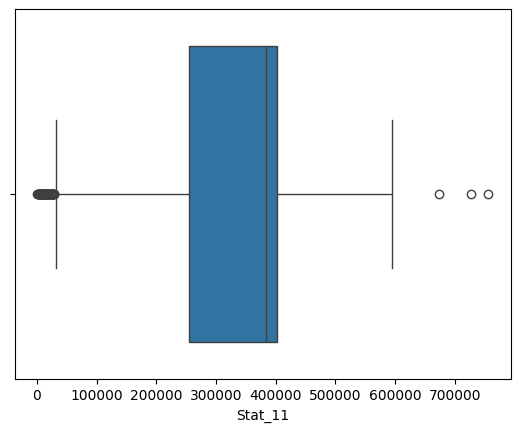

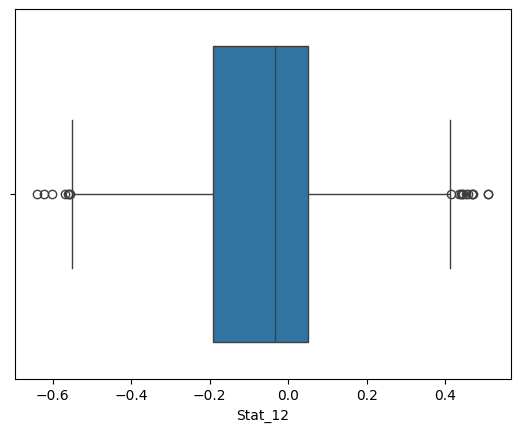

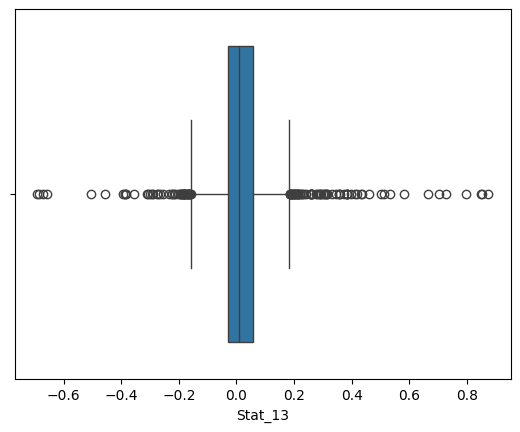

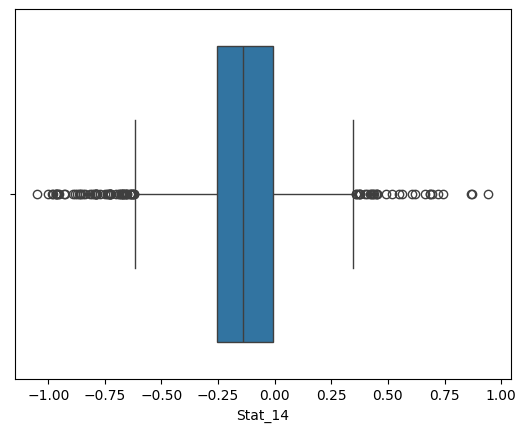

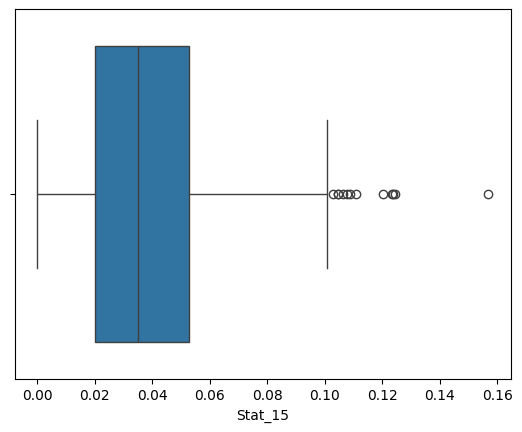

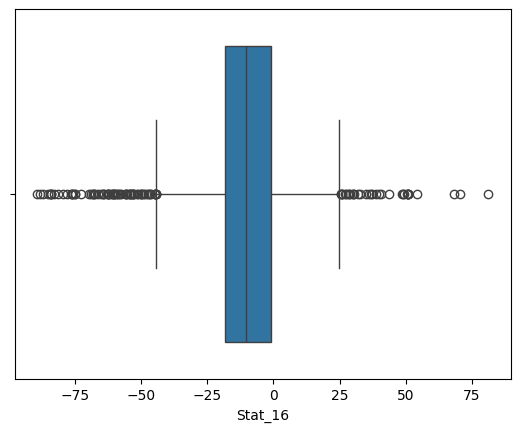

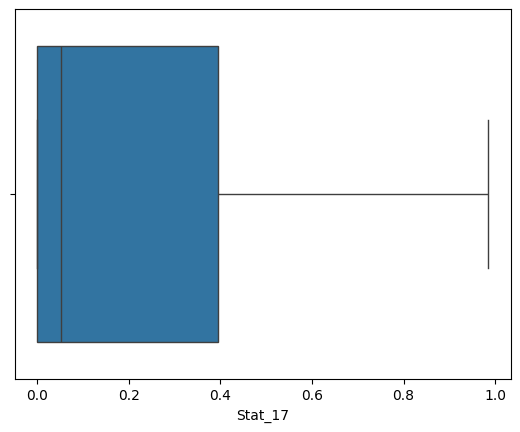

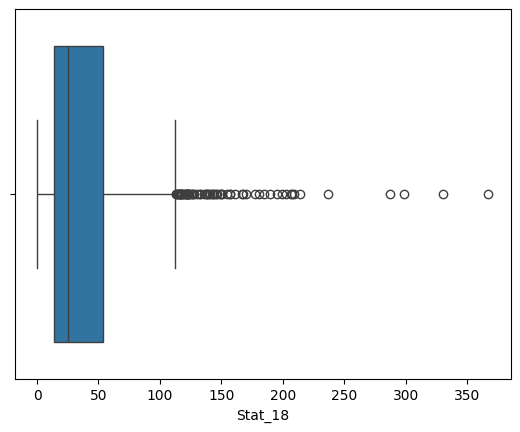

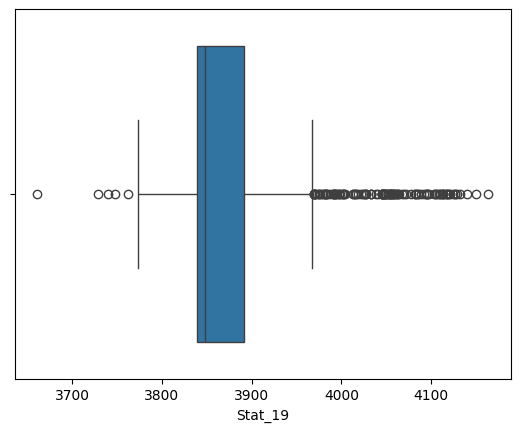

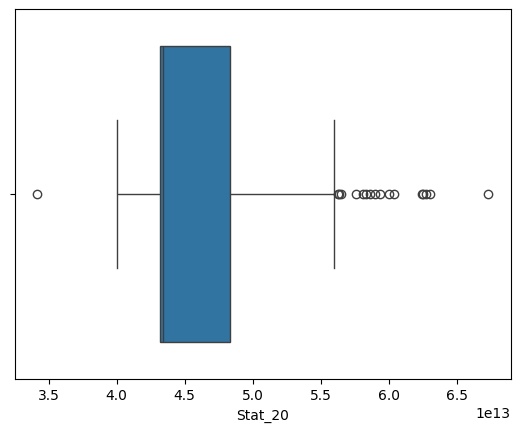

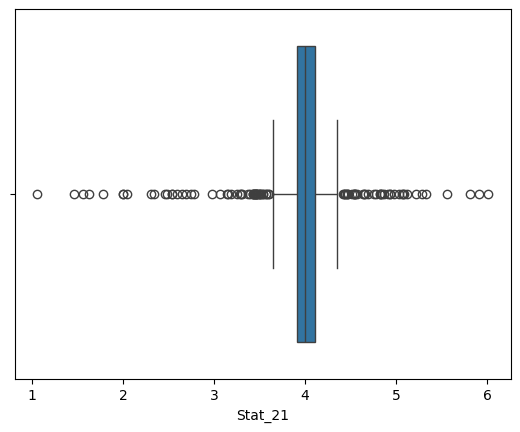

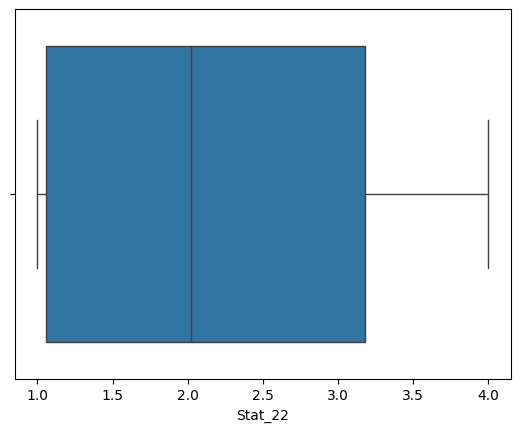

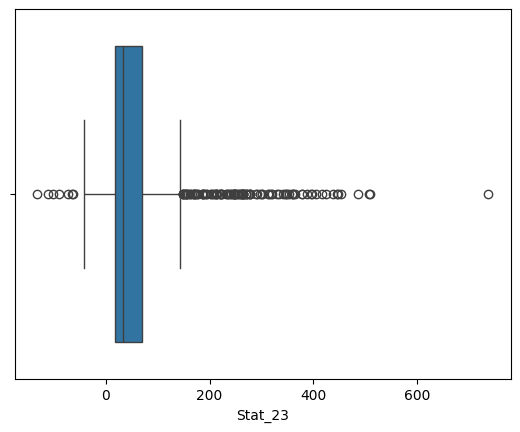

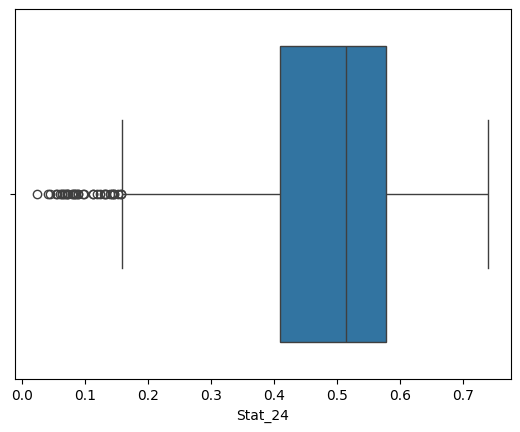

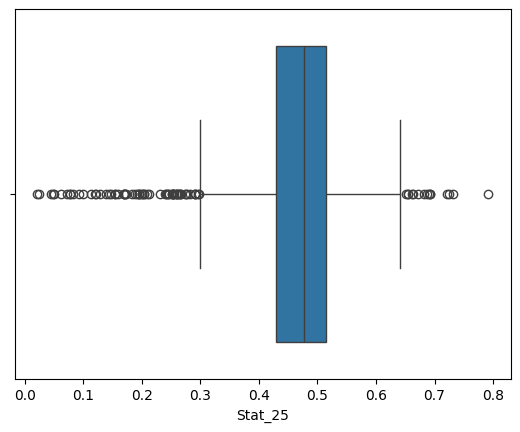

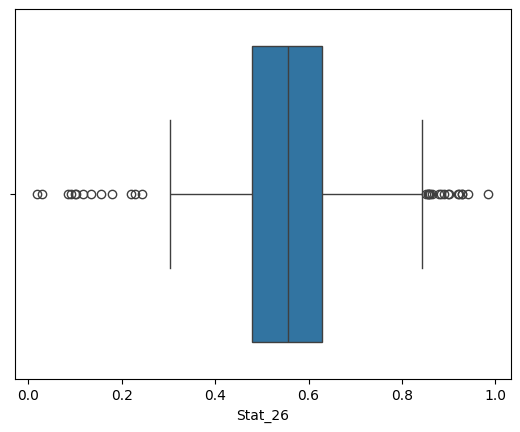

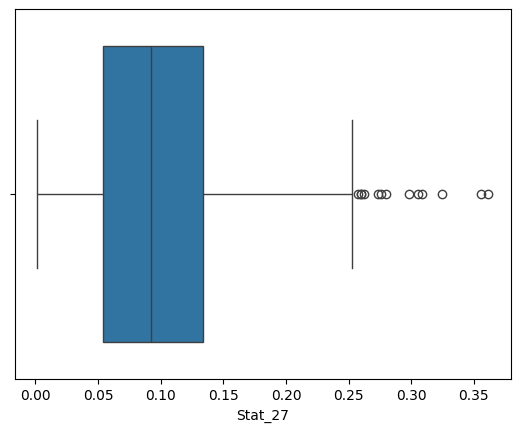

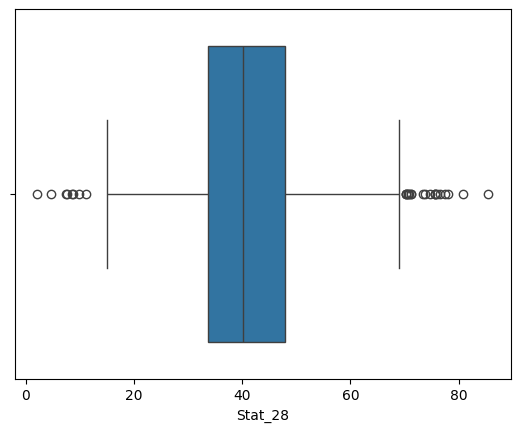

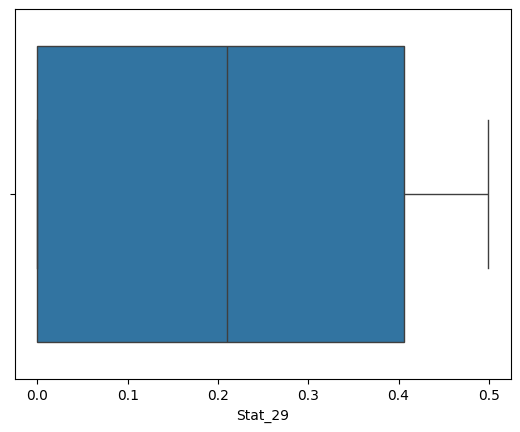

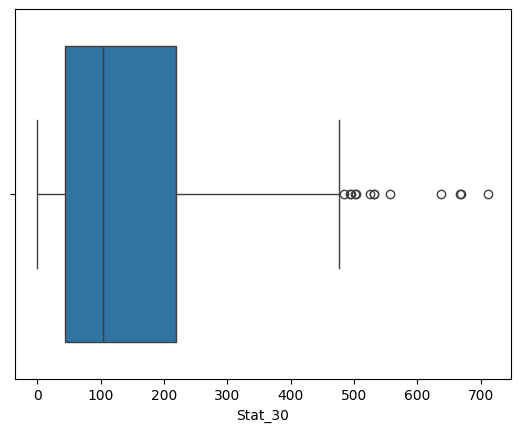

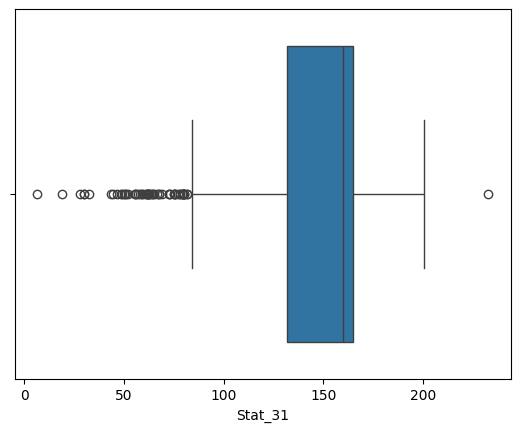

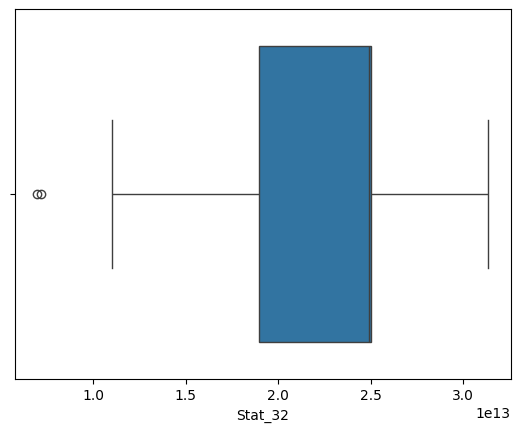

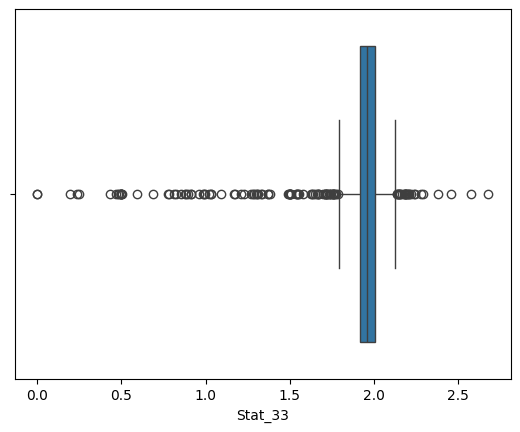

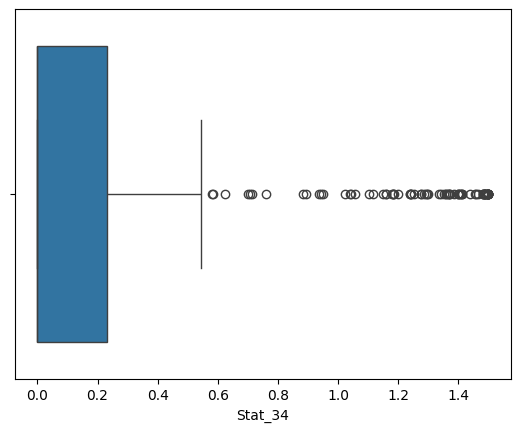

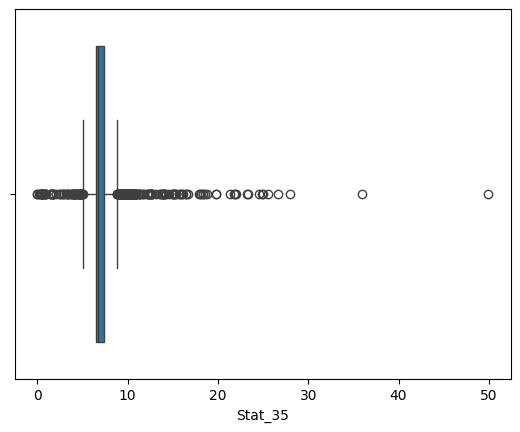

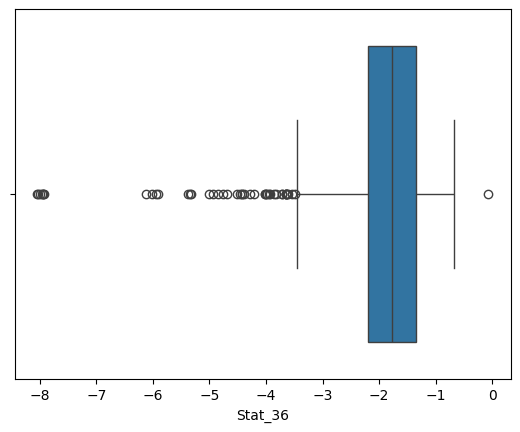

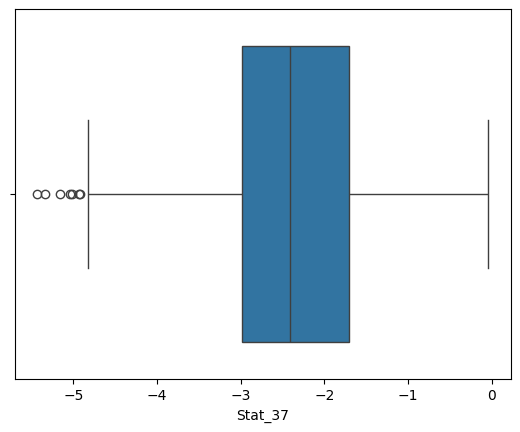

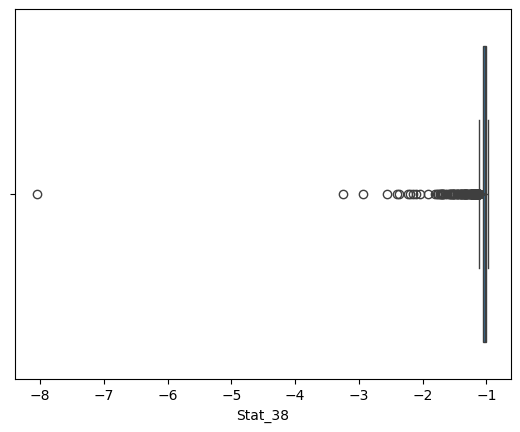

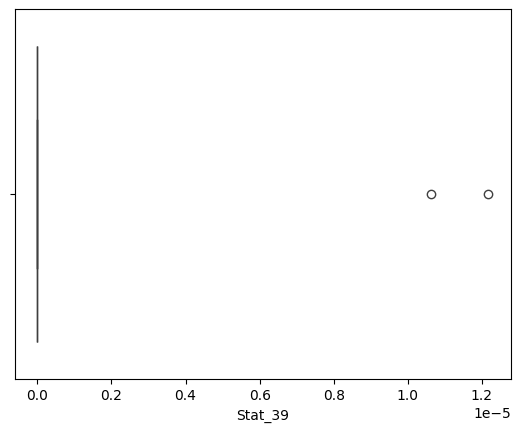

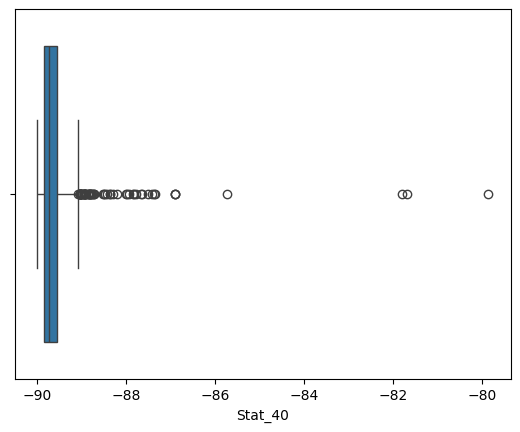

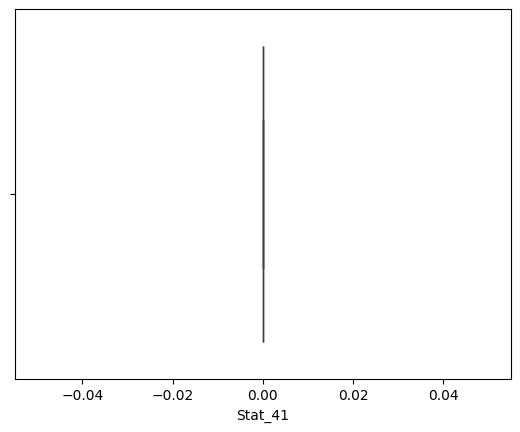

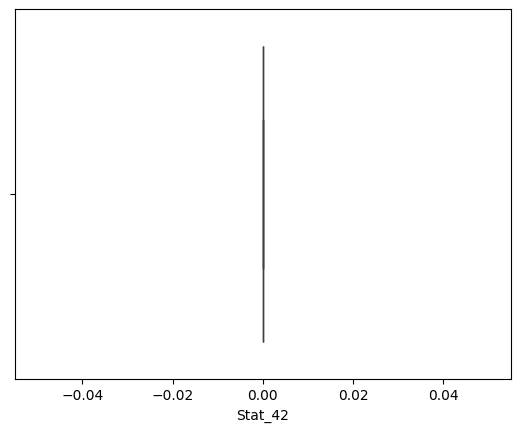

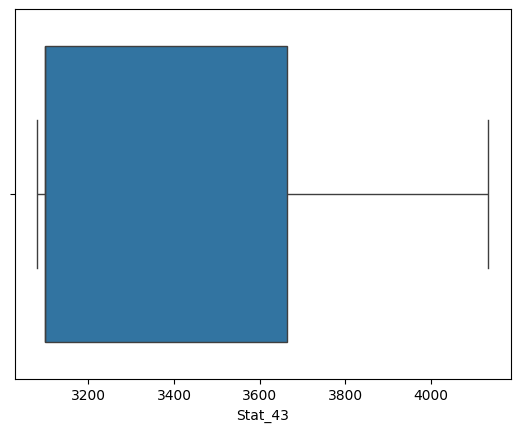

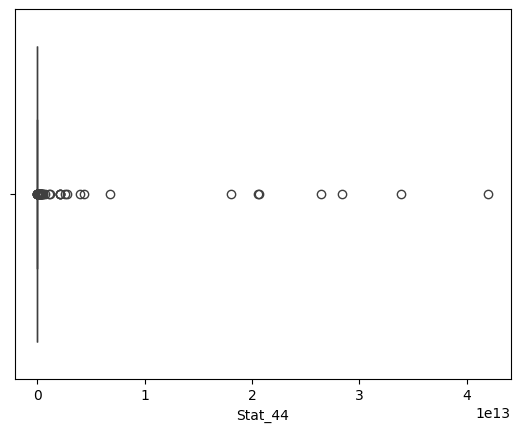

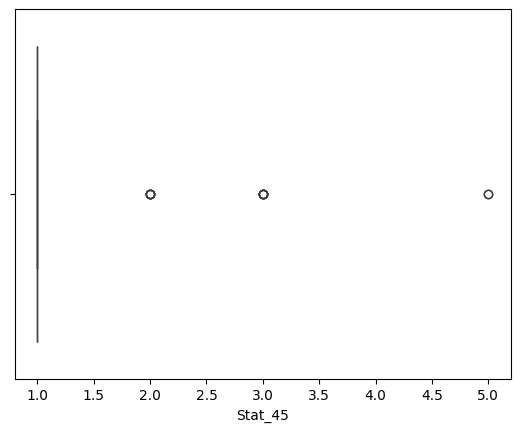

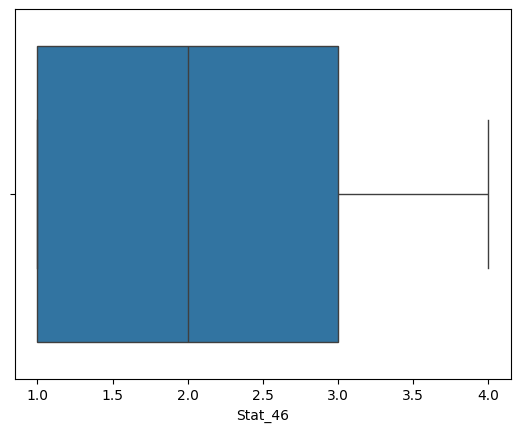

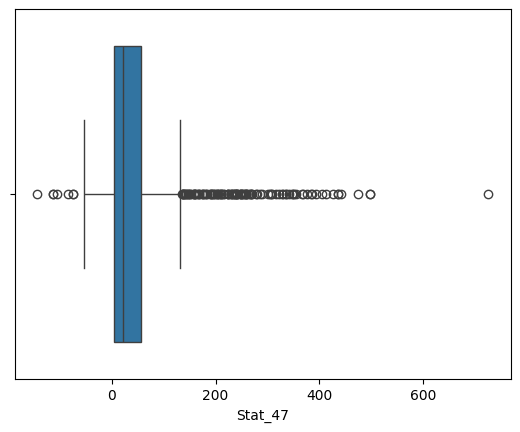

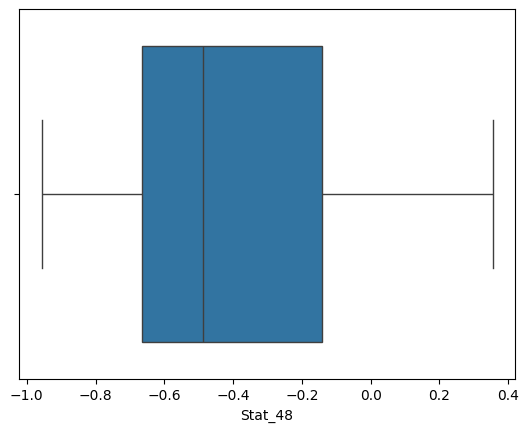

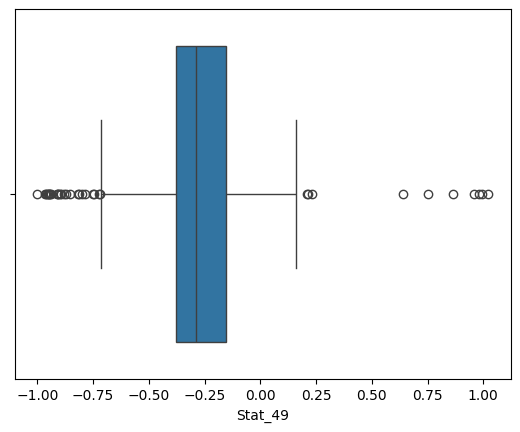

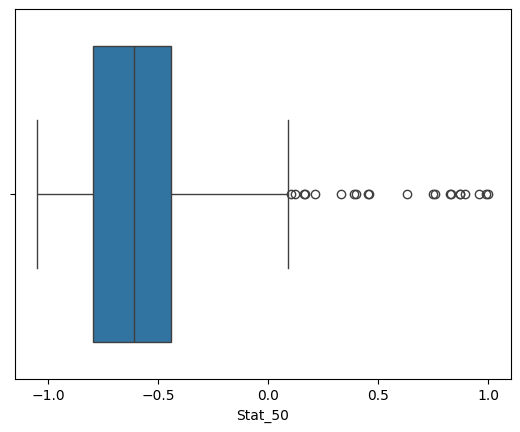

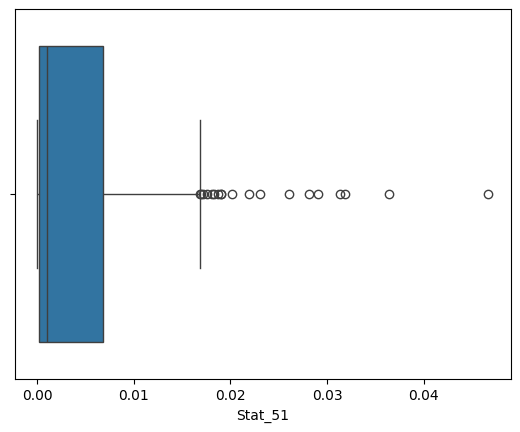

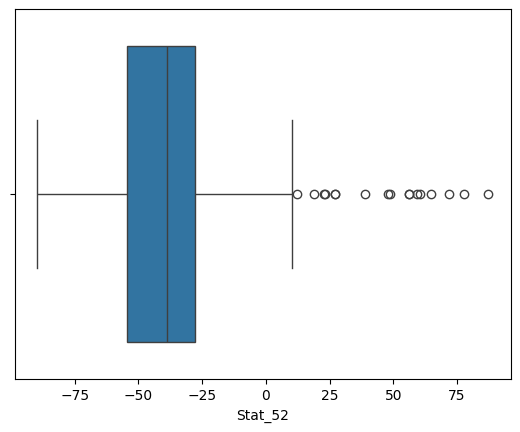

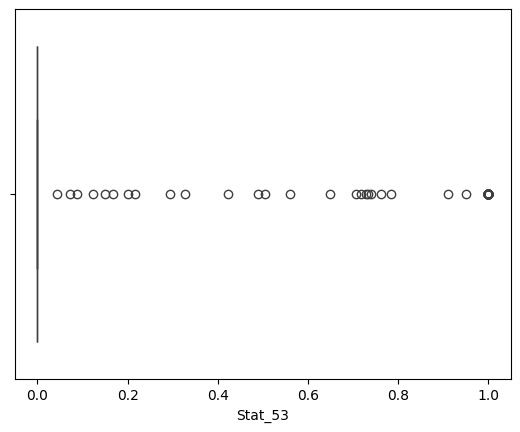

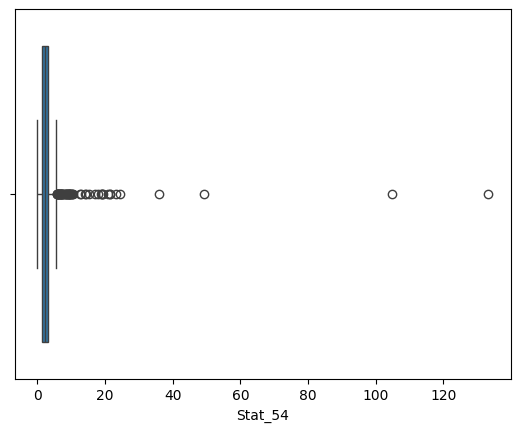

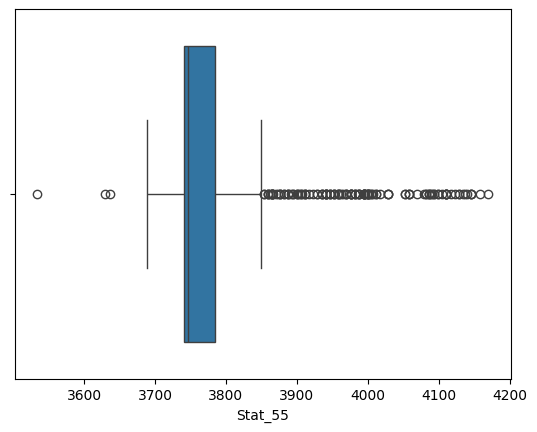

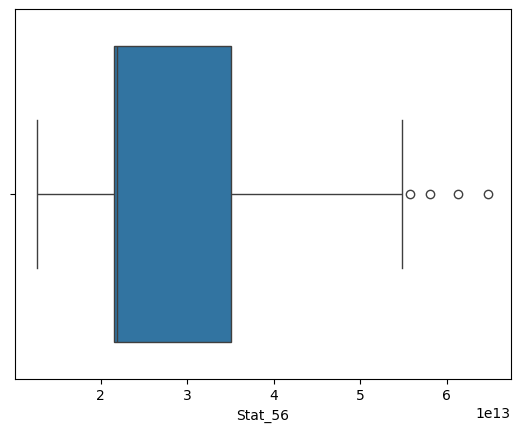

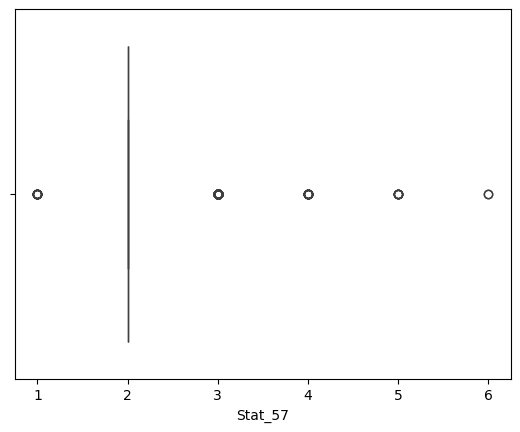

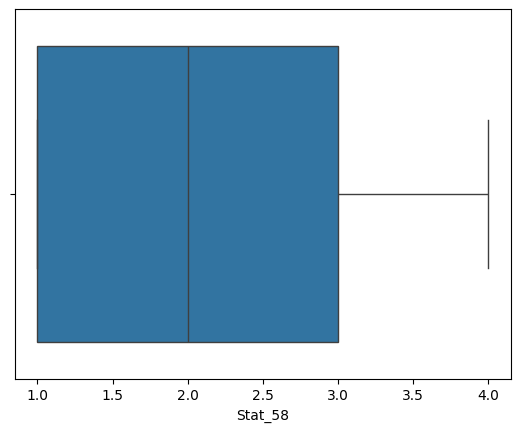

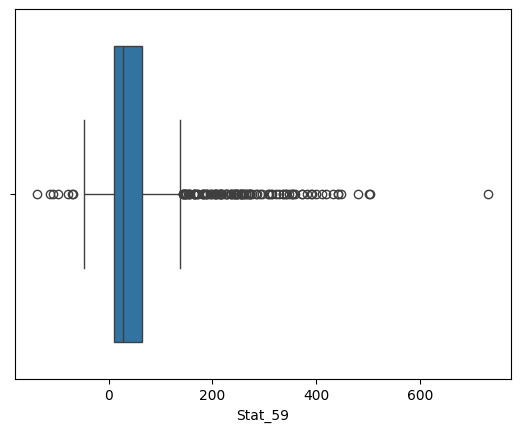

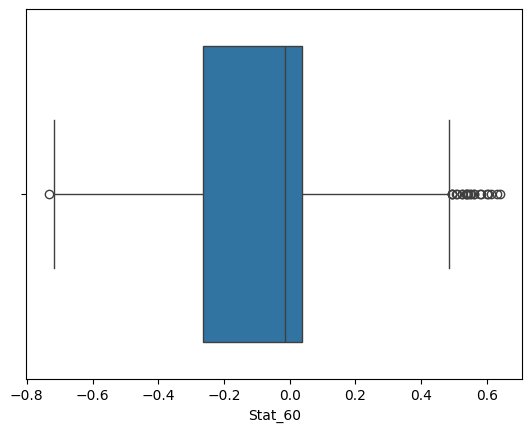

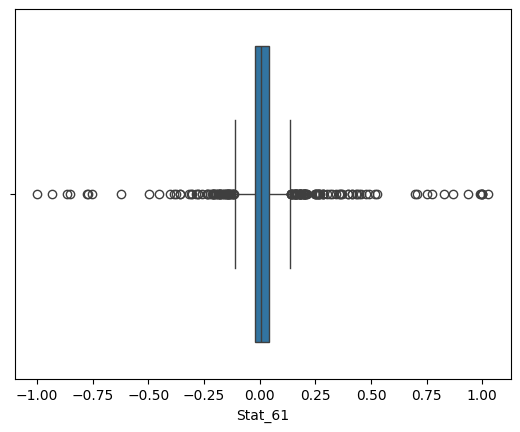

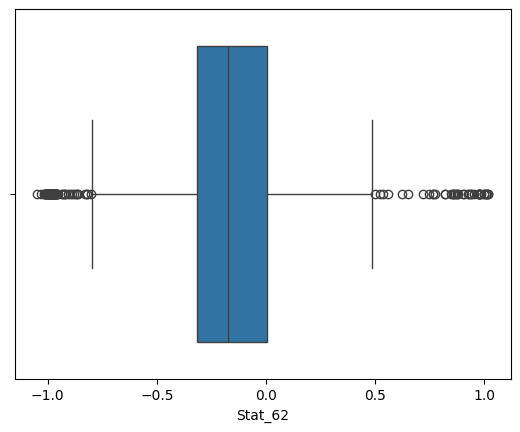

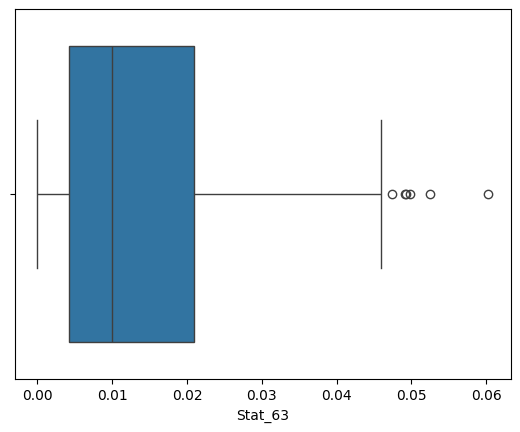

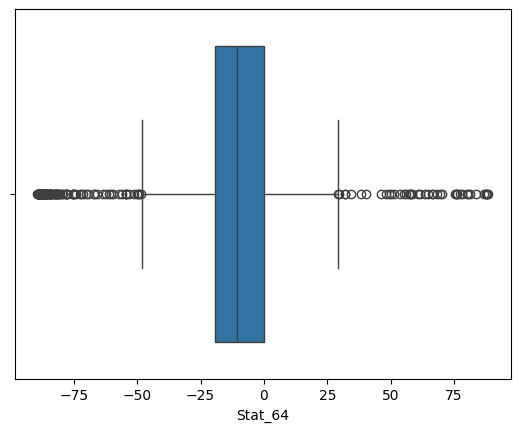

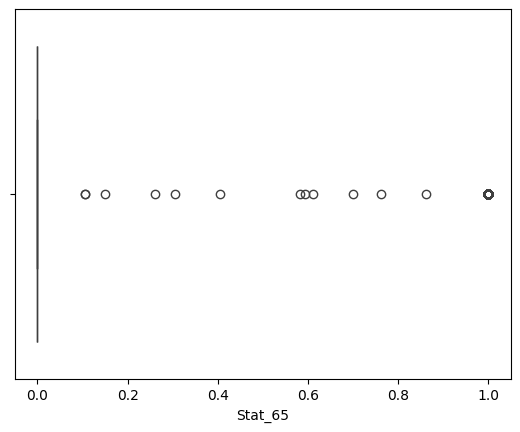

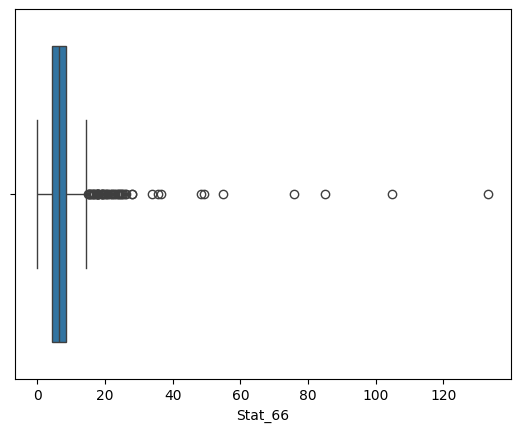

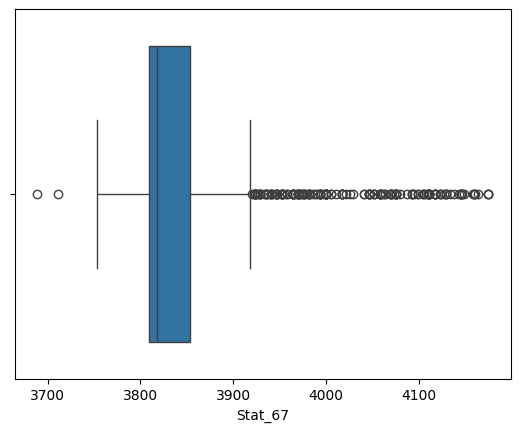

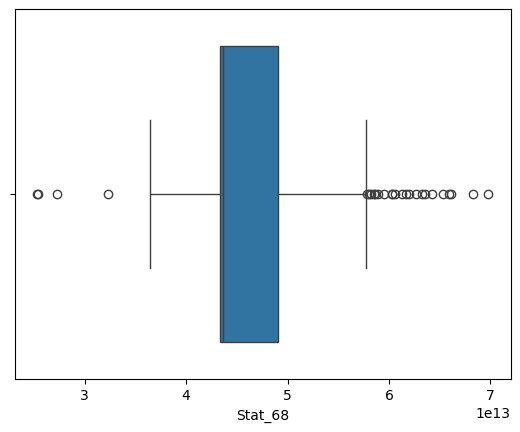

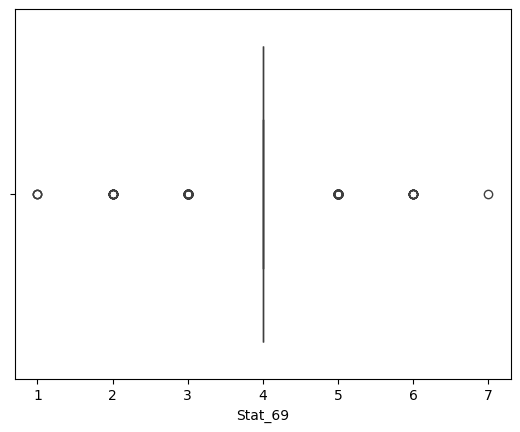

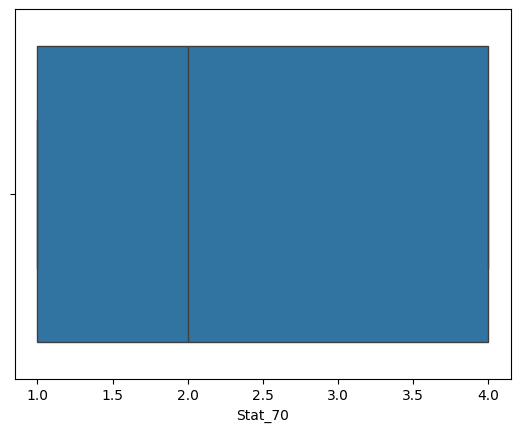

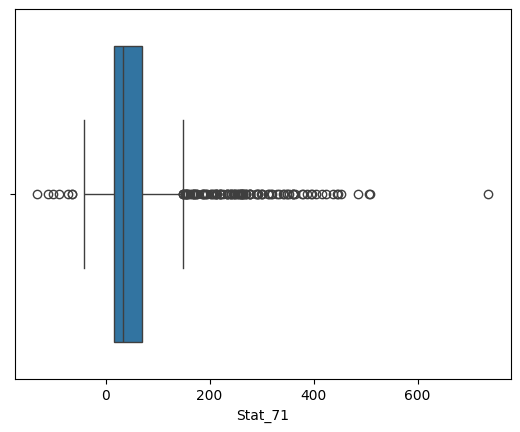

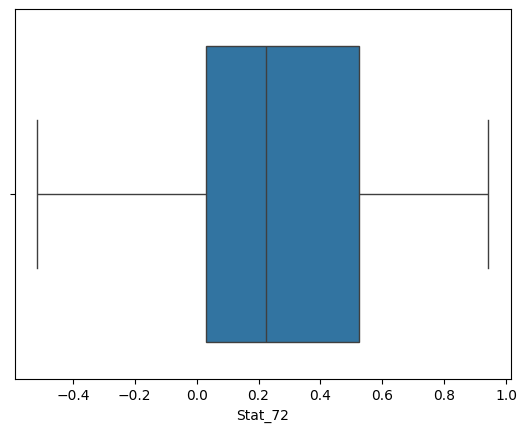

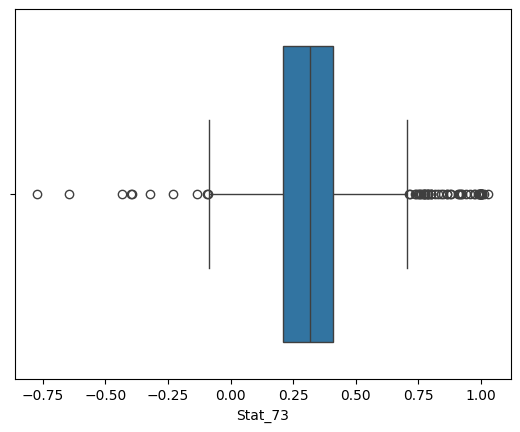

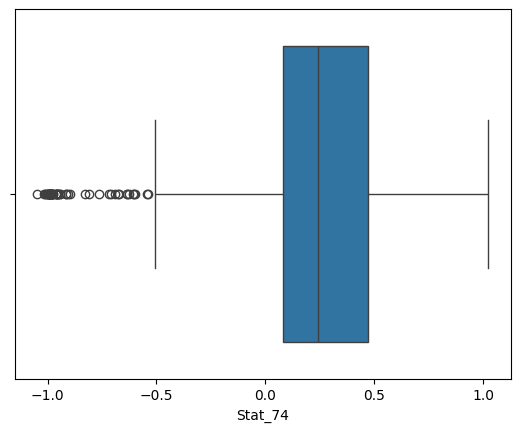

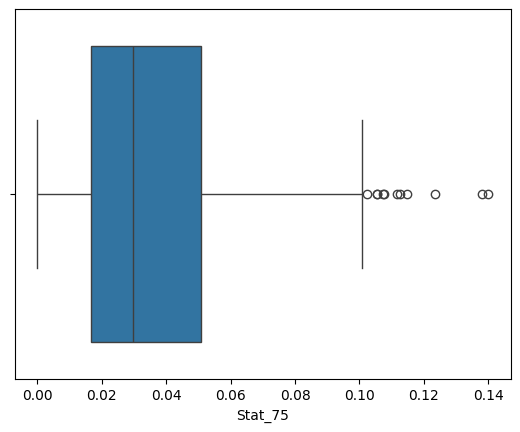

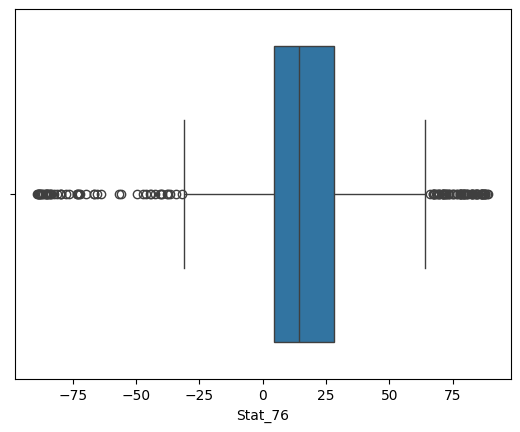

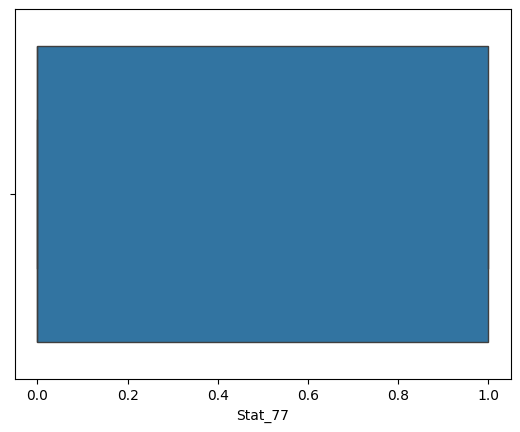

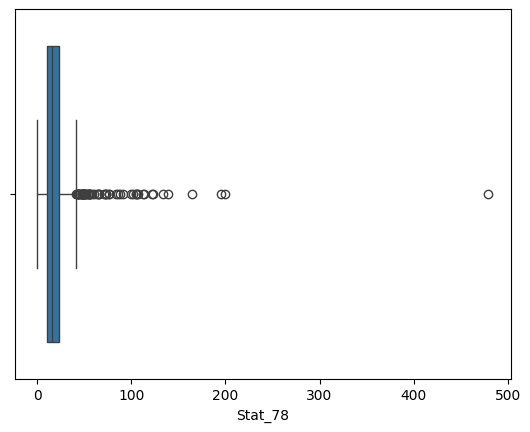

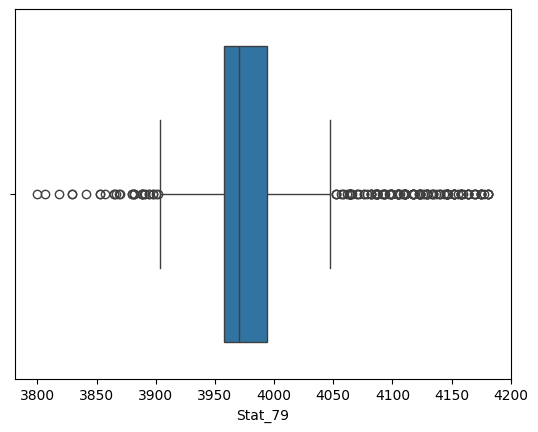

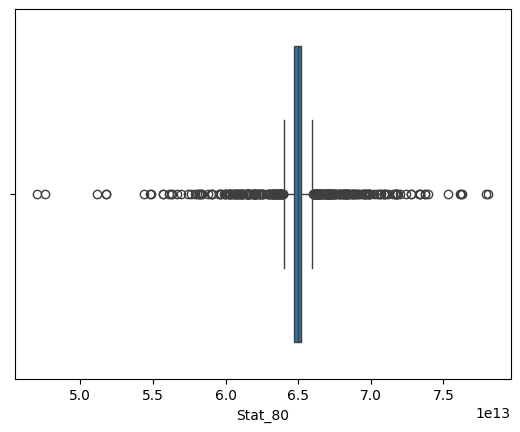

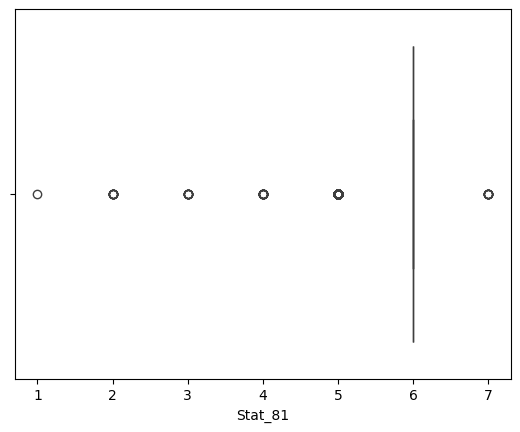

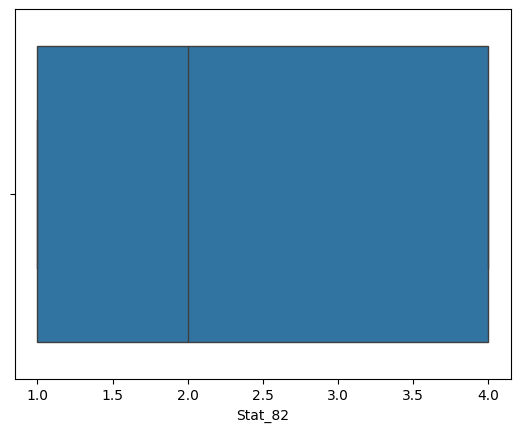

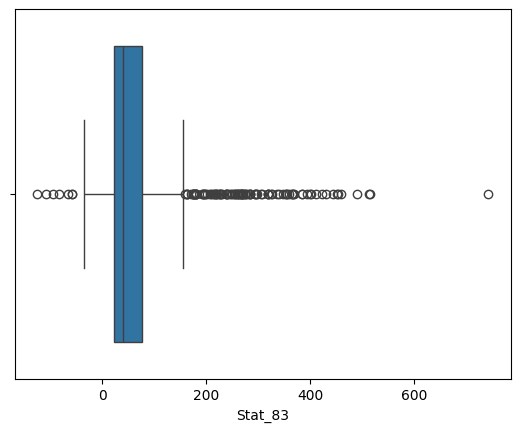

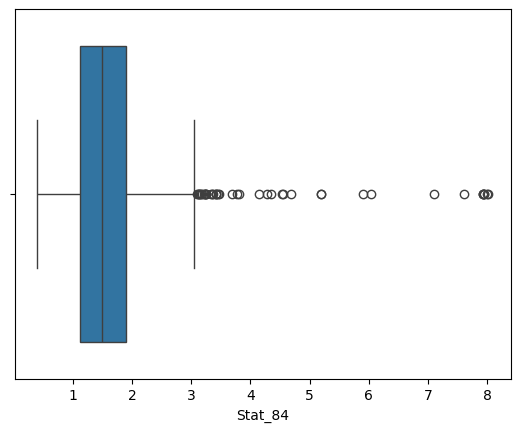

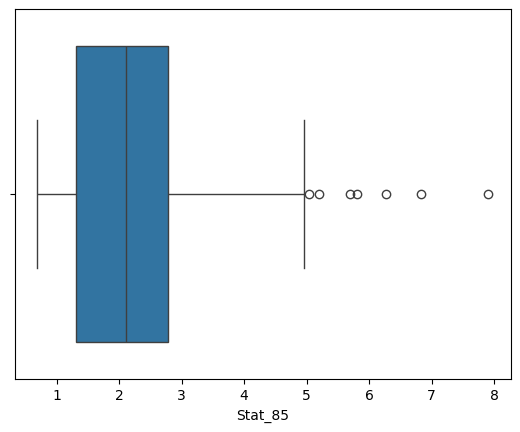

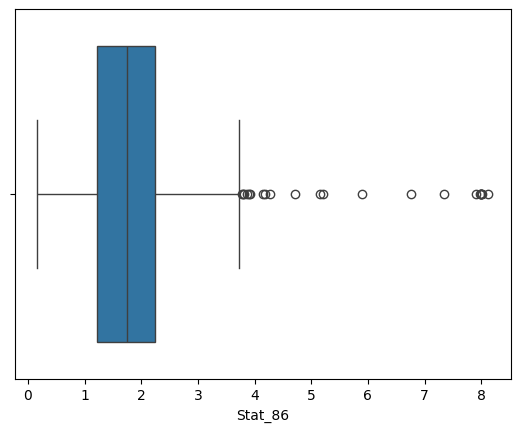

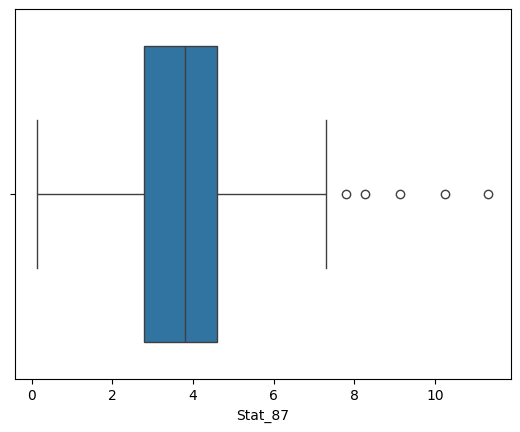

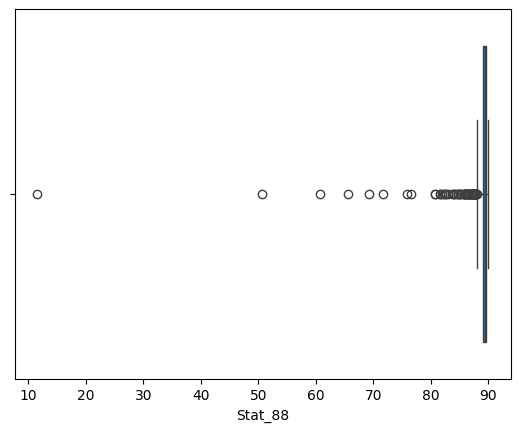

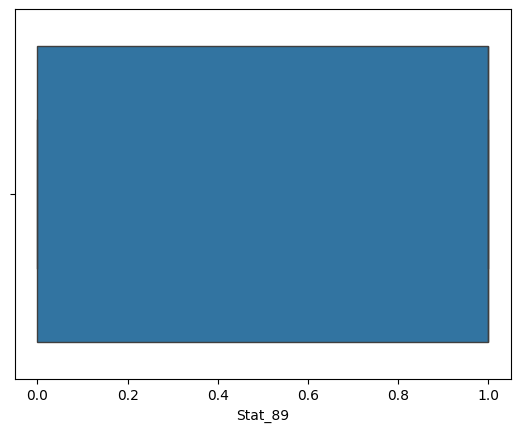

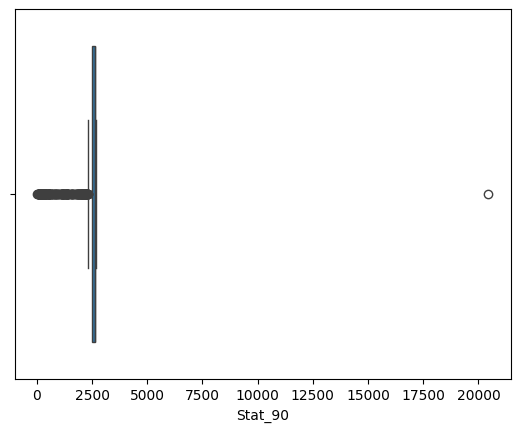

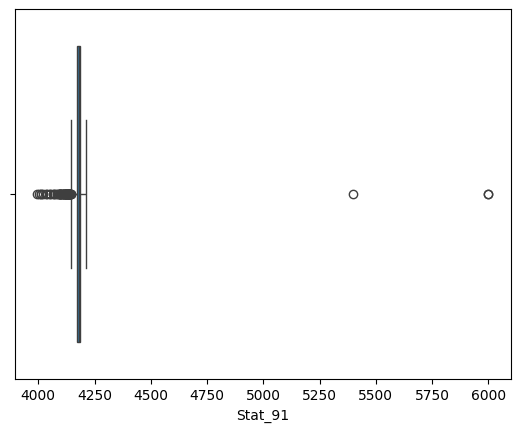

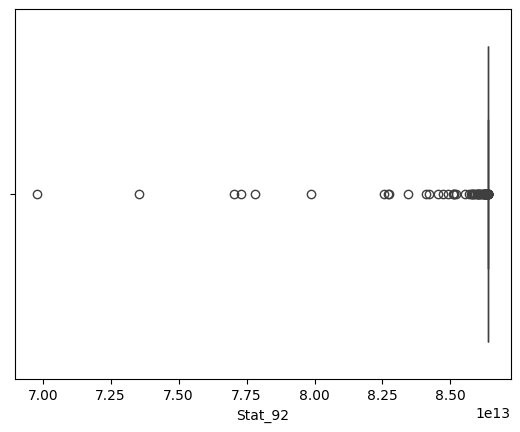

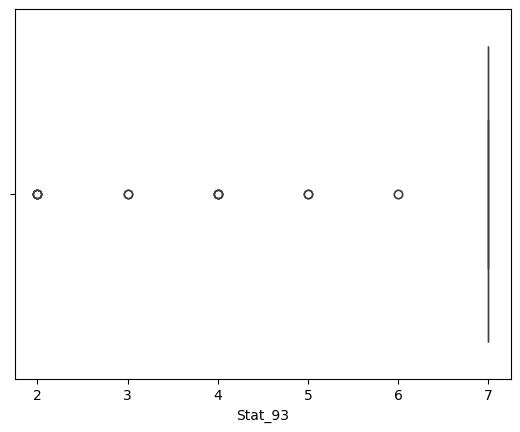

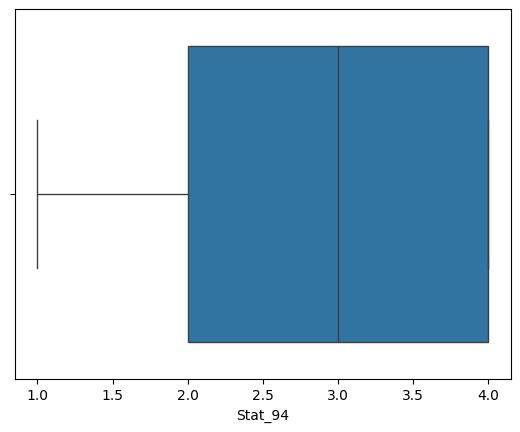

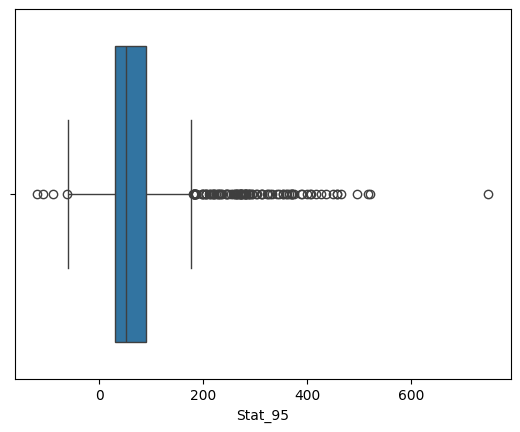

In [ ]:
#Boxplot to identify the outliers
for i in train.select_dtypes(include="number").columns:
    sns.boxplot(data=train,x=i)
    plt.show()

In [ ]:


pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 5000)        # Wider display
pd.set_option('display.max_colwidth', None) # Full column content


In [ ]:
import pandas as pd

# Set maximum rows to display
pd.set_option('display.max_rows', None)

# Set maximum columns to display (if needed)
pd.set_option('display.max_columns', None)


In [ ]:
#ScatterPlot analysis
x=[]
for i in train.select_dtypes(include="number").columns:
  if(i!='sii'):
    x.append(i)



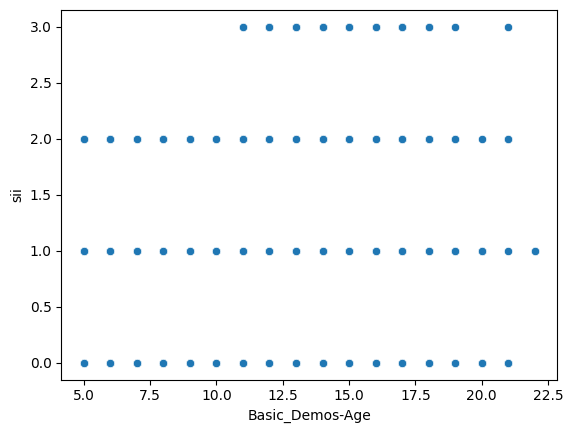

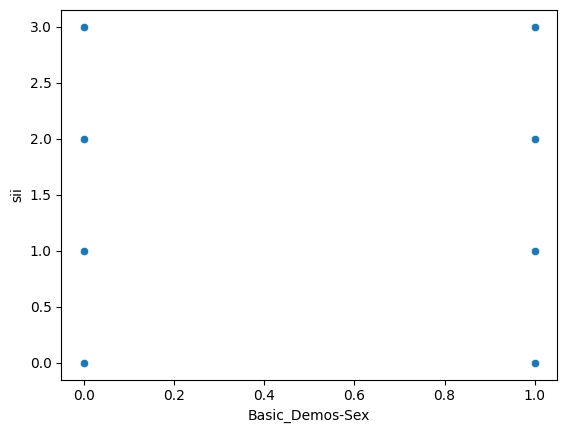

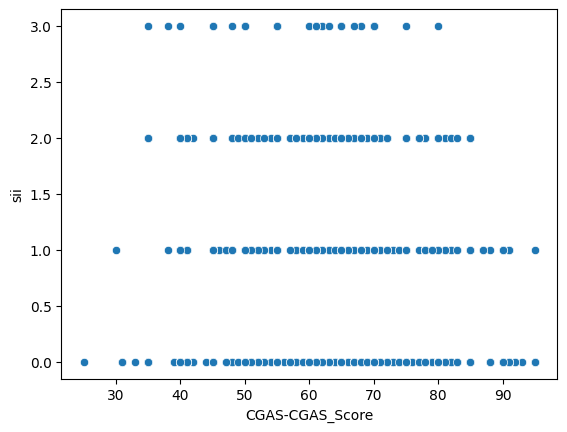

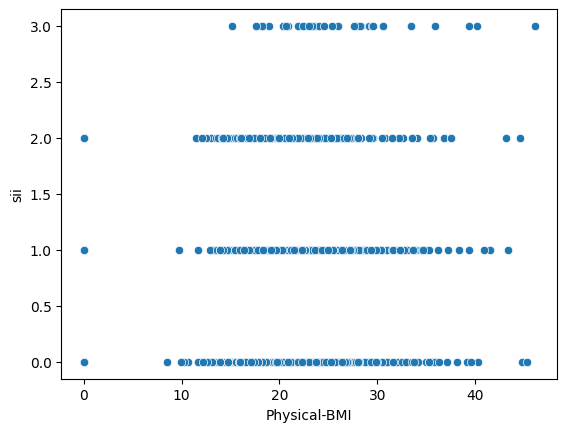

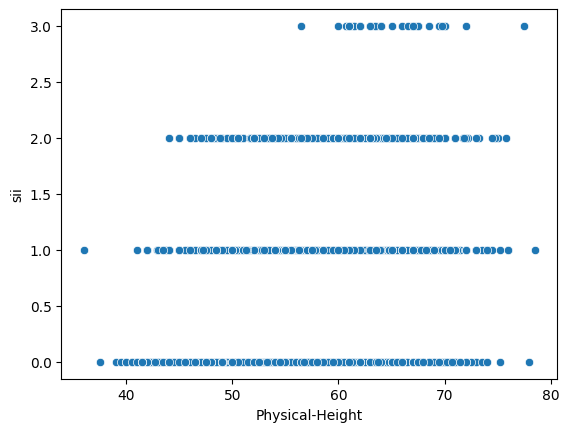

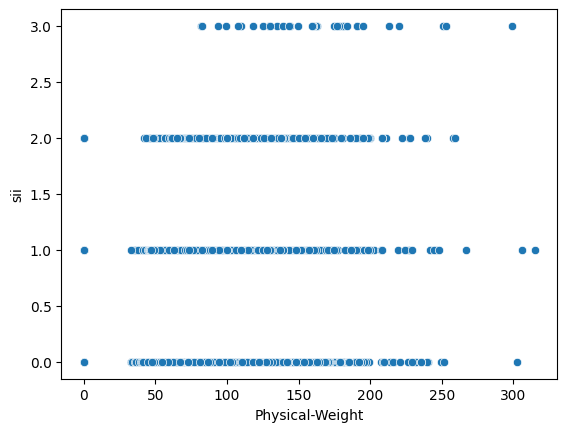

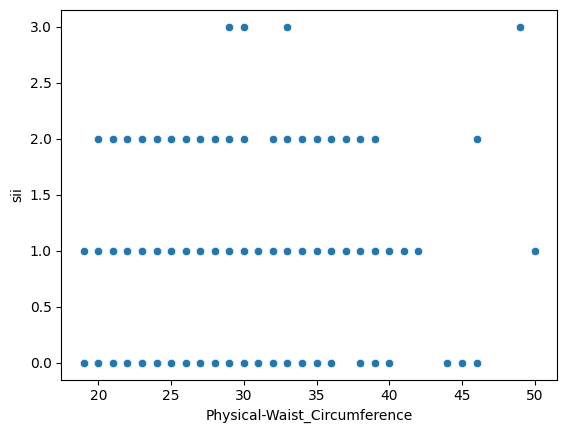

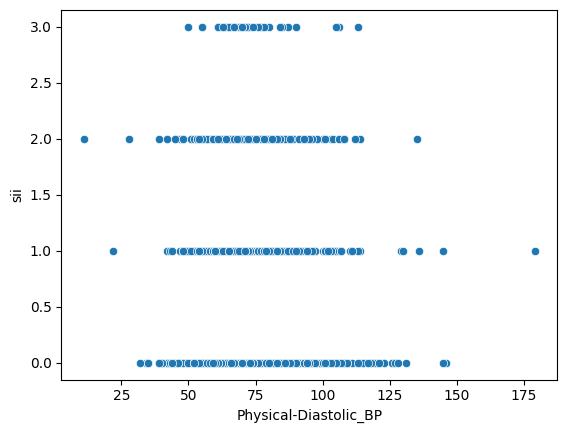

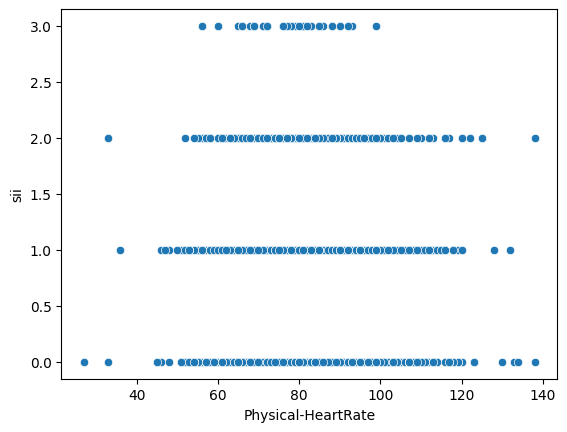

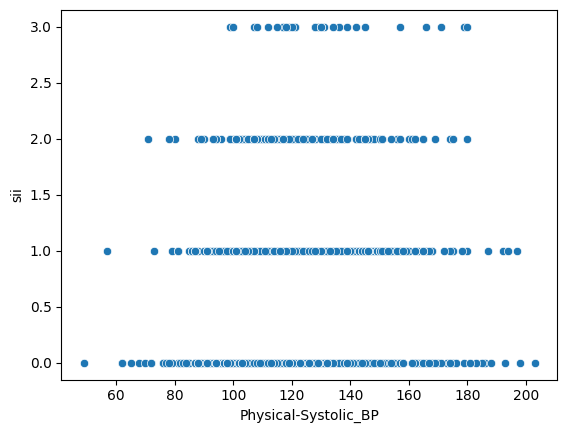

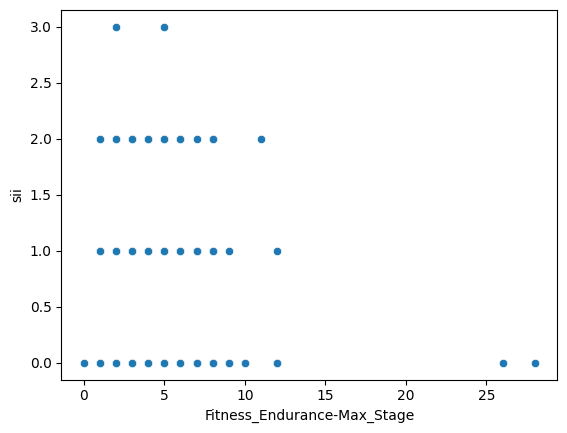

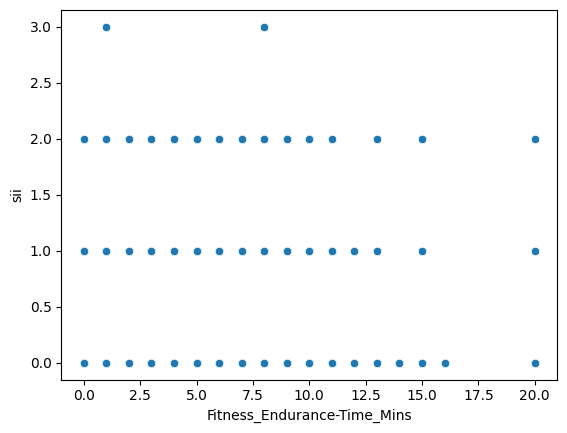

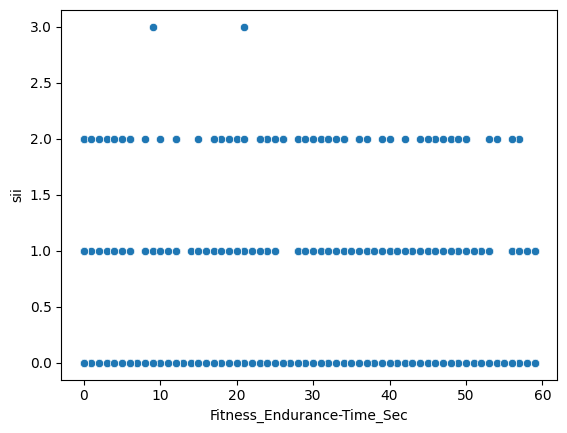

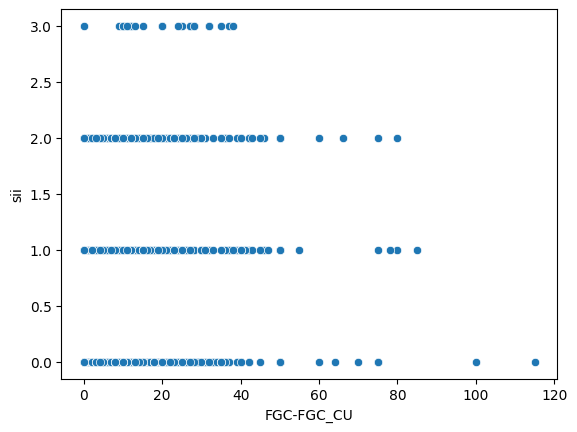

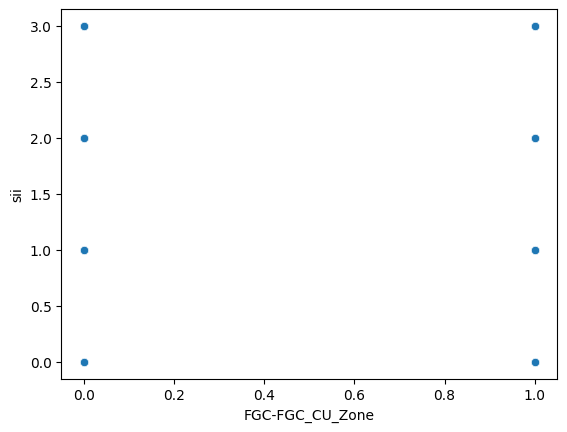

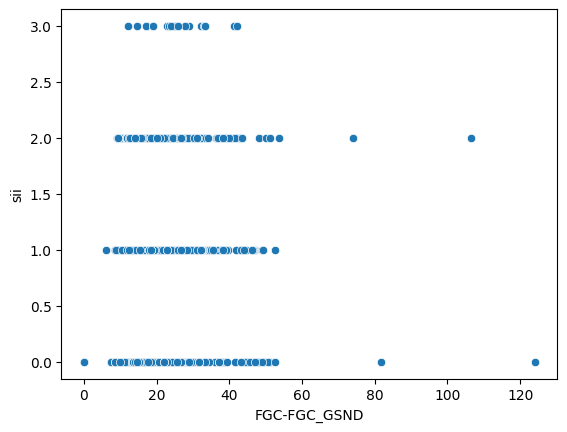

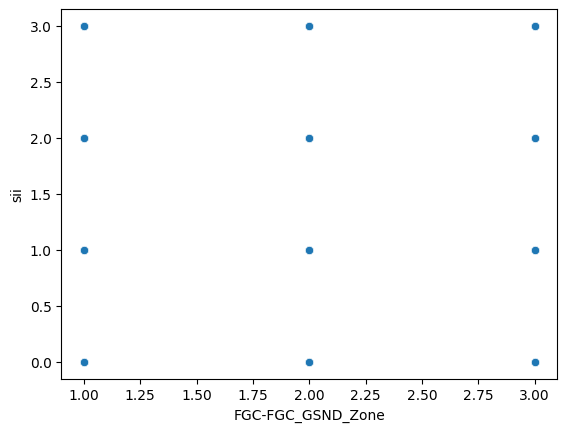

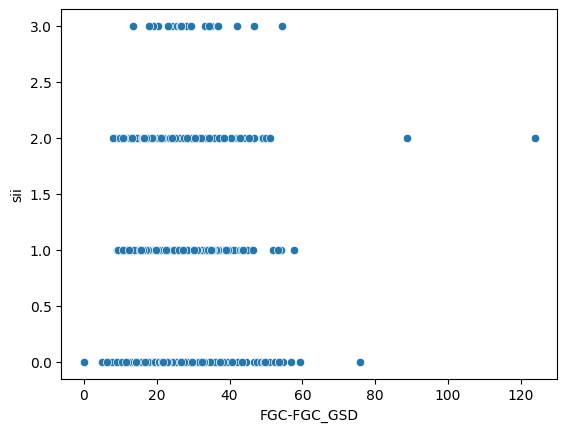

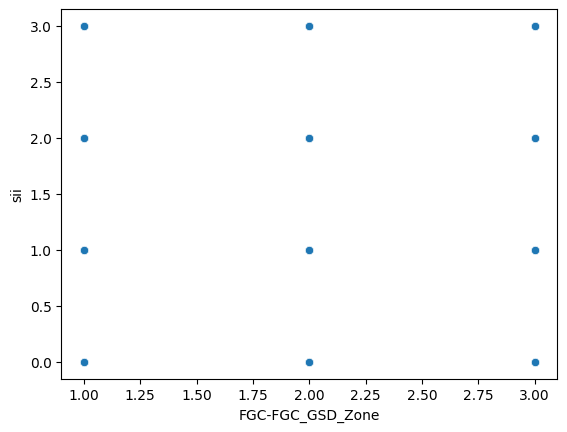

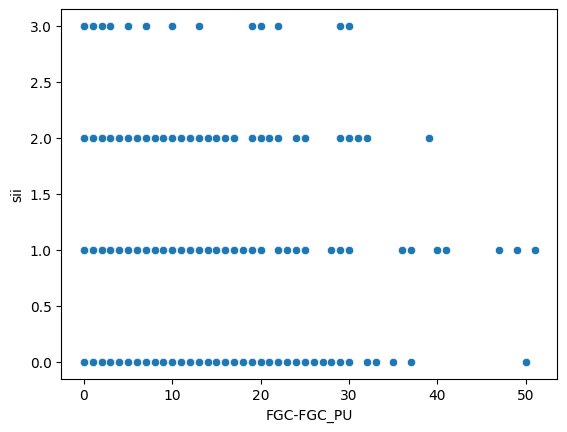

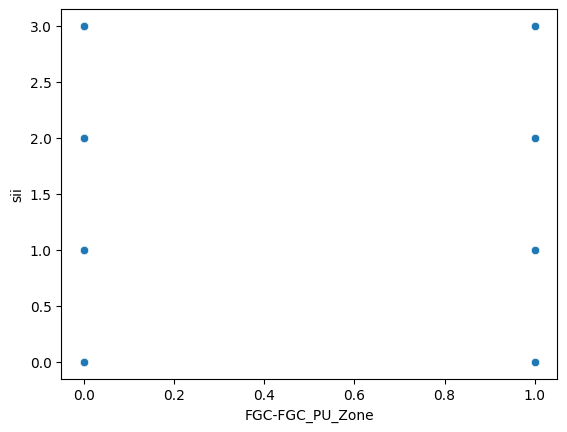

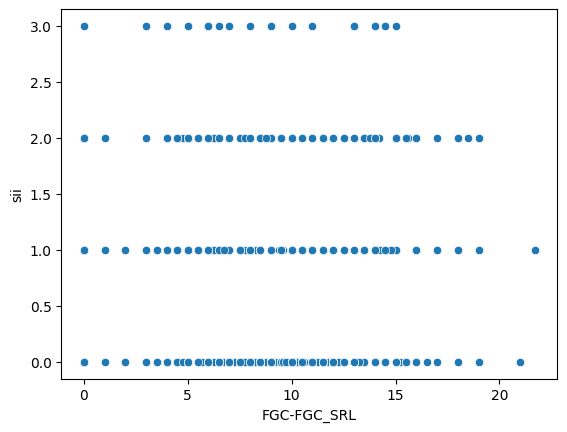

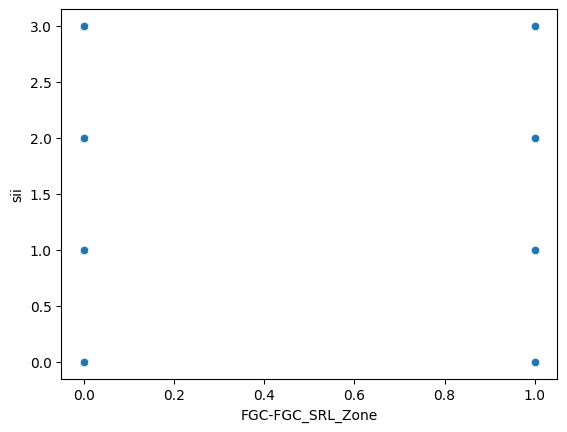

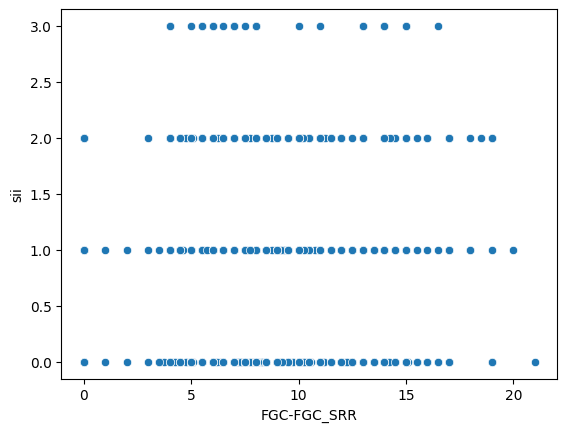

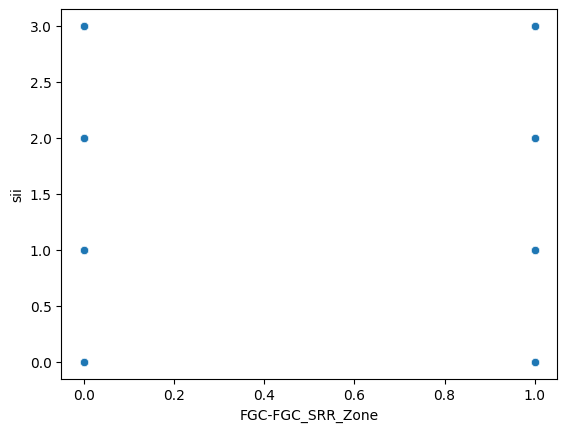

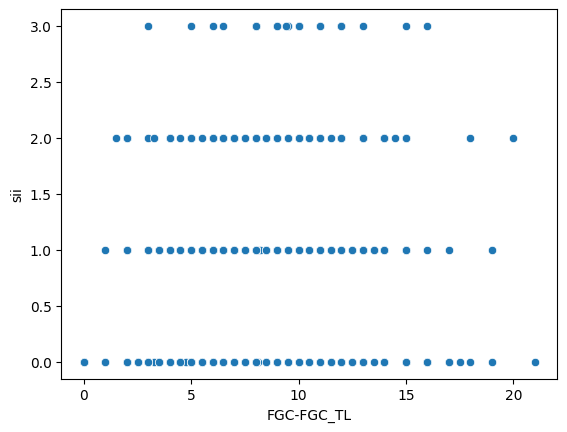

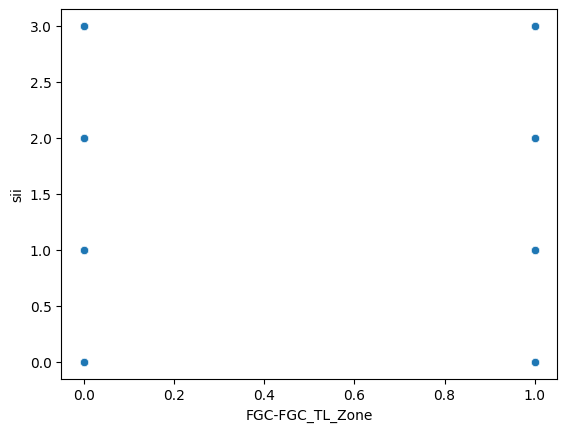

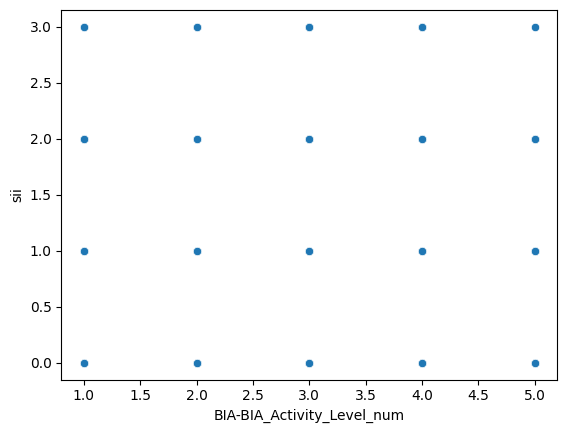

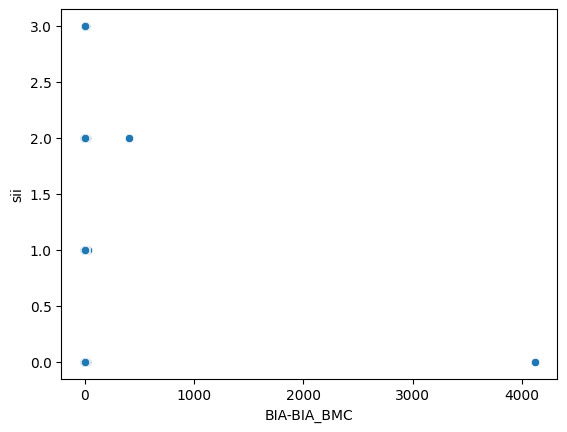

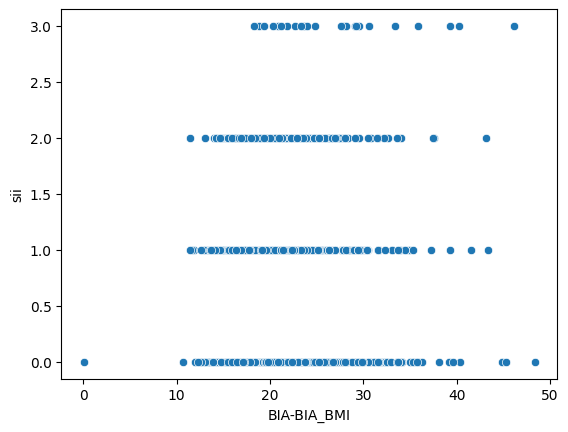

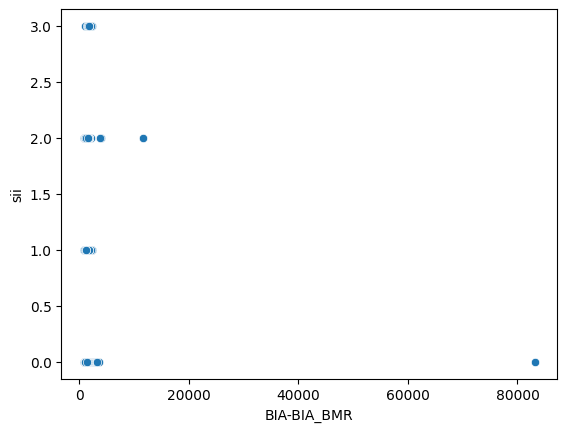

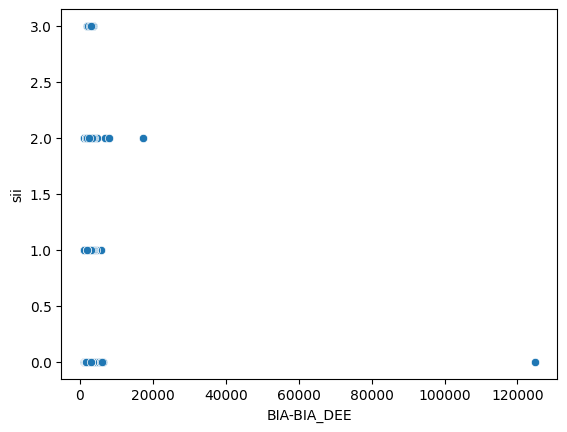

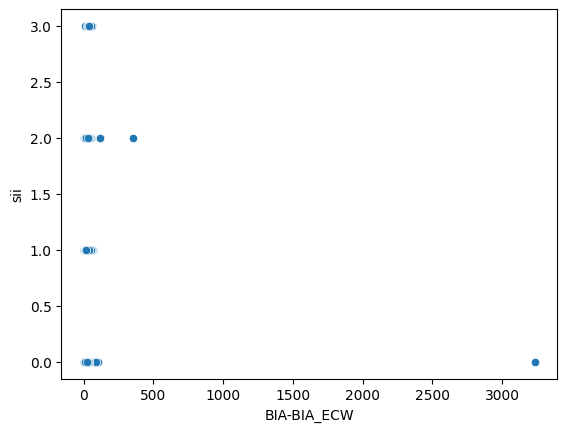

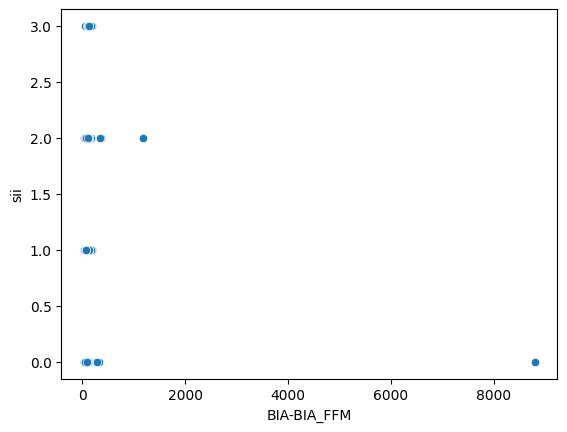

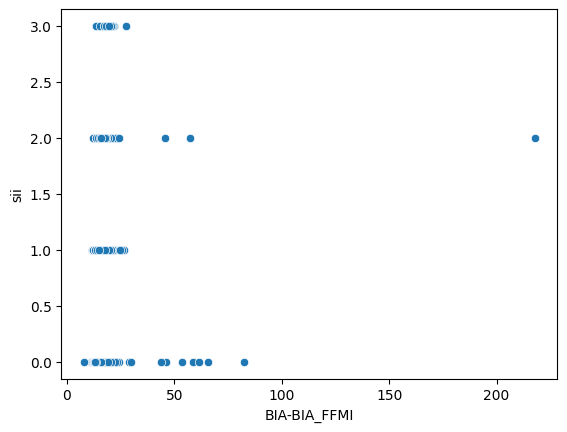

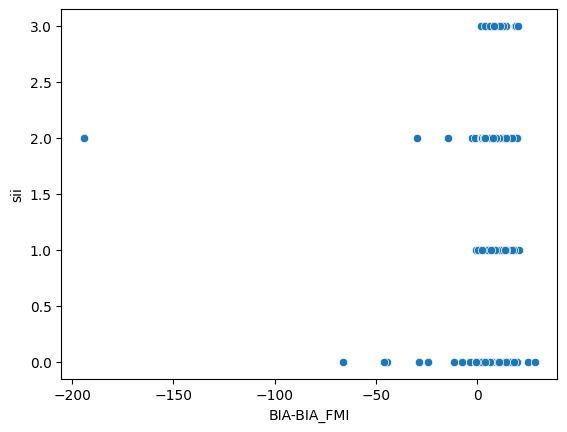

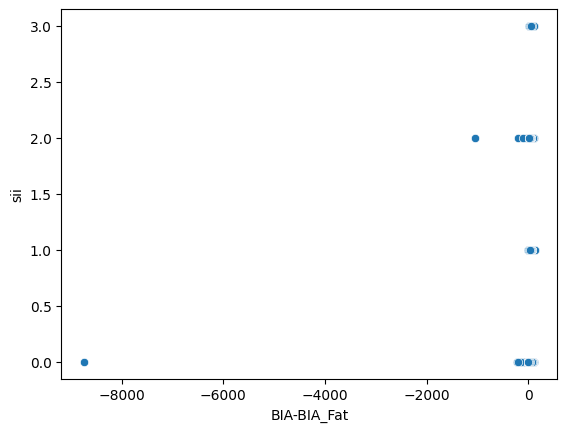

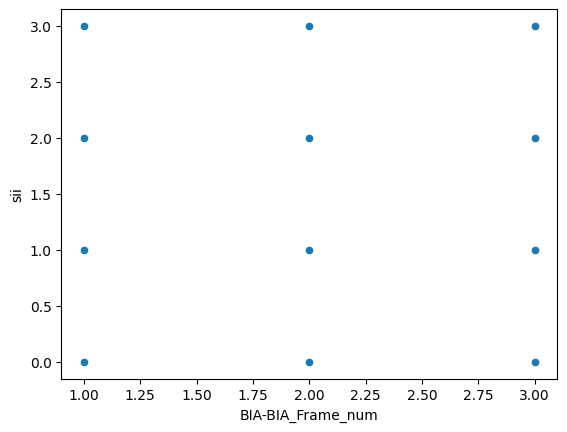

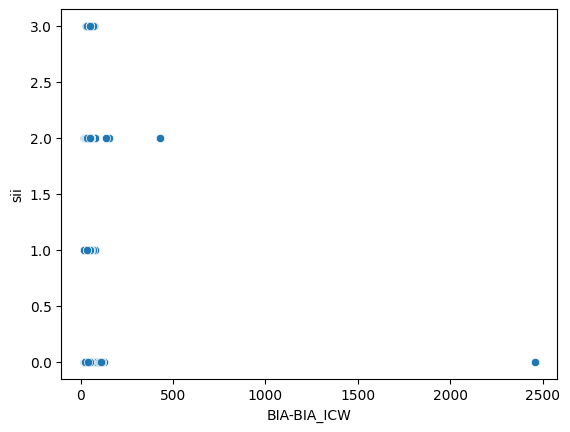

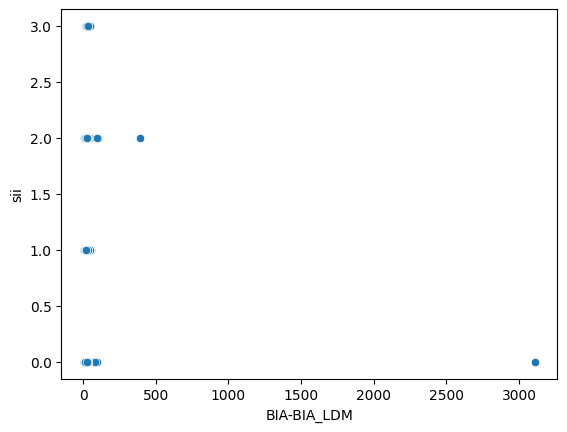

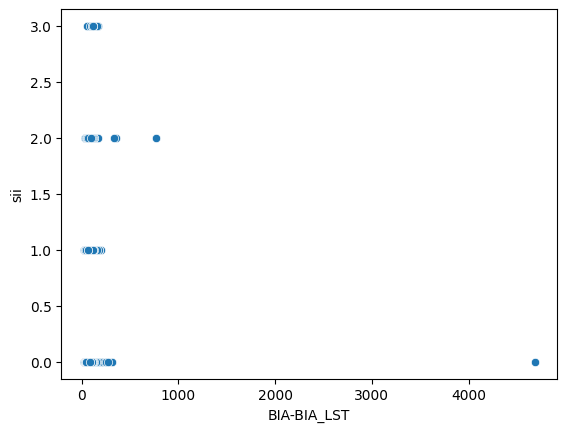

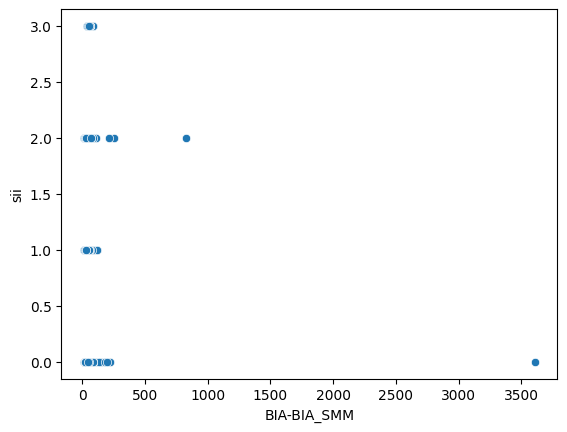

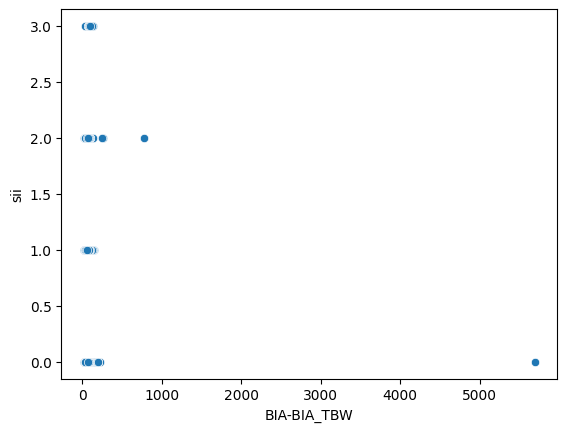

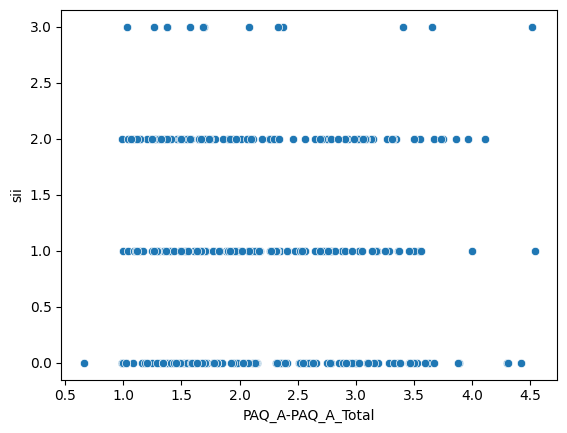

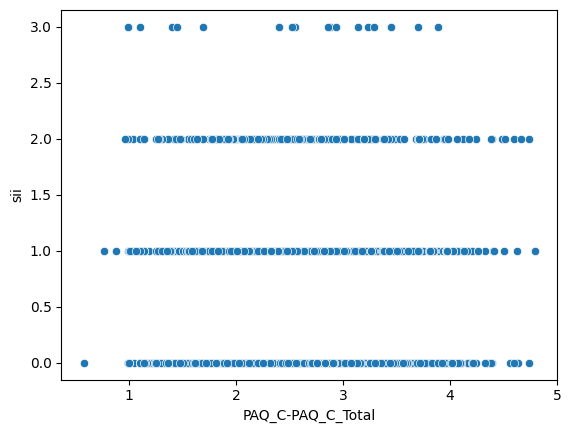

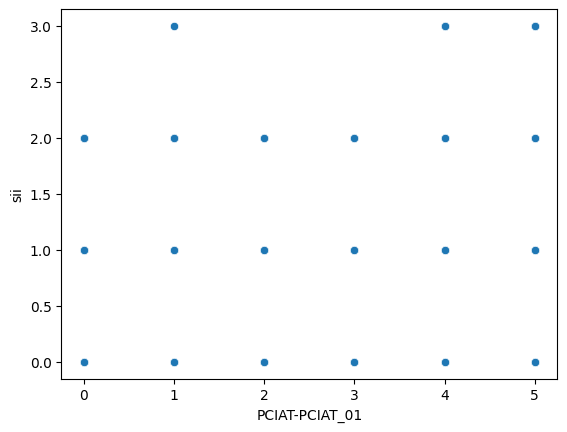

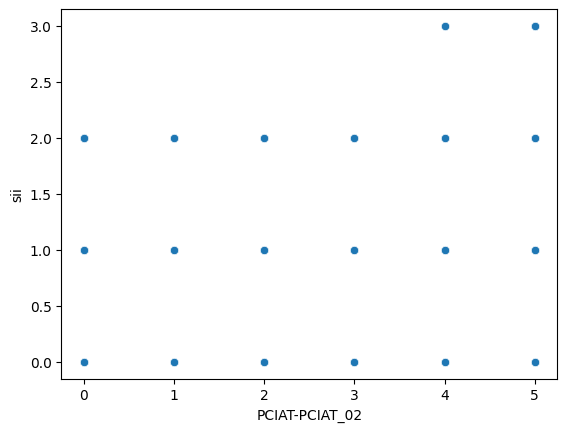

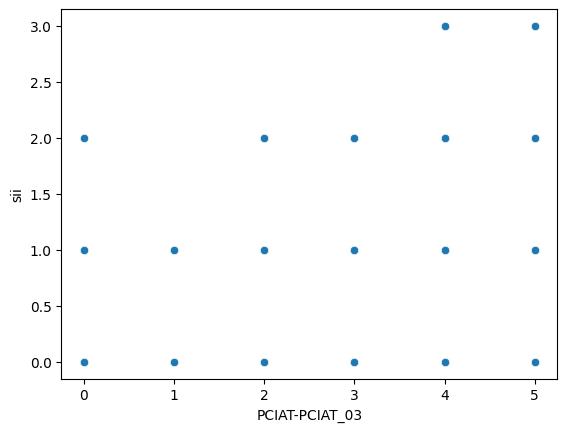

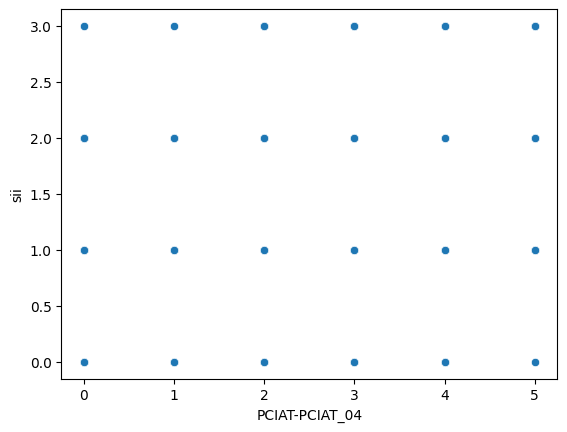

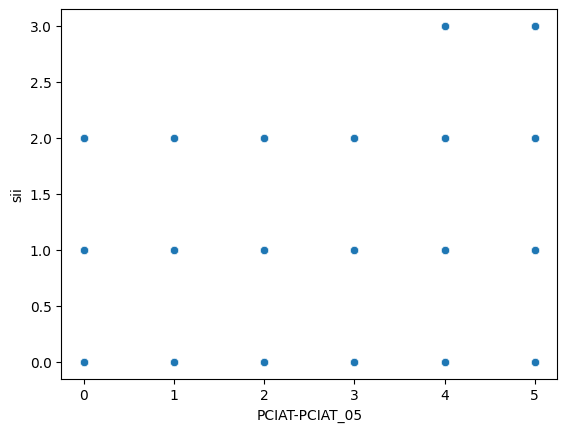

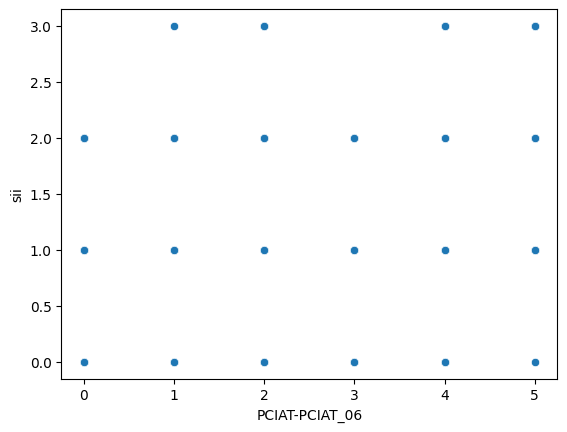

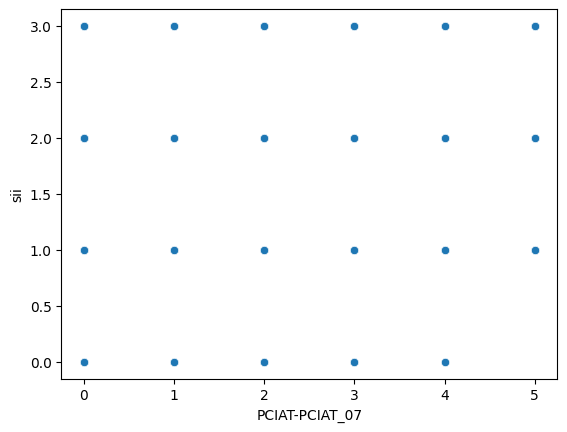

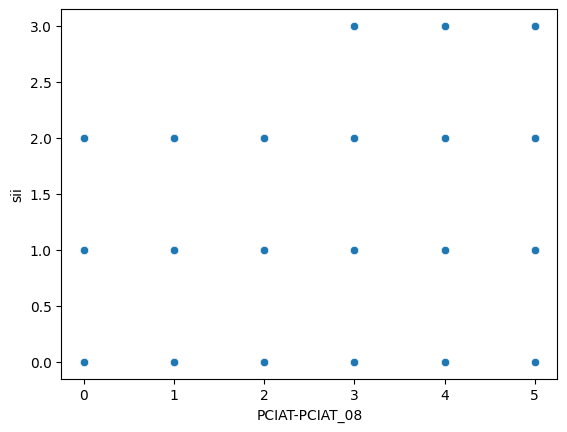

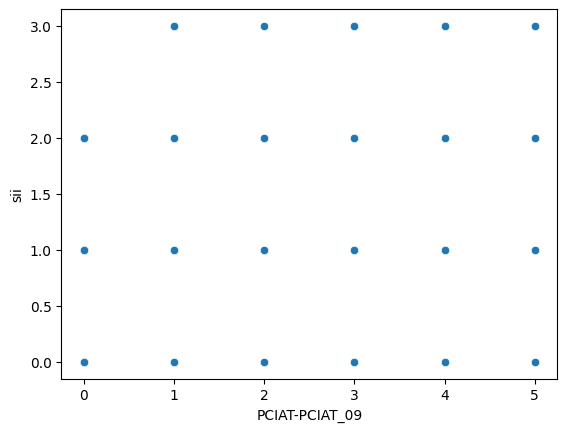

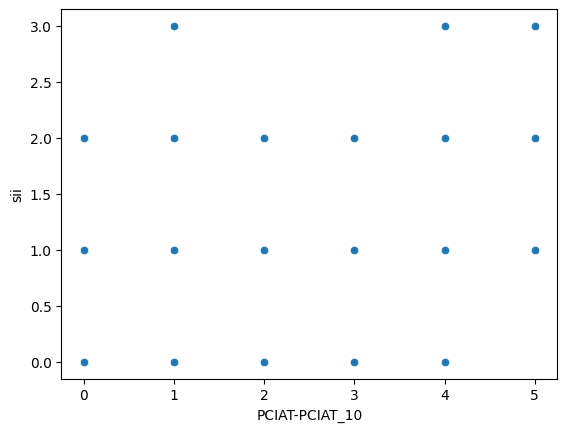

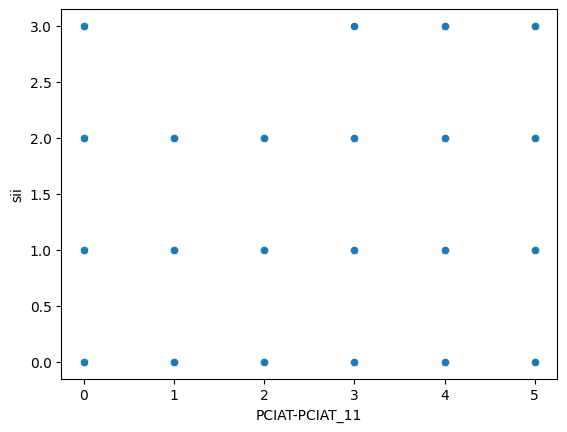

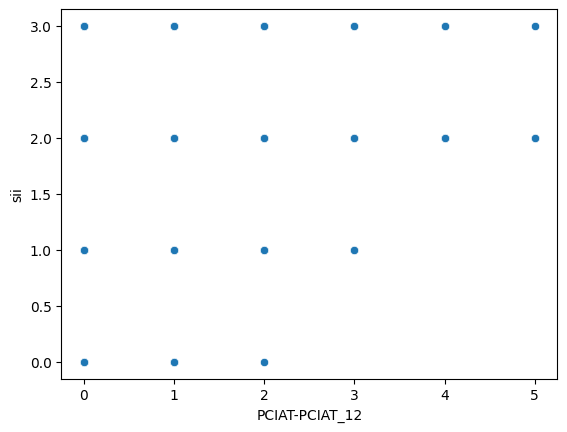

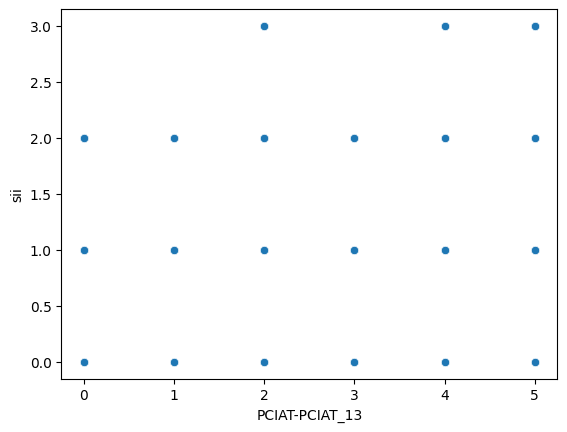

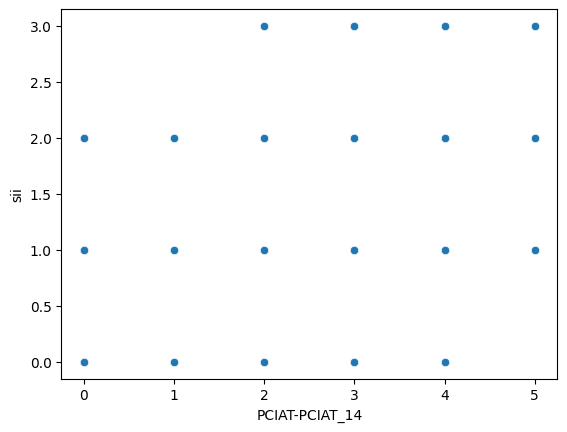

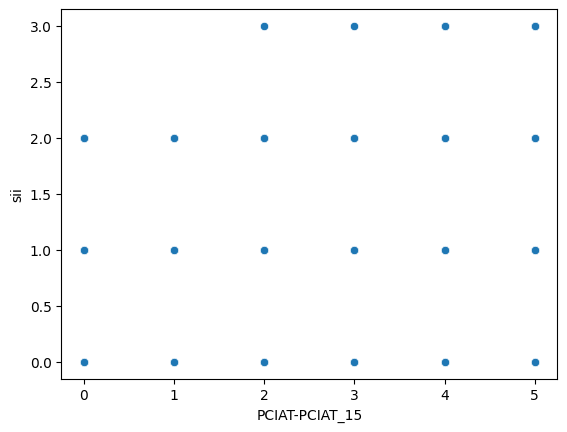

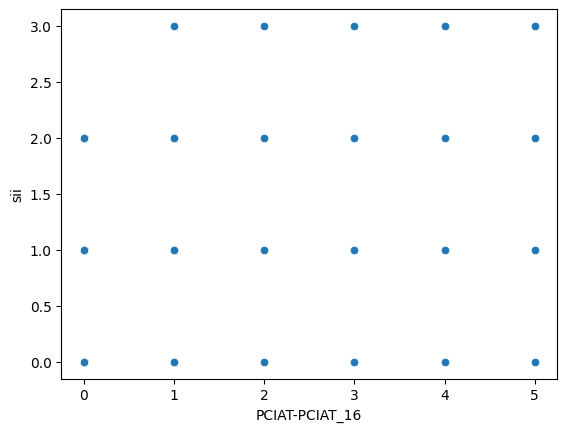

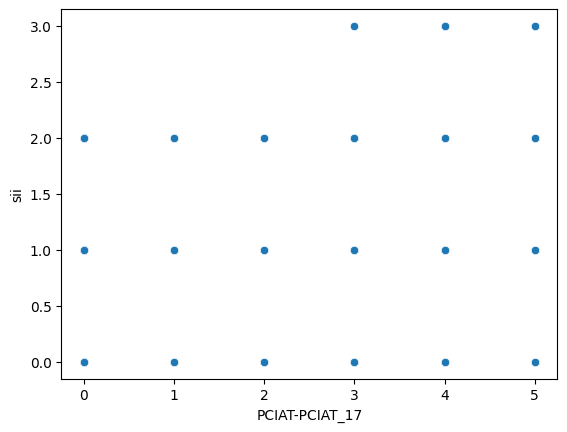

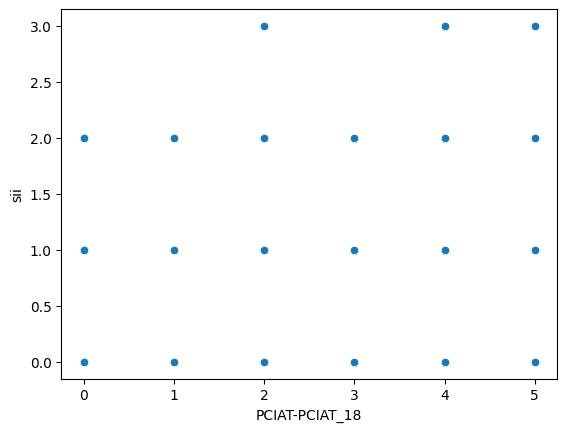

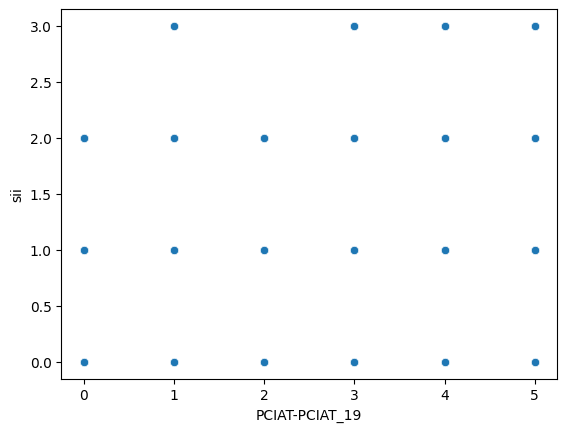

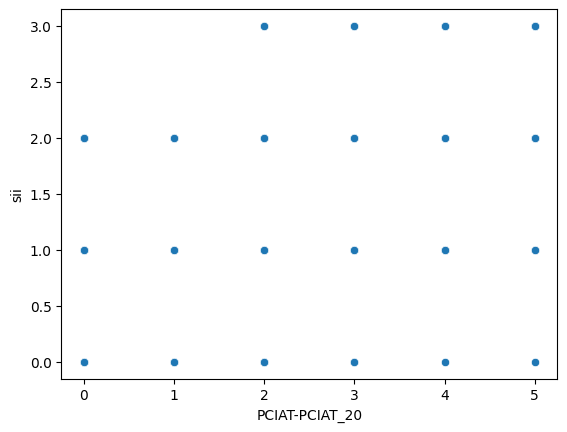

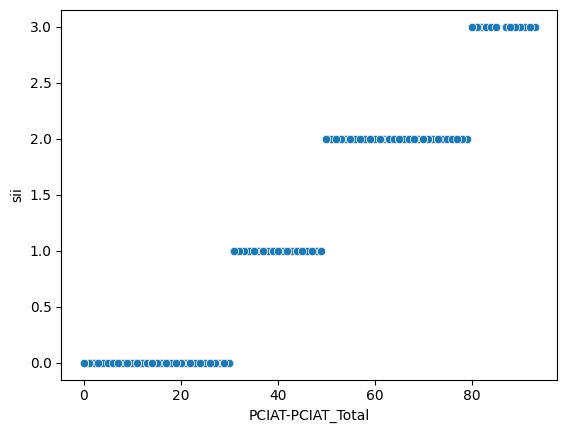

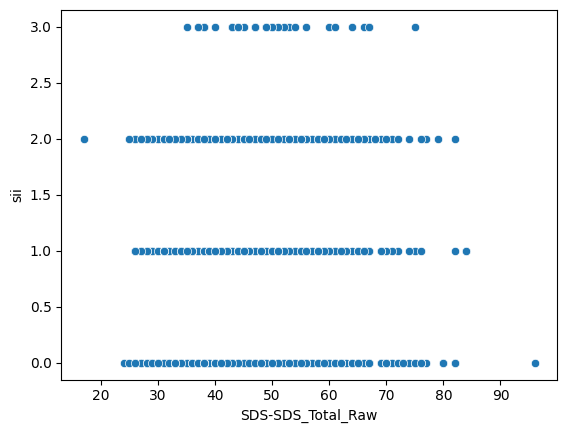

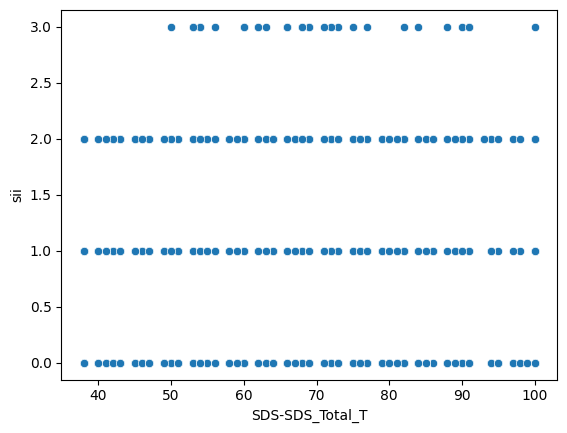

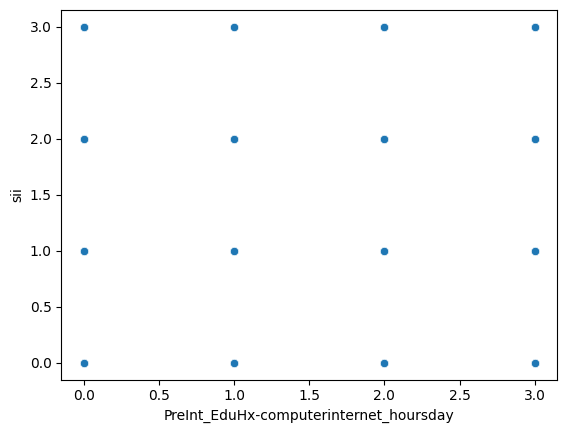

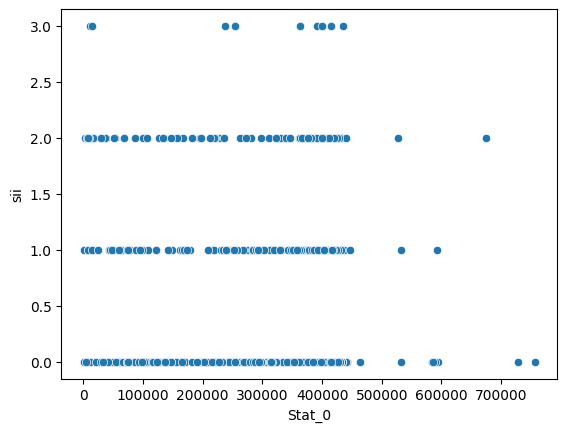

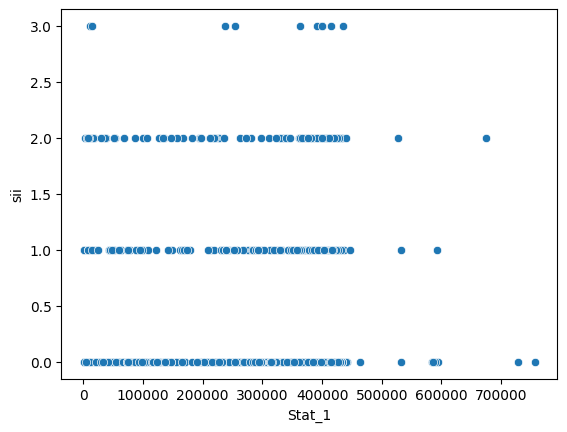

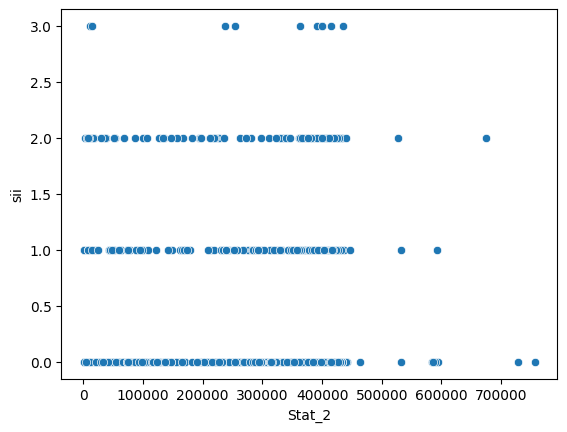

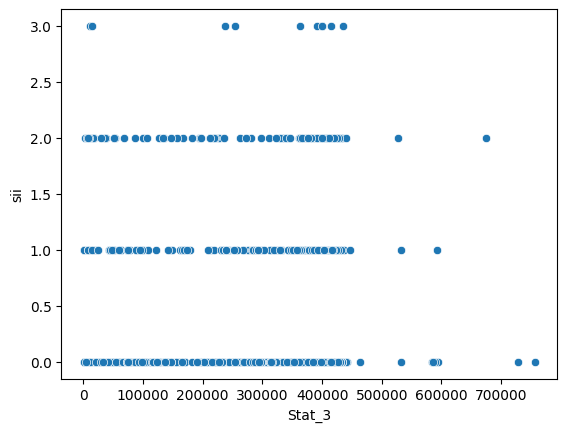

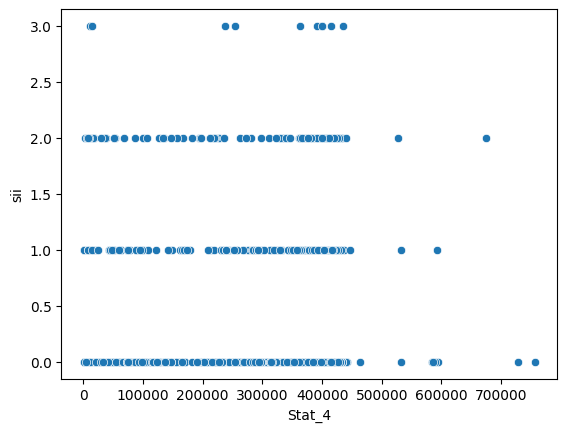

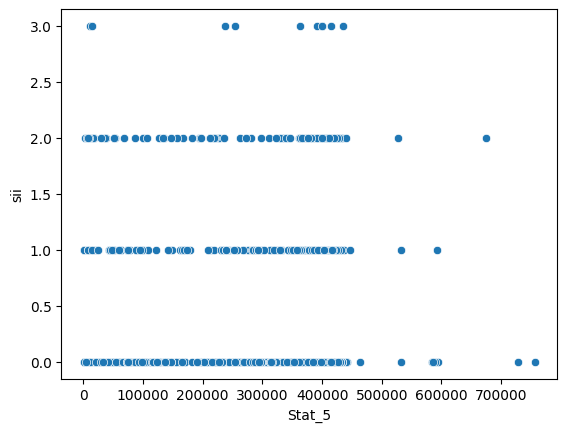

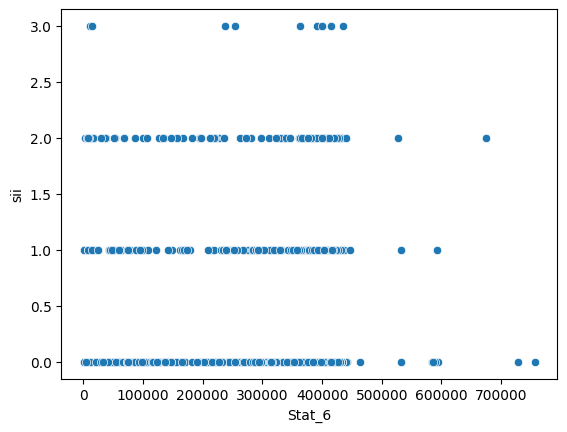

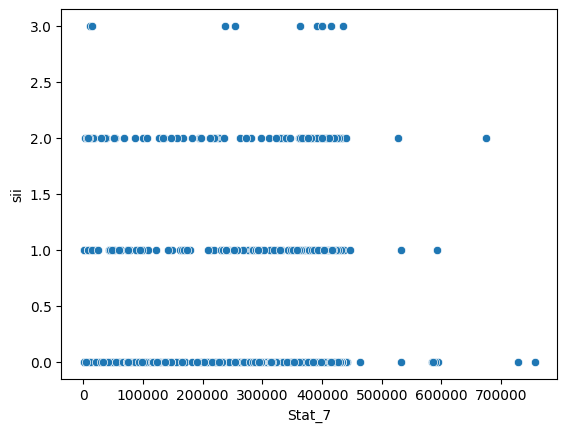

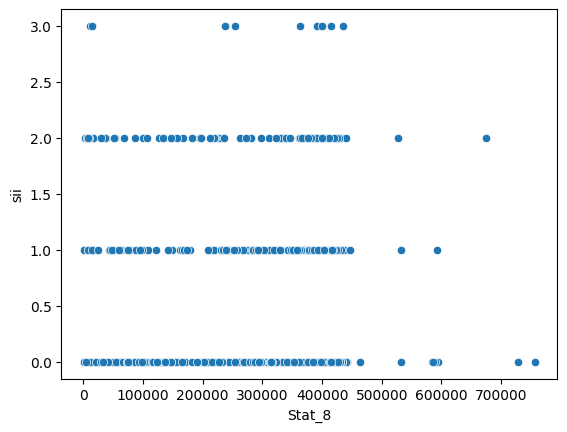

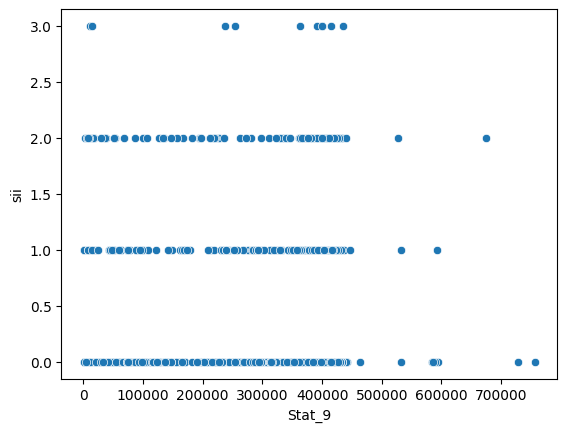

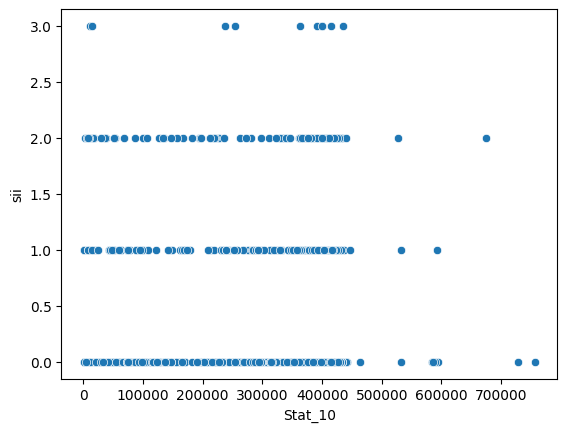

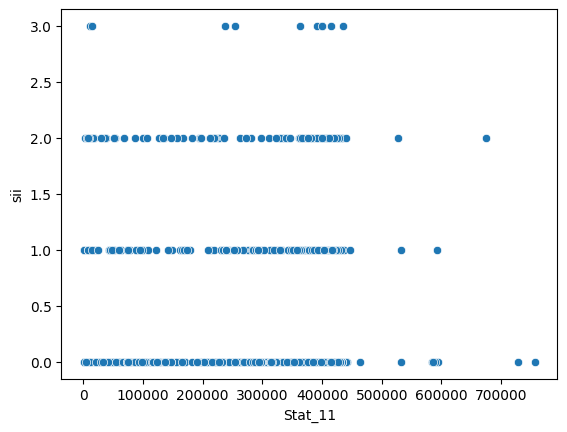

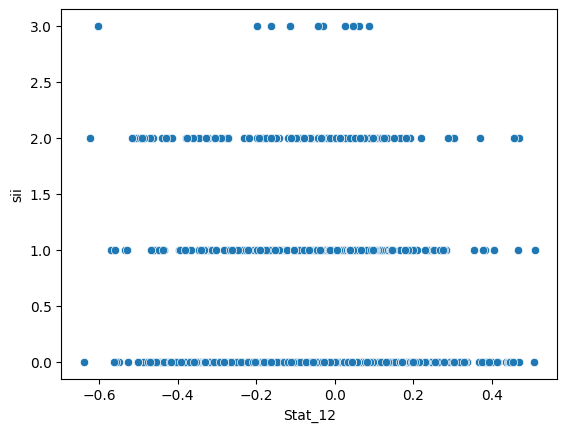

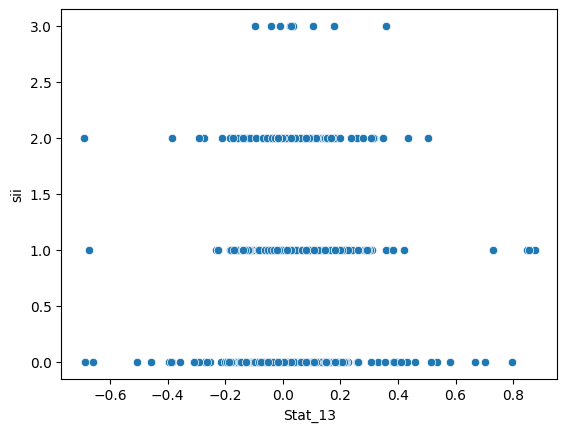

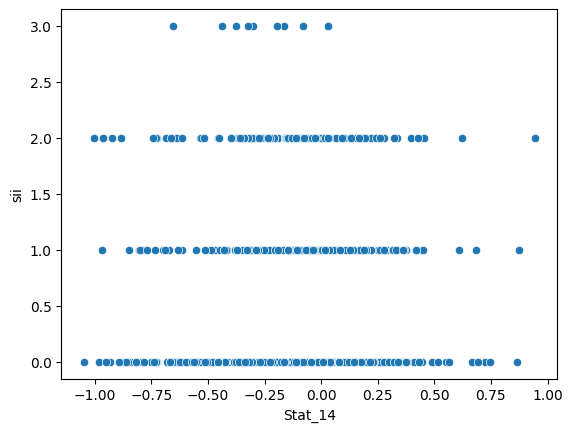

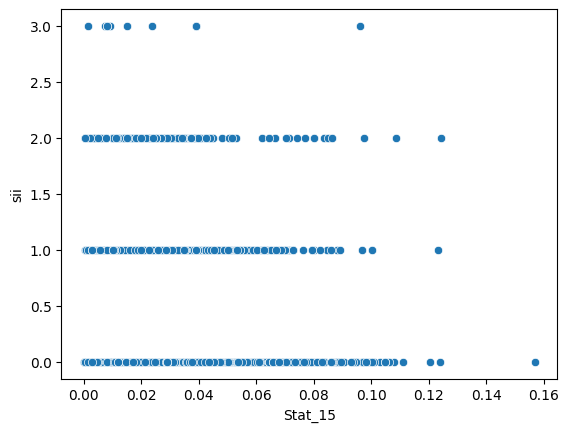

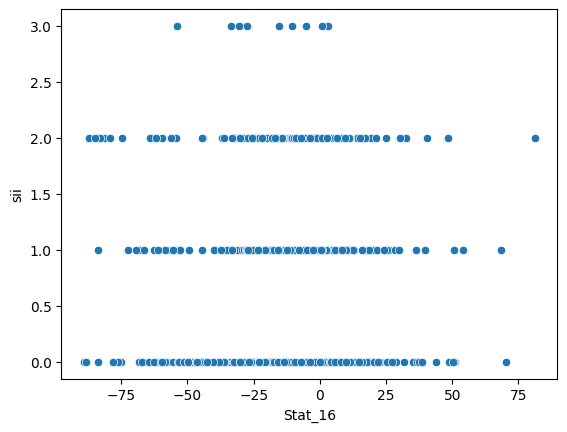

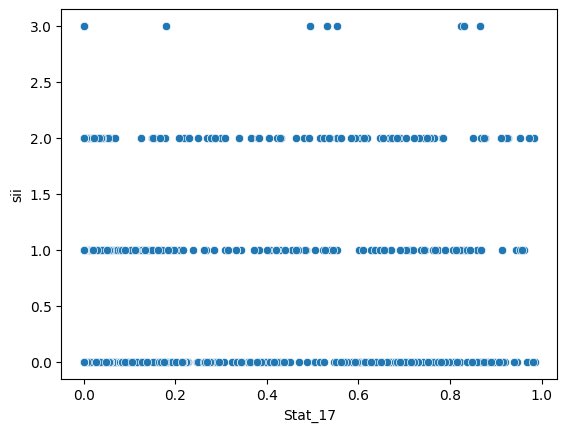

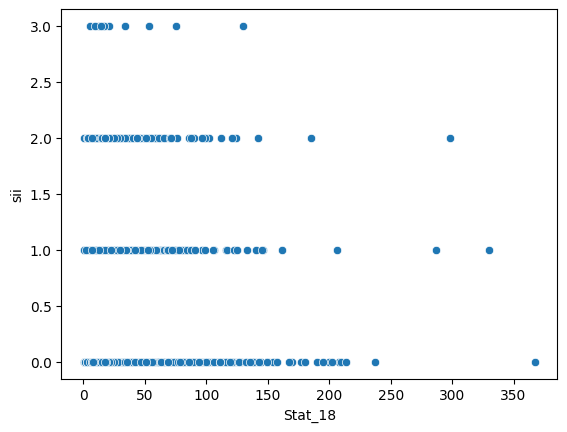

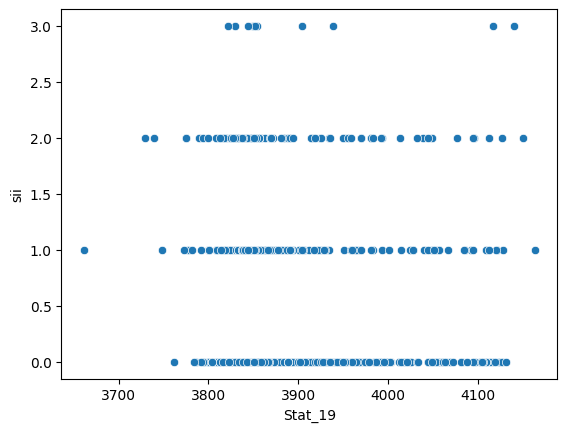

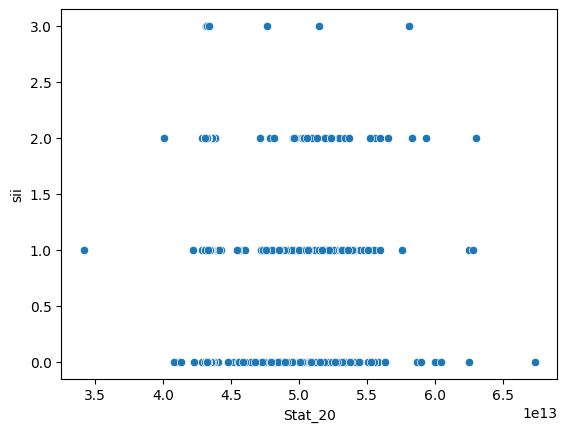

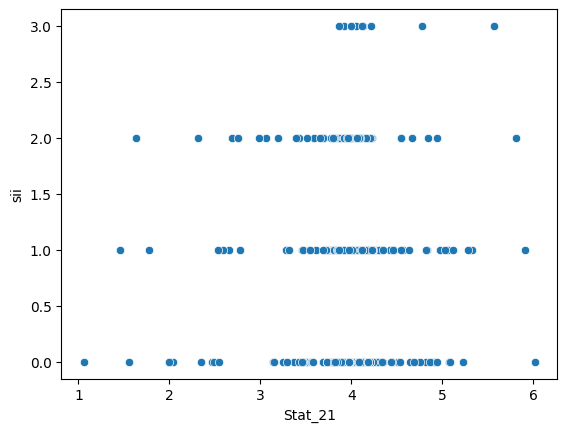

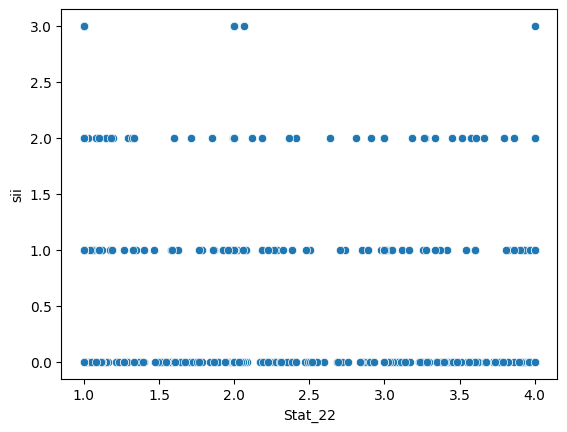

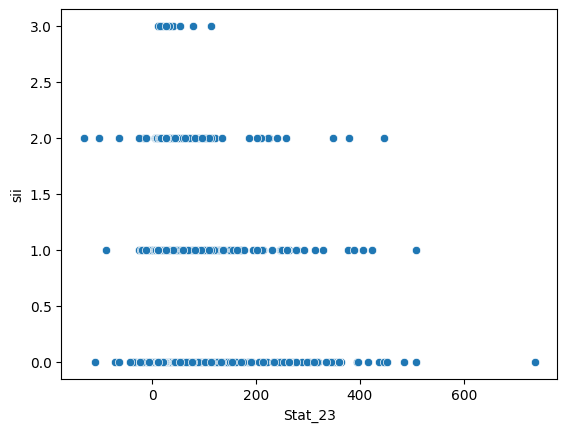

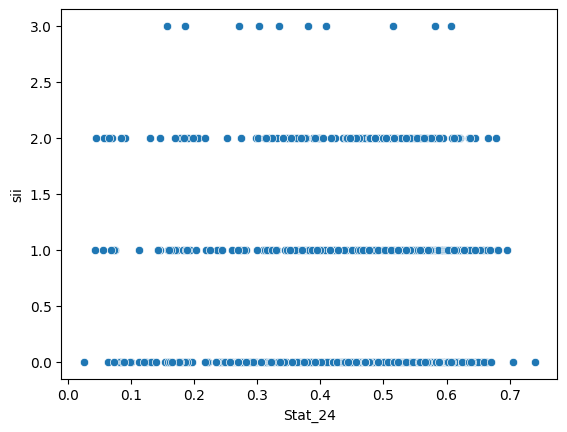

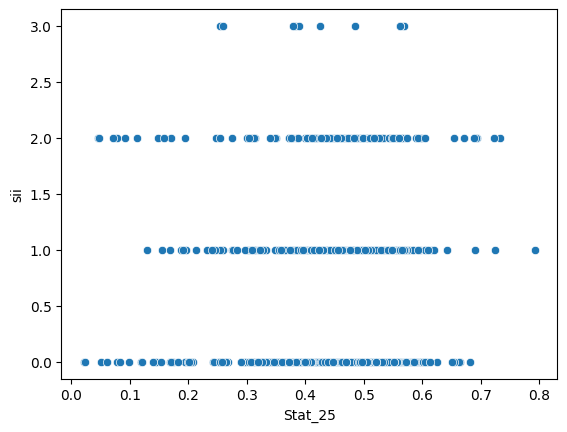

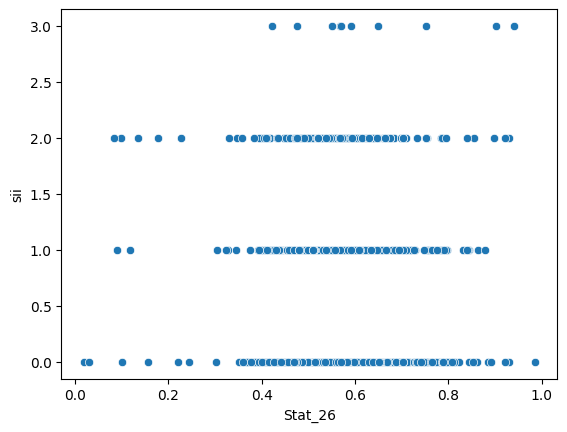

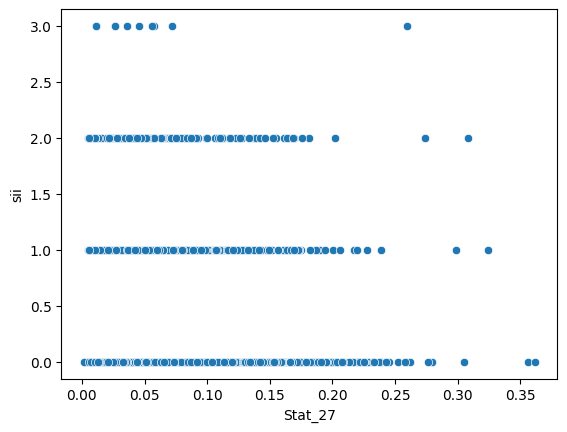

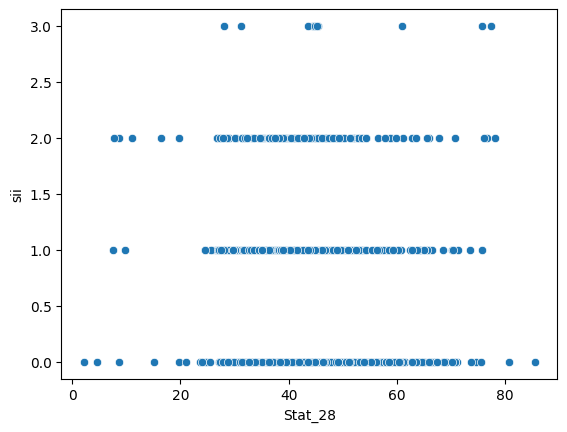

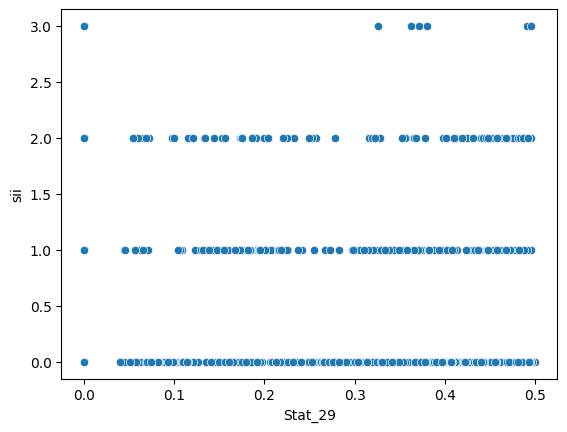

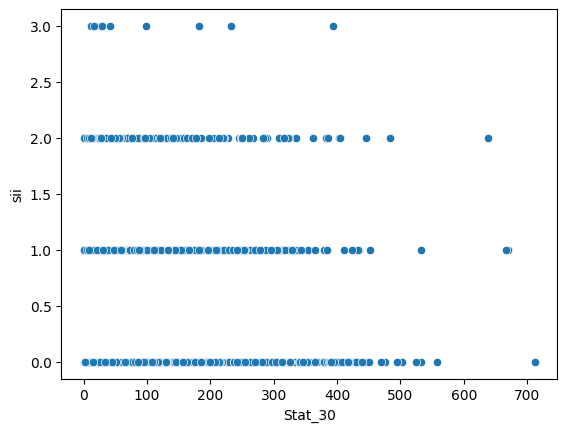

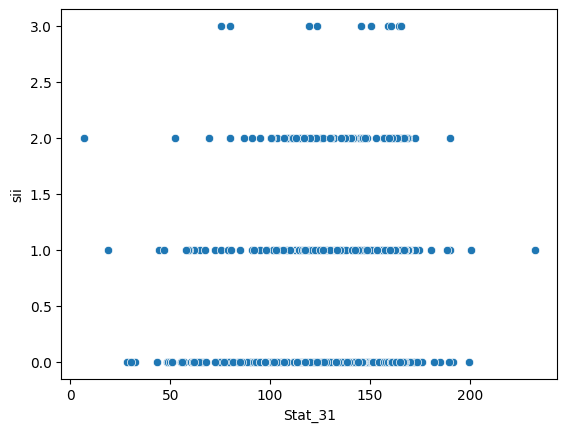

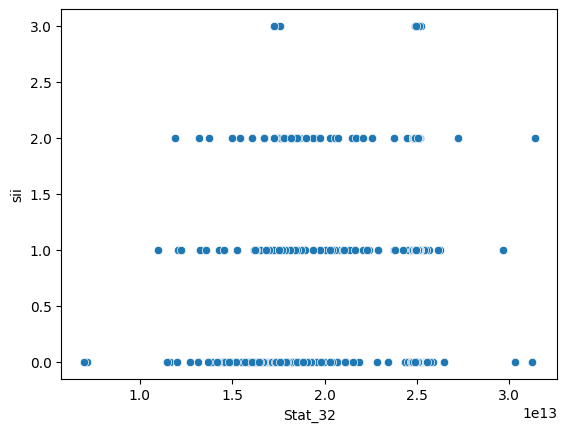

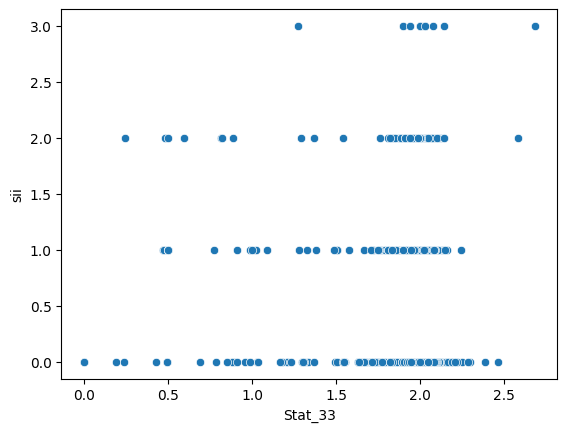

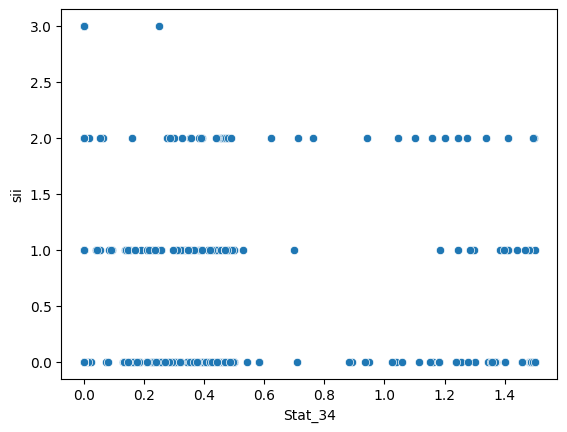

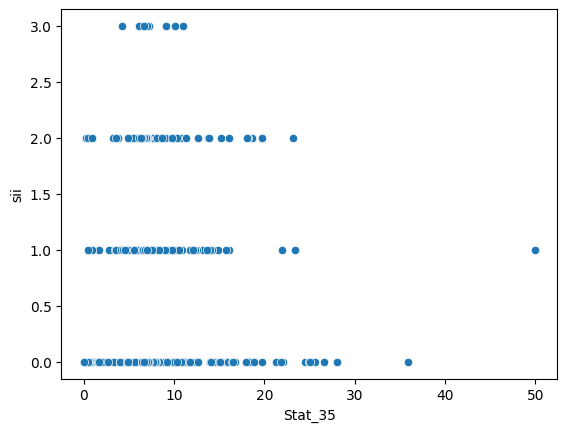

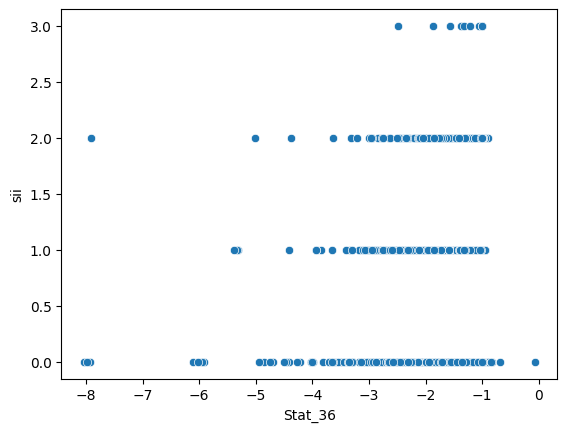

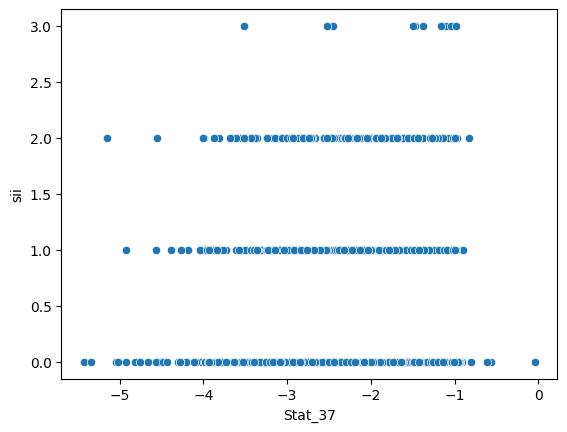

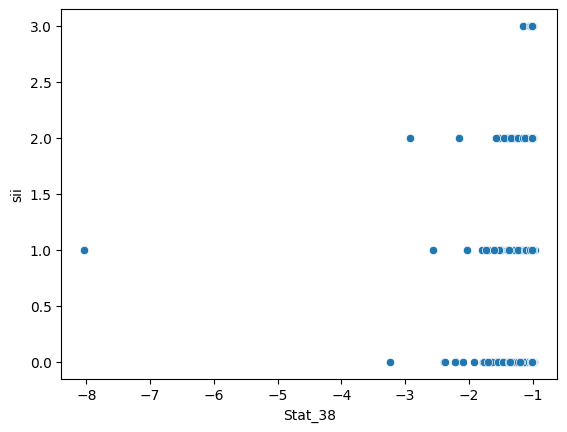

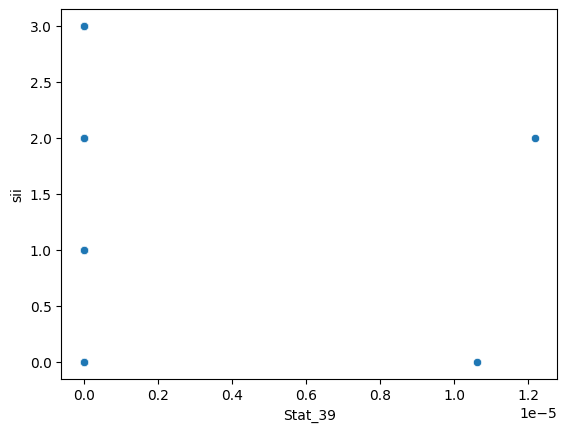

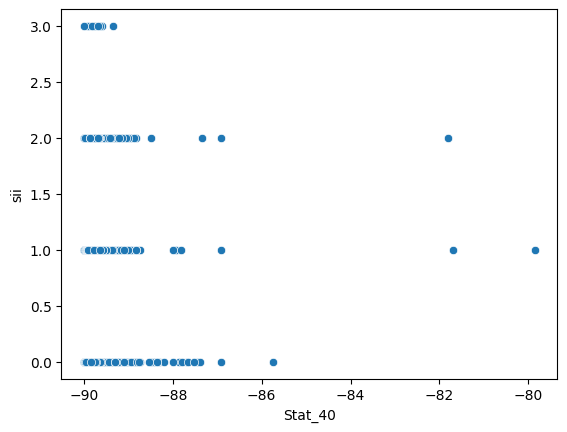

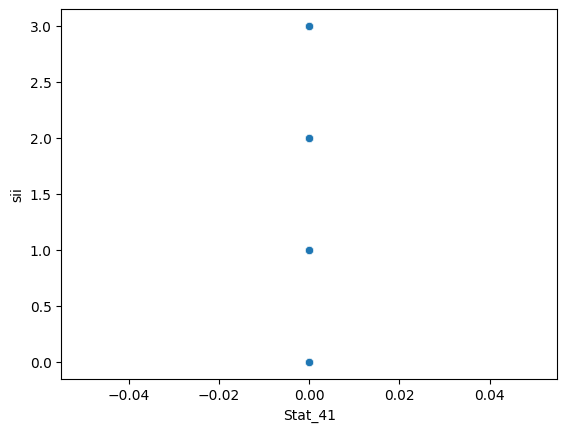

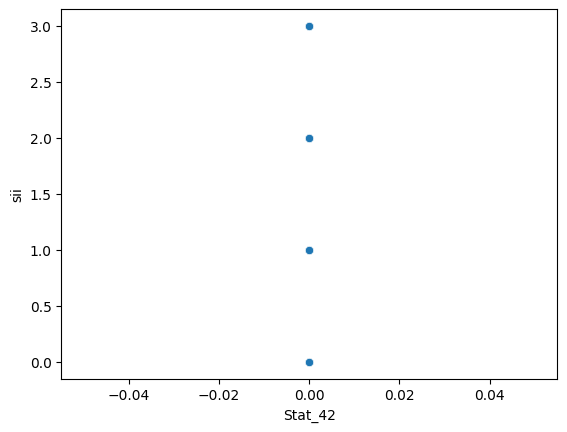

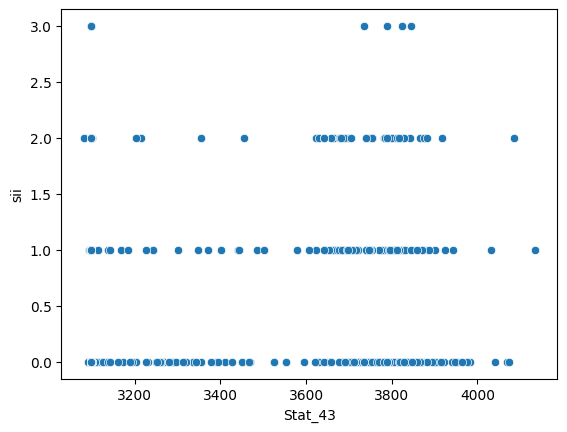

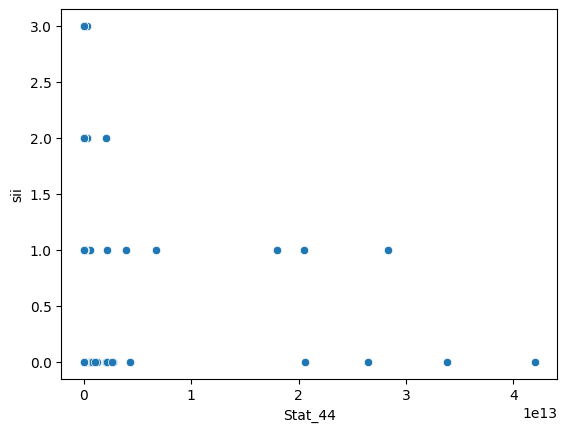

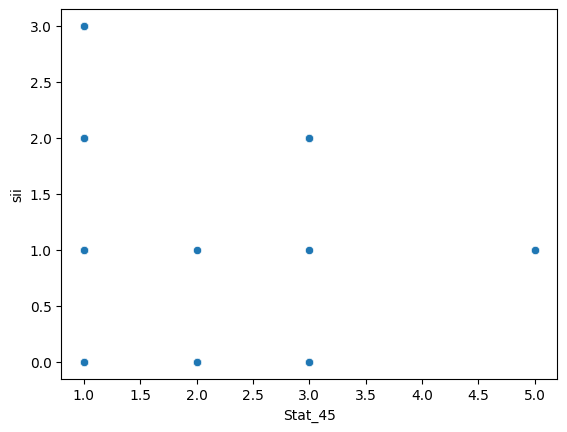

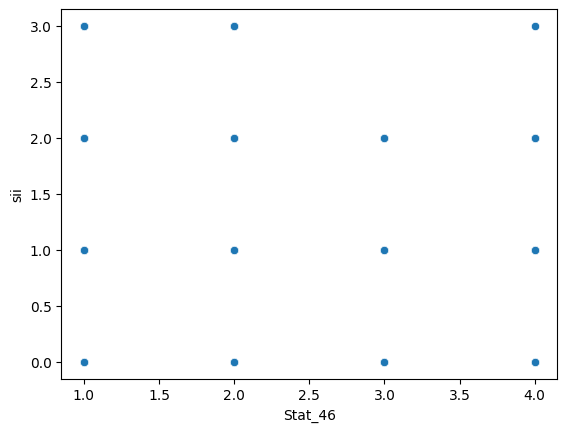

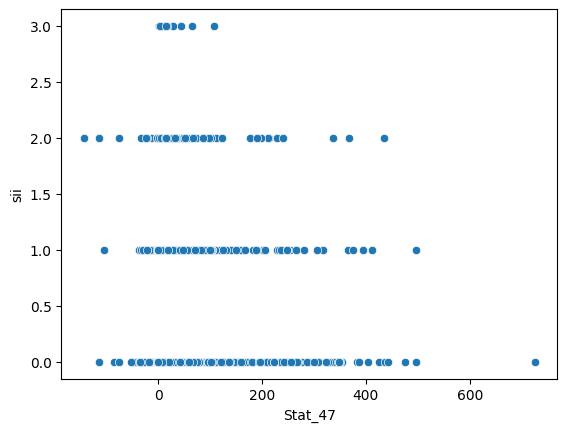

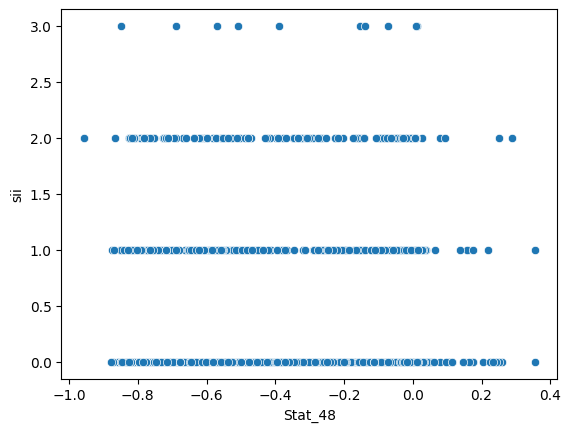

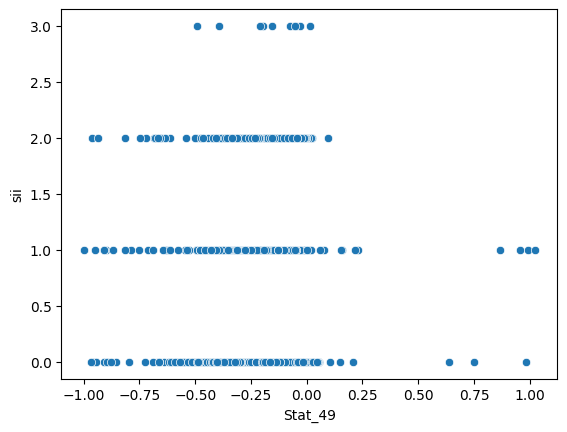

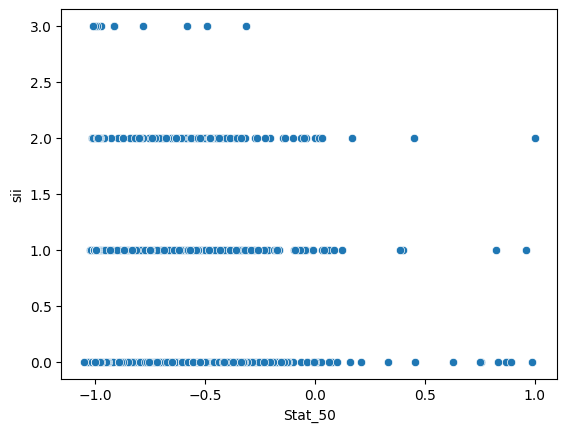

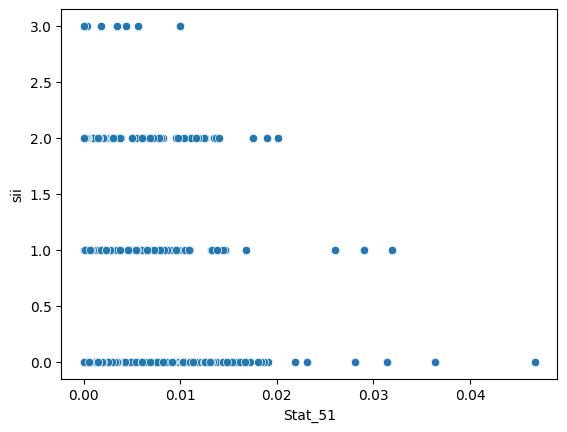

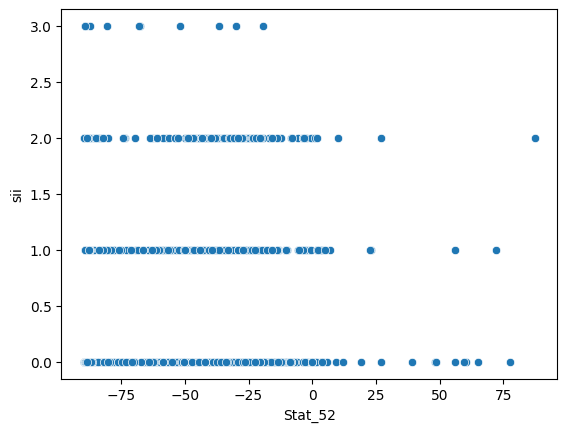

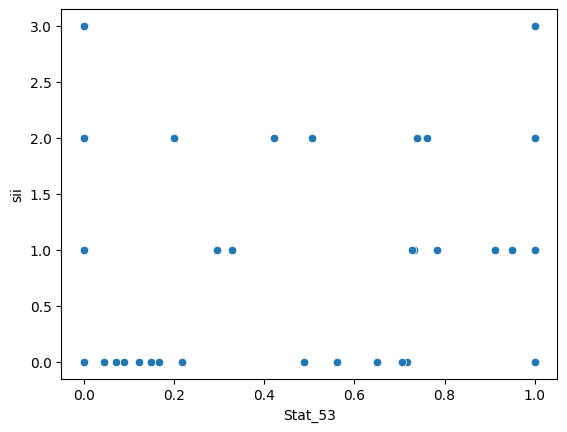

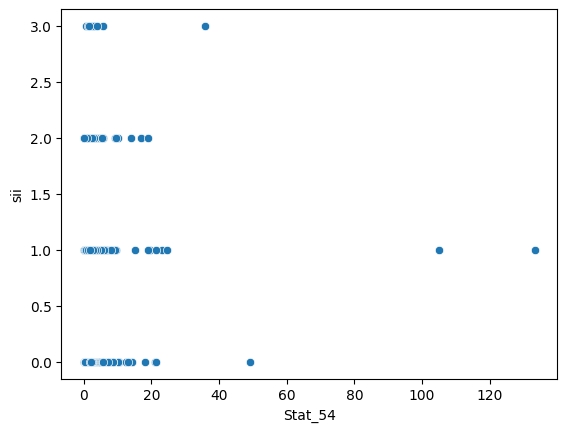

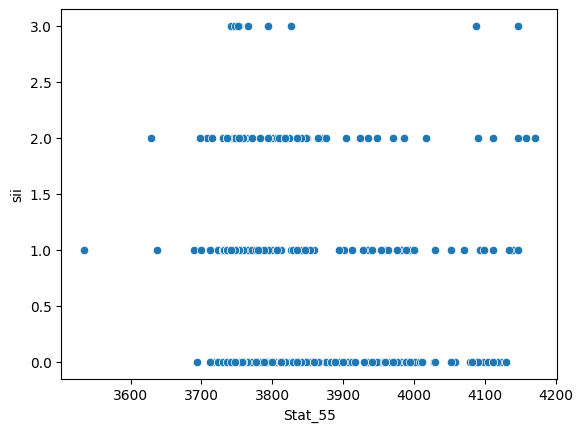

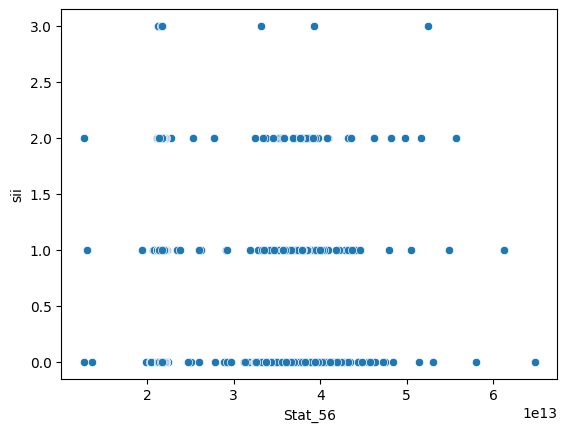

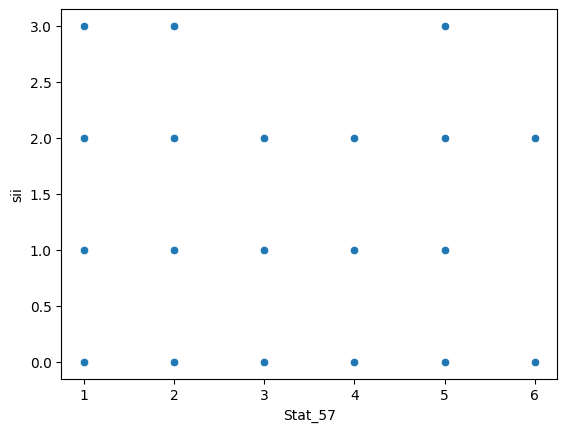

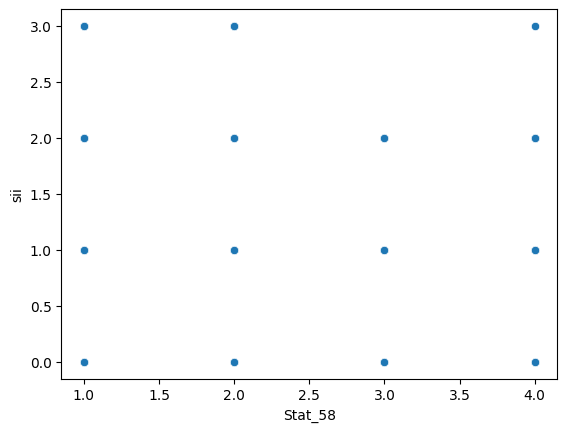

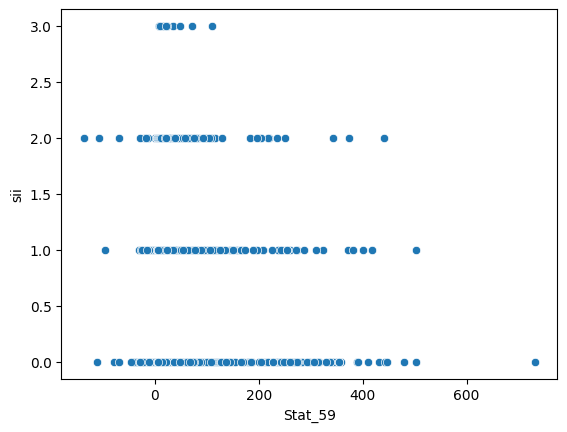

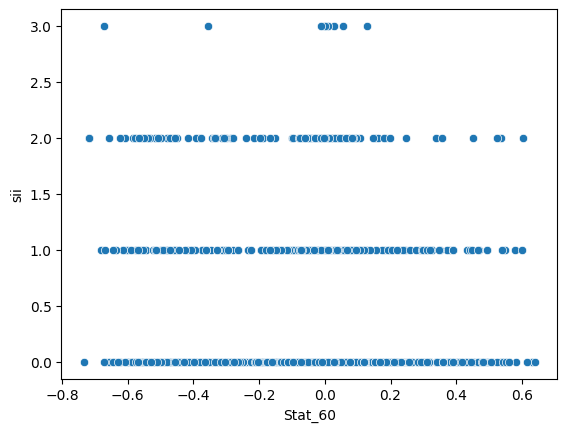

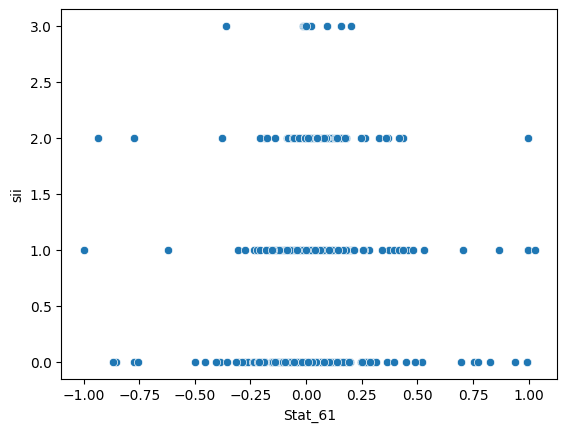

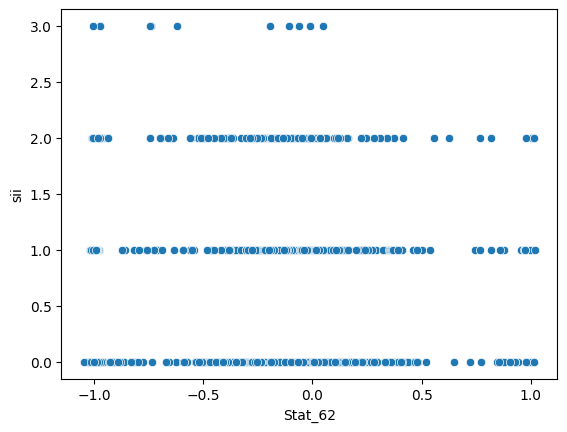

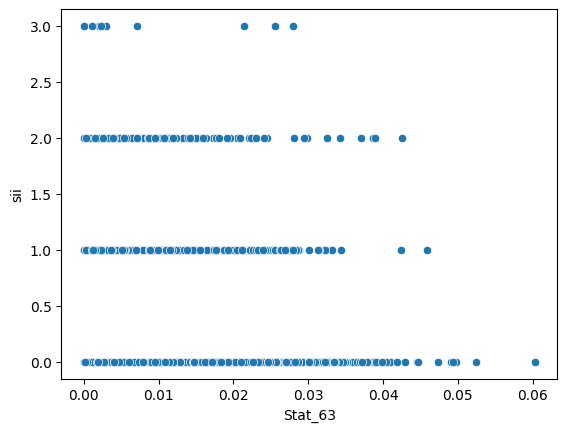

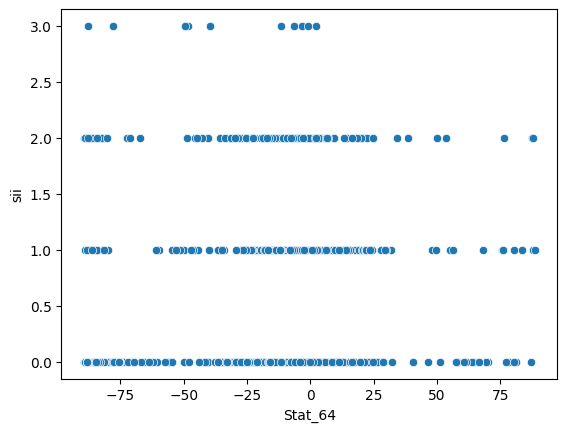

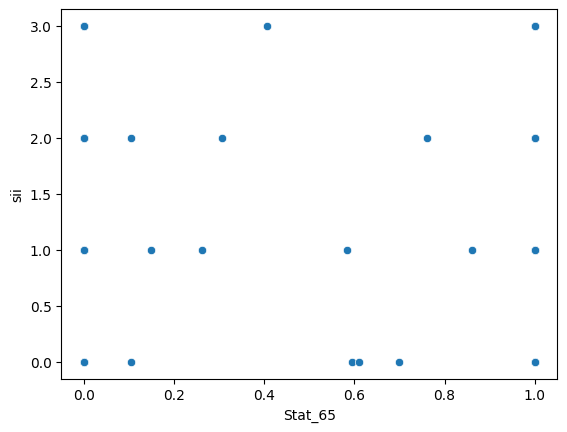

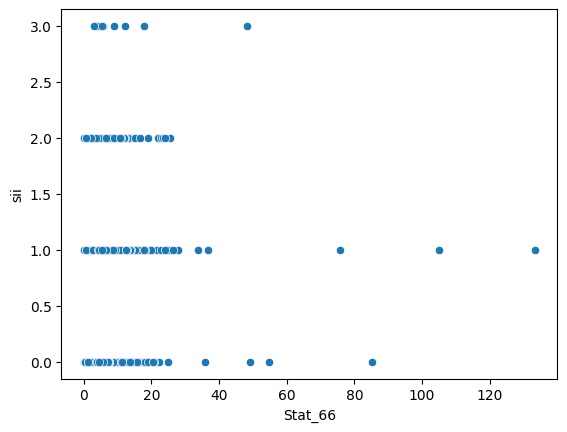

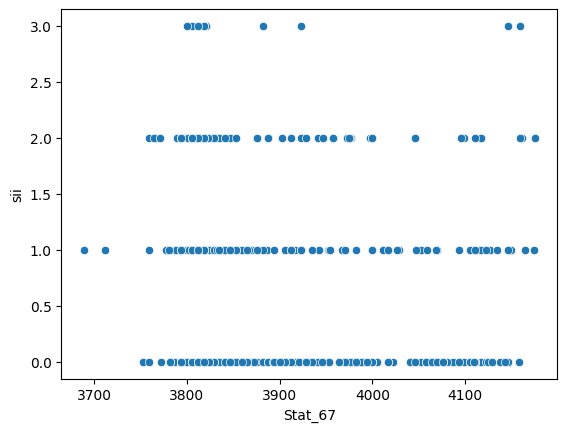

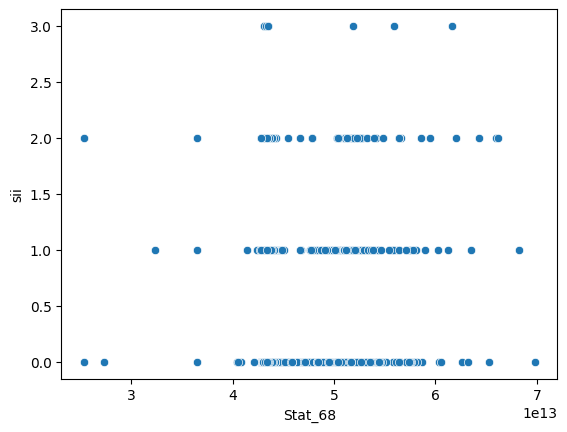

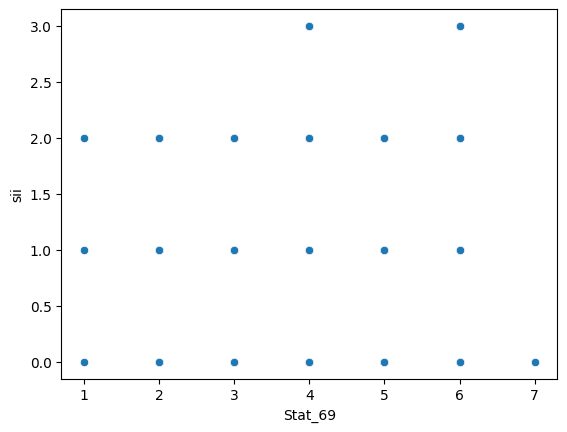

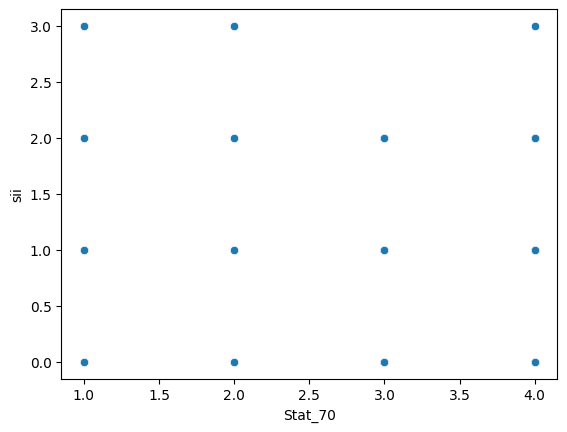

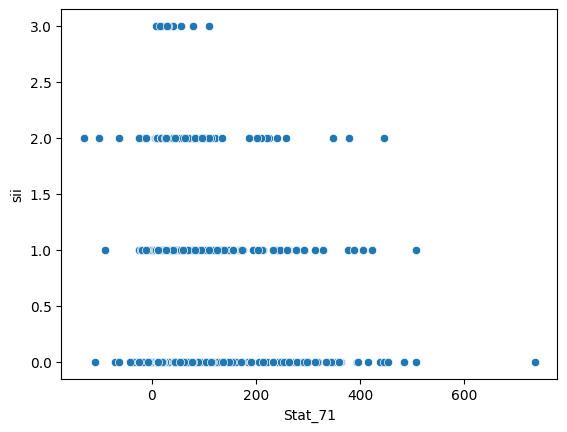

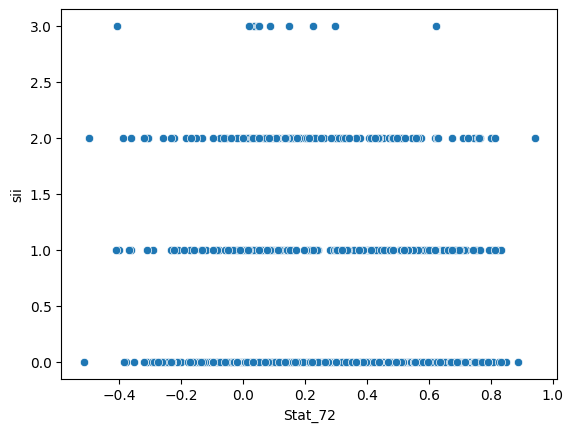

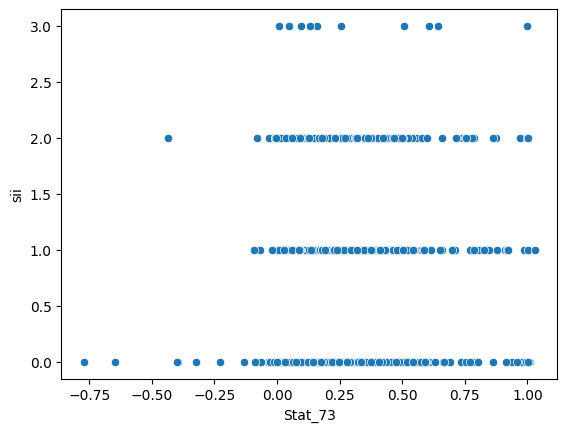

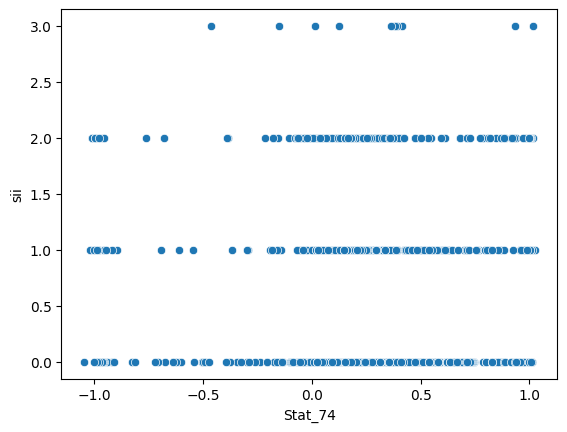

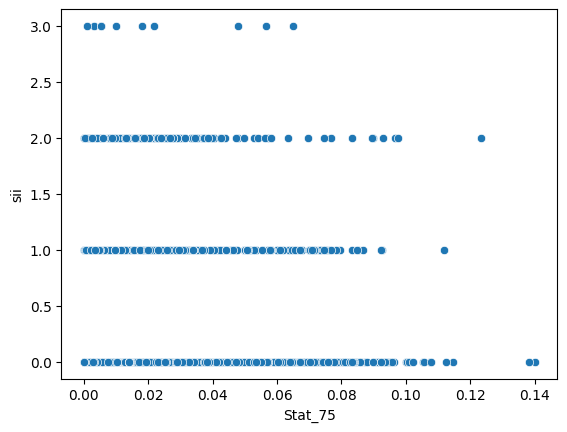

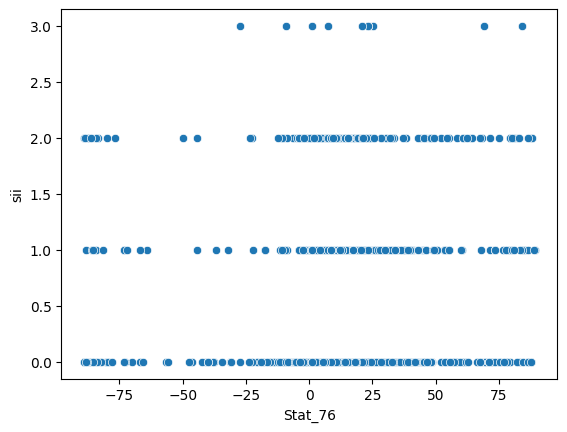

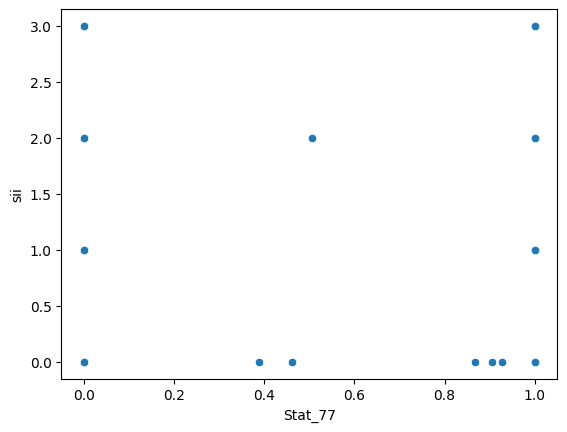

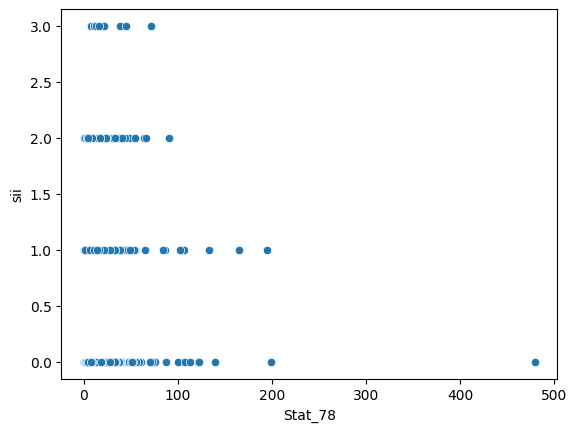

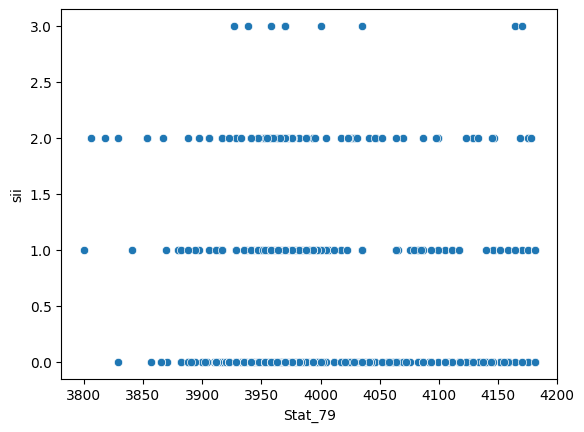

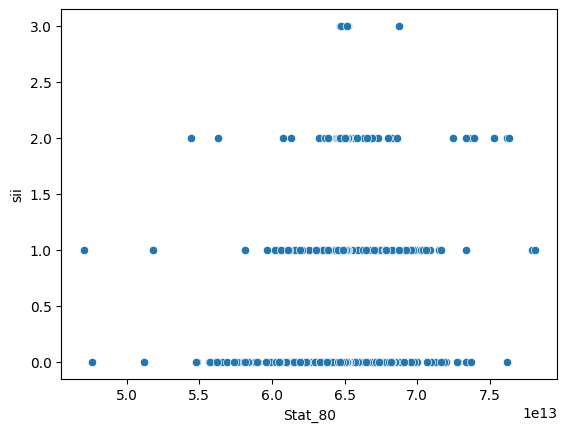

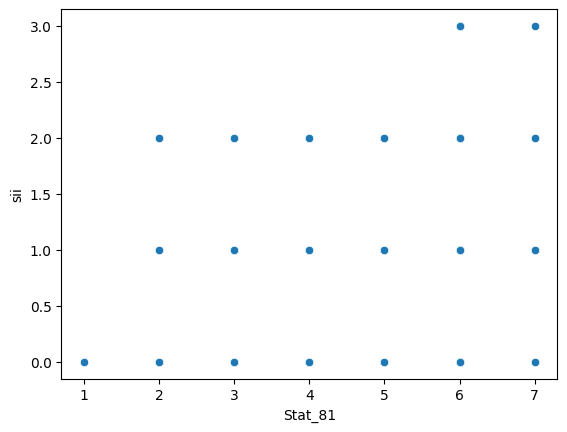

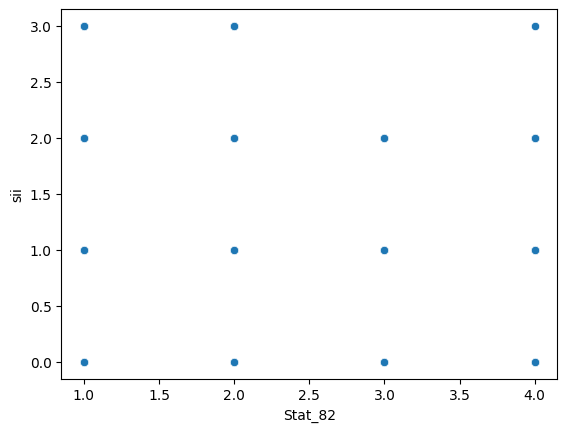

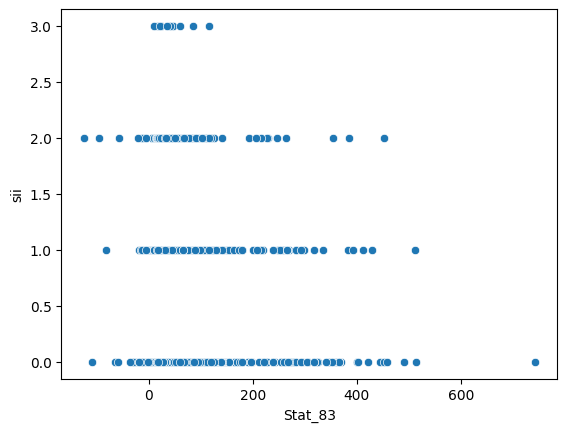

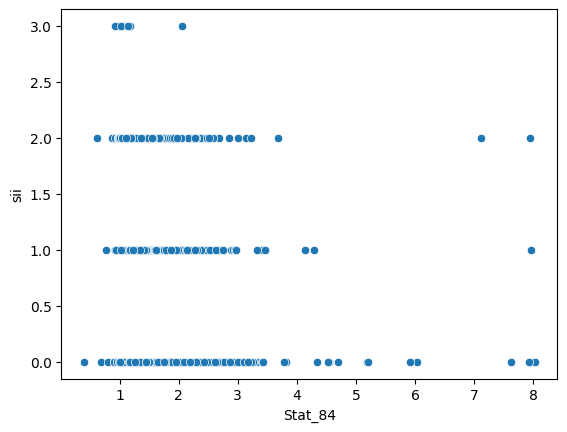

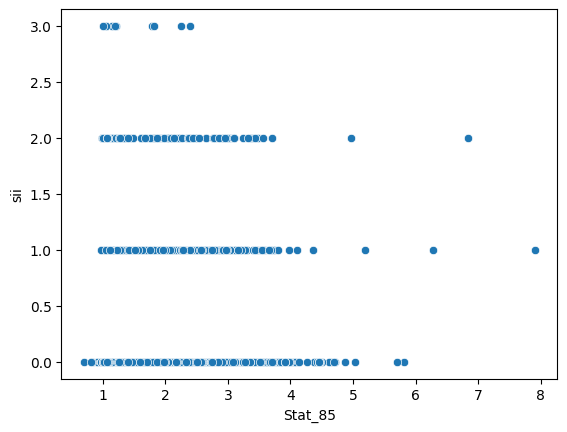

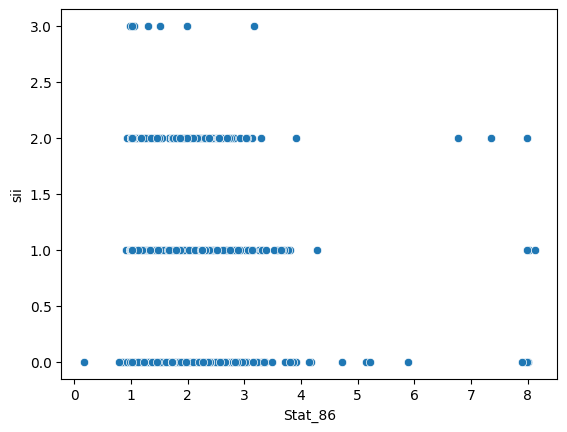

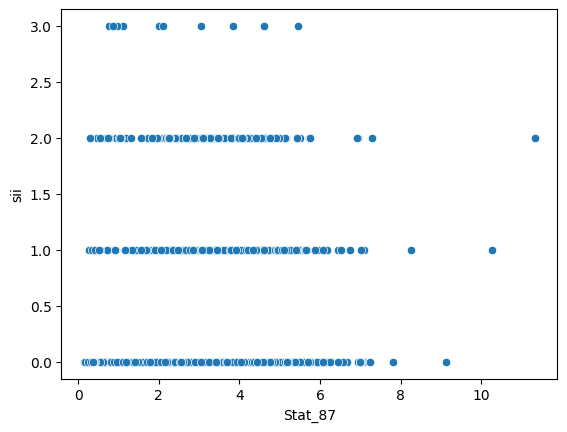

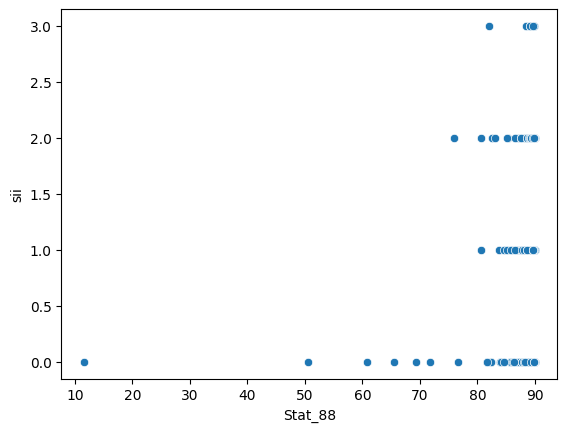

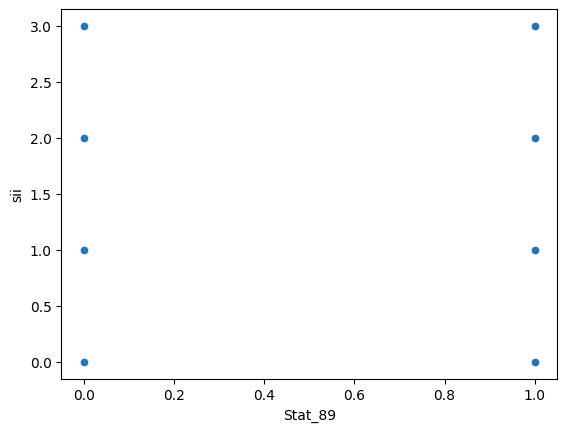

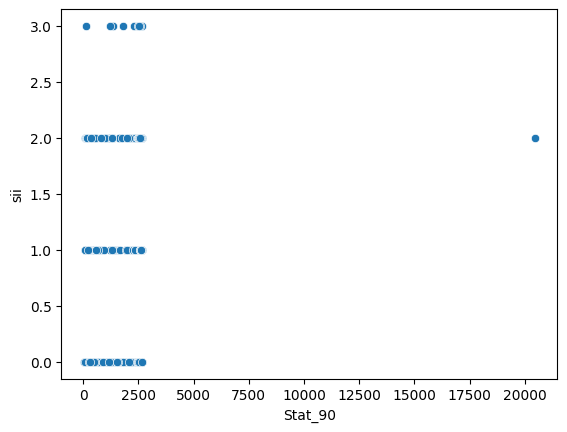

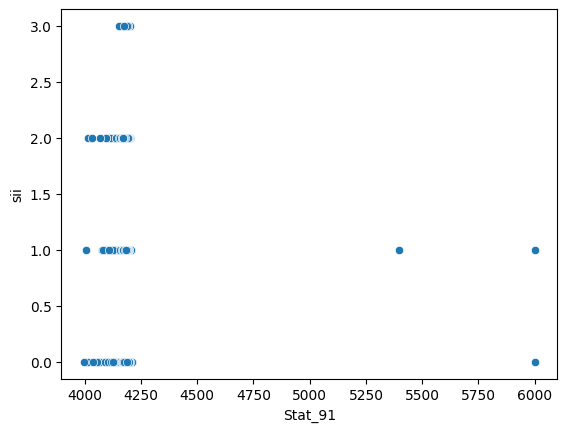

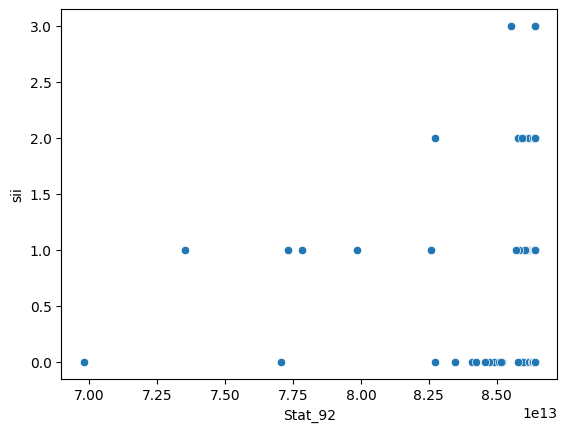

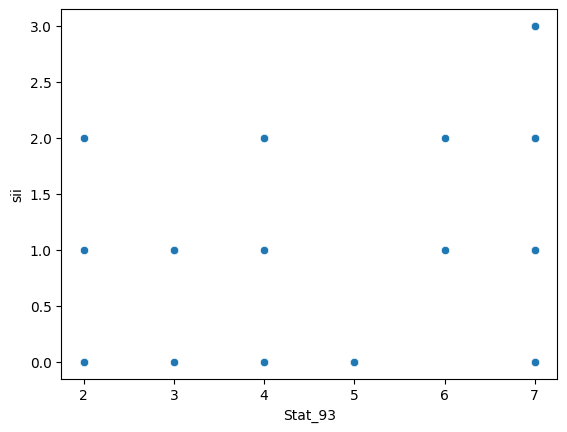

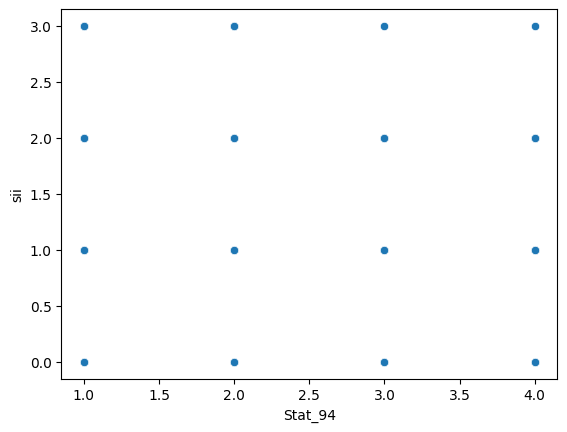

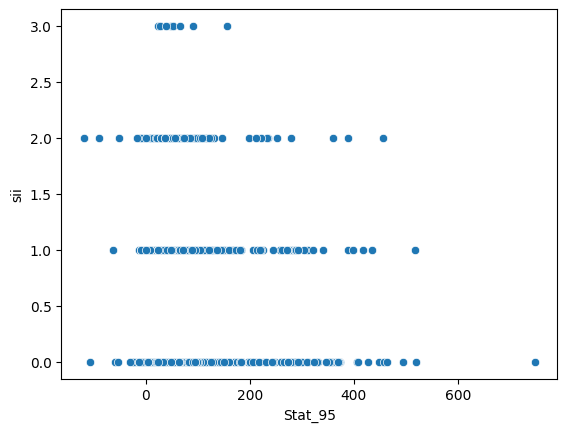

In [ ]:
for i in x:
  sns.scatterplot(data=train,x=i,y='sii')
  plt.show()

In [ ]:
corr=train.select_dtypes(include="number").corr()

In [ ]:
train.isnull().sum()

Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1405
CGAS-CGAS_Score                           1539
Physical-Season                            650
Physical-BMI                               938
Physical-Height                            933
Physical-Weight                            884
Physical-Waist_Circumference              3062
Physical-Diastolic_BP                     1006
Physical-HeartRate                         993
Physical-Systolic_BP                      1006
Fitness_Endurance-Season                  2652
Fitness_Endurance-Max_Stage               3217
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Time_Sec                3220
FGC-Season                                 614
FGC-FGC_CU                                1638
FGC-FGC_CU_Zone                           1678
FGC-FGC_GSND                              2886
FGC-FGC_GSND_Zone                         2898
FGC-FGC_GSD                               2886
FGC-FGC_GSD_Zone                          2897
FGC-FGC_PU                                1650
FGC-FGC_PU_Zone                           1689
FGC-FGC_SRL                               1655
FGC-FGC_SRL_Zone                          1693
FGC-FGC_SRR                               1653
FGC-FGC_SRR_Zone                          1691
FGC-FGC_TL                                1636
FGC-FGC_TL_Zone                           1675
BIA-Season                                1815
BIA-BIA_Activity_Level_num                1969
BIA-BIA_BMC                               1969
BIA-BIA_BMI                               1969
BIA-BIA_BMR                               1969
BIA-BIA_DEE                               1969
BIA-BIA_ECW                               1969
BIA-BIA_FFM                               1969
BIA-BIA_FFMI                              1969
BIA-BIA_FMI                               1969
BIA-BIA_Fat                               1969
BIA-BIA_Frame_num                         1969
BIA-BIA_ICW                               1969
BIA-BIA_LDM                               1969
BIA-BIA_LST                               1969
BIA-BIA_SMM                               1969
BIA-BIA_TBW                               1969
PAQ_A-Season                              3485
PAQ_A-PAQ_A_Total                         3485
PAQ_C-Season                              2239
PAQ_C-PAQ_C_Total                         2239
PCIAT-Season                              1224
PCIAT-PCIAT_01                            1227
PCIAT-PCIAT_02                            1226
PCIAT-PCIAT_03                            1229
PCIAT-PCIAT_04                            1229
PCIAT-PCIAT_05                            1231
PCIAT-PCIAT_06                            1228
PCIAT-PCIAT_07                            1231
PCIAT-PCIAT_08                            1230
PCIAT-PCIAT_09                            1230
PCIAT-PCIAT_10                            1227
PCIAT-PCIAT_11                            1226
PCIAT-PCIAT_12                            1229
PCIAT-PCIAT_13                            1231
PCIAT-PCIAT_14                            1228
PCIAT-PCIAT_15                            1230
PCIAT-PCIAT_16                            1232
PCIAT-PCIAT_17                            1235
PCIAT-PCIAT_18                            1232
PCIAT-PCIAT_19                            1230
PCIAT-PCIAT_20                            1227
PCIAT-PCIAT_Total                         1224
SDS-Season                                1342
SDS-SDS_Total_Raw                         1351
SDS-SDS_Total_T                           1354
PreInt_EduHx-Season                        420
PreInt_EduHx-computerinternet_hoursday     659
sii                                       1224
Stat_0                                    2970
Stat_1                                    2970
Stat_2                                    2970
Stat_3                                    2970
Stat_

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(corr,annot=True)

In [ ]:
corr['sii'].sort_values(ascending=False)

sii                                       1.000000
PCIAT-PCIAT_Total                         0.899681
PCIAT-PCIAT_15                            0.751399
PCIAT-PCIAT_18                            0.731112
PCIAT-PCIAT_17                            0.729867
PCIAT-PCIAT_05                            0.722722
PCIAT-PCIAT_13                            0.705679
PCIAT-PCIAT_20                            0.703013
PCIAT-PCIAT_16                            0.698566
PCIAT-PCIAT_08                            0.695458
PCIAT-PCIAT_03                            0.694736
PCIAT-PCIAT_02                            0.694597
PCIAT-PCIAT_10                            0.689972
PCIAT-PCIAT_19                            0.683293
PCIAT-PCIAT_14                            0.675953
PCIAT-PCIAT_09                            0.660485
PCIAT-PCIAT_06                            0.645596
PCIAT-PCIAT_01                            0.617883
PCIAT-PCIAT_11                            0.609964
PCIAT-PCIAT_04                            0.589342
PCIAT-PCIAT_07                            0.460864
Physical-Height                           0.373530
PCIAT-PCIAT_12                            0.370844
Basic_Demos-Age                           0.365990
PreInt_EduHx-computerinternet_hoursday    0.336526
Physical-Weight                           0.325938
Physical-Waist_Circumference              0.272885
FGC-FGC_CU                                0.247364
SDS-SDS_Total_T                           0.232982
SDS-SDS_Total_Raw                         0.229692
BIA-BIA_BMI                               0.227818
Physical-BMI                              0.221125
FGC-FGC_PU                                0.177125
BIA-BIA_Frame_num                         0.165936
FGC-FGC_GSD                               0.163448
FGC-FGC_GSND                              0.149495
Physical-Systolic_BP                      0.135336
Stat_37                                   0.121547
Stat_17                                   0.119459
Stat_77                                   0.116781
Stat_36                                   0.114685
Stat_65                                   0.108010
FGC-FGC_TL                                0.107623
Stat_80                                   0.105394
Stat_32                                   0.104702
BIA-BIA_FFMI                              0.102702
Stat_29                                   0.095979
Stat_53                                   0.083501
Stat_89                                   0.077356
BIA-BIA_FMI                               0.077054
Stat_28                                   0.075435
Stat_48                                   0.073328
BIA-BIA_LST                               0.067603
Stat_26                                   0.062575
BIA-BIA_Activity_Level_num                0.060085
Stat_13                                   0.053012
Physical-Diastolic_BP                     0.050971
Stat_54                                   0.050656
FGC-FGC_PU_Zone                           0.048652
BIA-BIA_SMM                               0.046692
BIA-BIA_ICW                               0.046653
BIA-BIA_DEE                               0.045239
Stat_49                                   0.044781
Stat_21                                   0.042253
Stat_40                                   0.039861
Stat_66                                   0.039692
Stat_57                                   0.039100
BIA-BIA_TBW                               0.037513
BIA-BIA_Fat                               0.037357
Stat_45                                   0.036127
Stat_81                                   0.033643
BIA-BIA_BMR                               0.031965
BIA-BIA_FFM                               0.031965
Stat_88                                   0.031172
BIA-BIA_ECW                               0.030414
Stat_39                                   0.029274
Stat_73                                   0.028714
Stat_61                                   0.024740
FGC-FGC_GSD_Zone      

In [ ]:
train.isnull().sum()

In [ ]:
mode_value = train['CGAS-Season'].mode()[0]
print(f"Mode of the column: {mode_value}")


In [ ]:
train['CGAS-Season'].fillna(train['CGAS-Season'].mode()[0], inplace=True)


In [ ]:
train['CGAS-Season'].unique()

In [ ]:
train.dtypes

In [ ]:
for i in train.columns:
    if(train[i].isnull().sum()>0 and train[i].dtypes=='object'):
        train[i].fillna(train[i].mode()[0], inplace=True)

In [ ]:
train.isnull().sum()

In [ ]:
train.dtypes

In [ ]:
for i in train.columns:
    if(train[i].isnull().sum()>0 and train[i].dtypes=='float64'):
        train[i].fillna(train[i].mean(), inplace=True)



In [ ]:
print(train.isnull().sum())

In [ ]:
#KNN Imputer
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [ ]:
#KNN Imputer
for i in train.select_dtype(include='number').columns:
  train[i]=impute.fit_transform(train[[i]])

**Outliers Detection**

It is used only for the continuous data not for the discrete values or target values

In [ ]:
def wiskers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [ ]:
print(train.head(5))
Outliner_Cols=['Physical-BMI','Physical-Weight','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','FGC-FGC_CU','FGC-FGC_GSND','FGC-FGC_GSD','FGC-FGC_PU','BIA-BIA_BMI','BIA-BIA_BMR','BIA-BIA_DEE','BIA-BIA_ECW','BIA-BIA_FFM','BIA-BIA_FFMI','BIA-BIA_FMI','BIA-BIA_Fat','BIA-BIA_ICW','BIA-BIA_LDM','BIA-BIA_LST','BIA-BIA_SMM','BIA-BIA_TBW','SDS-SDS_Total_Raw','SDS-SDS_Total_T','Stat_0','Stat_1','Stat_2','Stat_3','Stat_4','Stat_5','Stat_6','Stat_7','Stat_8','Stat_9','Stat_10','Stat_11','Stat_12','Stat_13','Stat_14','Stat_15','Stat_16','Stat_18','Stat_19','Stat_20','Stat_21','Stat_23','Stat_24','Stat_25','Stat_26','Stat_27','Stat_28','Stat_30','Stat_31','Stat_33','Stat_34','Stat_35','Stat_36','Stat_38','Stat_40','Stat_47','Stat_49','Stat_50','Stat_51','Stat_52','Stat_54','Stat_55','Stat_59','Stat_60','Stat_61','Stat_62','Stat_64','Stat_65','Stat_66','Stat_67','Stat_68','Stat_69','Stat_71','Stat_73','Stat_74','Stat_76','Stat_78','Stat_79','Stat_80','Stat_83','Stat_84','Stat_86','Stat_88','Stat_90','Stat_91','Stat_92']
for i in Outliner_Cols:
    lw,uw=wiskers(train[i])
    train[i]=np.where(train[i]>uw,uw,train[i])
    train[i]=np.where(train[i]<lw,lw,train[i])

In [ ]:
for i in Outliner_Cols:
  sns.boxplot(train[i])
  plt.show()

In [ ]:
train.drop_duplicates(inplace=True)

In [ ]:
train.shape

**One Hot Encoding**

In [ ]:
for i in train.columns:
    if(train[i].dtypes=='object'):
        train=pd.get_dummies(data=train,columns=[i],drop_first=True)

In [ ]:
train.head(5)